# **Initial Steps**

In [3]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

downloaded = drive.CreateFile({'id':"10TVpC4_CV-h4o2U3P7KjGdvbsiuFFnkN"})   # replace the id with id of file you want to access
downloaded.GetContentFile('Train.xlsx')

In [4]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

downloaded = drive.CreateFile({'id':"1HGi23Z_cfEZDjoSQFlVaG5fpvmBWxIYn"})   # replace the id with id of file you want to access
downloaded.GetContentFile('Test.xlsx')

### Libraries, Packages and others

In [5]:
!pip install -U imbalanced-learn

Requirement already up-to-date: imbalanced-learn in /usr/local/lib/python3.6/dist-packages (0.7.0)


In [6]:
!pip install category_encoders

In [7]:
!pip install imbalanced-learn

In [8]:
!pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.6/dist-packages (0.23.2)


In [9]:
!pip install pydotplus

In [10]:
import pandas as pd
import datetime
import numpy as np
import scipy as sc
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from math import ceil
# from pandas_profiling import ProfileReport
import scipy.cluster.hierarchy as shc
from sklearn import datasets
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import KNNImputer
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import RidgeClassifierCV
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.feature_selection import f_classif, chi2
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
# from django.utils import six
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import StackingClassifier
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import RandomOverSampler 
from imblearn.over_sampling import ADASYN 
from imblearn.over_sampling import KMeansSMOTE
from imblearn.under_sampling import ClusterCentroids
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import NearestNeighbors
import warnings
warnings.filterwarnings('ignore')
import time
from sklearn.model_selection import KFold
from sklearn import tree
from sklearn.tree import export_graphviz
import graphviz
import pydotplus
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC 

# for better resolution plots
%config InlineBackend.figure_format = 'retina' # optionally, you can change 'svg' to 'retina'


import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Functions 

In [11]:
def birthday_to_age(df, column, new_column):
    '''
    This function creates a column representing the difference in years from a given birth year column values
    Having into account that we are on the year 2048
    '''
    
    df[new_column] = df[column].map(lambda x : 2048 - x)
    
def questionmark_to_nan(df, column):
    '''
    This function turns a binary variable with missing values as '?' in NaN
    It needs as input the dataframe and the column name 
    (column name needs to be between '')
    '''
    df[column] = df[column].map(lambda x: np.nan if x == '?' else x)
    
def ohe(df, column_list):
    ohc = OneHotEncoder(sparse = False)
    ohc_feat = ohc.fit_transform(df[column_list])
    ohc_feat_names = ohc.get_feature_names()
    ohc_df = pd.DataFrame(ohc_feat, index = df.index, columns = ohc_feat_names)
    return ohc_df

def hist_box_maker(df,titl, num_of_rows, figx, figy):
    
    fig, axes = plt.subplots(num_of_rows, ceil((len(df.columns)*2)/num_of_rows), figsize=(figx, figy))
    temp = (list(df.columns)*2)
    temp.sort()
    # Plot data
    # Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
    i = 0 
    for ax, feat in zip(axes.flatten(), temp):
        
        if i%2 == 0:
            ax.hist(df[feat], bins = 50)
            ax.set_title(feat, y=-0.13)
            pltiswork=feat
            
        else:
            sns.boxplot(x=df[pltiswork], ax = ax)
        
        i+=1
            
    # Layout
    # Add a centered title to the figure:
    title = titl

    plt.suptitle(title)

    plt.show()# All Numer
    
    
def plot_importance(coef, name):
    imp_coef = coef.sort_values()
    plt.figure(figsize = (8,10))
    imp_coef.plot(kind = 'barh')
    plt.title('Feature Importance Using ' + name + ' Regression')
    plt.show()
    
def metrics(y_train, pred_train , y_val, pred_val):
    print('___________________________________________________________________________________________________________')
    print('                                                     TRAIN                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_train, pred_train))
    print(confusion_matrix(y_train, pred_train))
    print('F1-score, micro: ', f1_score(y_train, pred_train, average = 'micro'))


    print('___________________________________________________________________________________________________________')
    print('                                                VALIDATION                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_val, pred_val))
    print(confusion_matrix(y_val, pred_val))
    print('F1-score, micro: ',f1_score(y_val, pred_val, average = 'micro'))

def hist_box_maker(df,titl, num_of_rows, figx, figy):
    
    fig, axes = plt.subplots(num_of_rows, ceil((len(df.columns)*2)/num_of_rows), figsize=(figx, figy))
    temp = (list(df.columns)*2)
    temp.sort()
    # Plot data
    # Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
    i = 0 
    for ax, feat in zip(axes.flatten(), temp):
        
        if i%2 == 0:
            ax.hist(df[feat], bins = 100)
            ax.set_title(feat, y=-0.13)
            pltiswork=feat
            
        else:
            sns.boxplot(x=df[pltiswork], ax = ax)
        
        i+=1
            
    # Layout
    # Add a centered title to the figure:
    title = titl

    plt.suptitle(title)

    plt.show()# All Numeric Variables' Box Plots in one figure
def avg_score(model):
    # apply kfold
    kf = KFold(n_splits=10)
    # create lists to store the results from the different models 
    score_train = []
    score_test = []
    timer = []
    for train_index, test_index in kf.split(X):
        # get the indexes of the observations assigned for each partition
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        # start counting time
        begin = time.perf_counter()
        # fit the model to the data
        model.fit(X_train, y_train)
        # finish counting time
        end = time.perf_counter()
        # check the mean accuracy for the train
        value_train = model.score(X_train, y_train)
        # check the mean accuracy for the test
        value_test = model.score(X_test,y_test)
        # append the accuracies, the time and the number of iterations in the corresponding list
        score_train.append(value_train)
        score_test.append(value_test)
        timer.append(end-begin)
    # calculate the average and the std for each measure (accuracy, time and number of iterations)
    avg_time = round(np.mean(timer),3)
    avg_train = round(np.mean(score_train),3)
    avg_test = round(np.mean(score_test),3)
    std_time = round(np.std(timer),2)
    std_train = round(np.std(score_train),2)
    std_test = round(np.std(score_test),2)
    
    return str(avg_time) + '+/-' + str(std_time), str(avg_train) + '+/-' + str(std_train),\
str(avg_test) + '+/-' + str(std_test)   


def plot_tree(model):
    dot_data = export_graphviz(model,
                               feature_names=X_train_Original.columns,  
                               class_names=["High income", "Low income"],
                               filled=True)
    pydot_graph = pydotplus.graph_from_dot_data(dot_data)
    pydot_graph.set_size('"20,20"')
    return graphviz.Source(pydot_graph.to_string())
    
def show_results(df, *args):
    """
    Receive an empty dataframe and the different models and call the function avg_score
    """
    count = 0
    # for each model passed as argument
    for arg in args:
        # obtain the results provided by avg_score
        time, avg_train, avg_test = avg_score(arg)
        # store the results in the right row
        df.iloc[count] = time, avg_train, avg_test
        count+=1
    return df

### Import data

In [12]:
train = pd.read_excel("Train.xlsx")
kaggle = pd.read_excel('Test.xlsx')

submission = kaggle[['CITIZEN_ID']].copy()

# **Data Pre-Processing**

## **Data Inspection**

In [13]:
train.head() #Data was imported correctly

,CITIZEN_ID,Name,Birthday,Native Continent,Marital Status,Lives with,Base Area,Education Level,Years of Education,Employment Sector,Role,Working Hours per week,Money Received,Ticket Price,Income
0,12486,Mr. Adam Glover,"July 1,2003",Europe,Married,Wife,Northbury,High School + PostGraduation,13,Private Sector - Services,Repair & constructions,40,0,2273,1
1,12487,Mr. Cameron McDonald,"January 25,2006",Europe,Married,Wife,Northbury,Professional School,12,Public Sector - Others,Repair & constructions,40,0,0,1
2,12488,Mr. Keith Davidson,"May 10,2009",Europe,Married,Wife,Northbury,Professional School,12,Private Sector - Services,Sales,46,0,2321,1
3,12489,Mr. Alexander Gill,"March 25,1985",Europe,Married,Wife,Northbury,High School - 2nd Cycle,11,Private Sector - Services,Security,37,5395,0,1
4,12490,Mr. Neil Piper,"May 29,2015",Europe,Single,Other Family,Northbury,PhD,21,Self-Employed (Individual),Professor,45,0,0,1


In [14]:
#No column seems to have, for now, a wrong dtype, except Birthday
train.dtypes

CITIZEN_ID                 int64
Name                      object
Birthday                  object
Native Continent          object
Marital Status            object
Lives with                object
Base Area                 object
Education Level           object
Years of Education         int64
Employment Sector         object
Role                      object
Working Hours per week     int64
Money Received             int64
Ticket Price               int64
Income                     int64
dtype: object

In [15]:
train.describe()

,CITIZEN_ID,Years of Education,Working Hours per week,Money Received,Ticket Price,Income
count,22400.000000,22400.000000,22400.000000,22400.000000,22400.000000,22400.000000
mean,23685.500000,13.173884,40.483795,1324.915357,109.145313,0.237098
std,6466.467351,2.512451,12.370921,9227.771813,500.208904,0.425313
min,12486.000000,2.000000,1.000000,0.000000,0.000000,0.000000
25%,18085.750000,12.000000,40.000000,0.000000,0.000000,0.000000
50%,23685.500000,13.000000,40.000000,0.000000,0.000000,0.000000
75%,29285.250000,15.000000,45.000000,0.000000,0.000000,0.000000
max,34885.000000,21.000000,99.000000,122999.000000,5358.000000,1.000000


In [16]:
train.isna().sum() #No "immediate" missing values

CITIZEN_ID                0
Name                      0
Birthday                  0
Native Continent          0
Marital Status            0
Lives with                0
Base Area                 0
Education Level           0
Years of Education        0
Employment Sector         0
Role                      0
Working Hours per week    0
Money Received            0
Ticket Price              0
Income                    0
dtype: int64

### Data Treatment


#### Categorical Variables Treatment

Lets start to treat the object type variables.

Remember that no variables seemed to show missing values.

In [17]:
for i in ["Name", "Native Continent", "Marital Status", "Lives with", "Base Area", "Education Level", "Employment Sector", "Role"]:
    train[i] = train[i].astype("str")

In [18]:
train.dtypes

CITIZEN_ID                 int64
Name                      object
Birthday                  object
Native Continent          object
Marital Status            object
Lives with                object
Base Area                 object
Education Level           object
Years of Education         int64
Employment Sector         object
Role                      object
Working Hours per week     int64
Money Received             int64
Ticket Price               int64
Income                     int64
dtype: object

All seems fine.
However in order to use Native Continent on our models we will need to later perform one hot encoding.
We can't use label encoding since the categories aren't ordered and we would be inducing orders or hierarchies were they don't exist.

In [19]:
train['Native Continent'].value_counts()

Europe     19111
Africa      2187
Asia         699
America      219
Oceania      184
Name: Native Continent, dtype: int64

These values can be turned into binary variables which describe if the person is married, not married (anymore), or never married.
This will allow us to have a better significance in our resuls (meaning, not a huge amount of 0s in binary variables), which we would
have if we proceed to make one hot encoding right now. 
We will make this change later in the feature engineering step.

In [20]:
train['Marital Status'].value_counts()

Married                         10219
Single                           7416
Divorced                         3072
Separated                         699
Widow                             696
Married - Spouse Missing          284
Married - Spouse in the Army       14
Name: Marital Status, dtype: int64

These values can be turned into binary variables. For being able to do so, we will primarily turn the values "Husband" and "Wife" in "Spouse" and "Other Family"
and "Other relatives" in only 1 value as they seem to have the same meaning.
We will make this change later in the feature engineering step.

In [21]:
train['Lives with'].value_counts()

Wife               9012
Other Family       5777
Children           3519
Alone              2362
Husband            1049
Other relatives     681
Name: Lives with, dtype: int64

We have '?' values, wich are clearly missing values, so we have to turn them into ones.
With the high number of missing values, we will probably need to use techniques to fill missing values, for example, the KNN
We also believe we cannot make one hot encoding in this variable otherwise we would create too many variables and they would loose their significance.
However, it is important to highlight that we have a lot of observations with the value Northbury, which means that if we have to make only a binary column with this variable it will have a good representation on the dataset.

In [22]:
train['Base Area'].value_counts() 

Northbury        20074
Fanfoss            443
?                  395
Alverton           135
Butterpond          96
Watford             83
Auchenshuggle       80
Pran                77
Sharnwick           70
Aroonshire          64
Laewaes             63
Fool's March        59
Eelry               56
Wigston             56
Sharpton            54
Lanercost           52
Cherrytown          51
Aerilon             45
King's Watch        44
Kirkwall            40
Bellmoral           40
Knife's Edge        37
Laenteglos          32
Tranmere            30
Drumchapel          25
Aberuthven          23
Orilon              22
Kald                19
Carlisle            18
MillerVille         17
Lewes               16
Willesden           16
Conriston           12
Marnmouth           11
Middlesbrough       10
Woodpine             9
Mensfield            9
Bellenau             8
Redwick Bush         8
Ironforge            1
Name: Base Area, dtype: int64

The categories seem to be good! We believe that a distinction as deep as the one presented is not needed, and so, we will
group some variables as the latest education a person has received.
As we are dealing with Ordinal data, meaning, the variables have a natural order, for example, a PhD is valued higher than a high school degree, we will create a variable that contains the categories representing the education qualification, in integer values, as the algorithm can process these values as an order.
We will make this change later in the feature engineering step.

In [23]:
train['Education Level'].value_counts() 

Professional School                     7232
High School + PostGraduation            4994
Bachelors + PostGraduation              3696
Masters                                 1193
Professional School + PostGraduation     953
High School - 2nd Cycle                  809
Bachelors                                735
High School - 1st Cycle                  649
Middle School - 2nd Cycle                432
Masters + PostGraduation                 397
Middle School Complete                   342
PhD                                      289
High School Complete                     287
Middle School - 1st Cycle                237
Primary School                           122
Preschool                                 33
Name: Education Level, dtype: int64

Has the same missing values problem as before, meaning, when there is missing data it is represented by a "?".
The categories have information about big groups of values (private sector, public sector, etc), so we will retrieve this information in a more correct and larger way.
After doing so, we will probably have to reach to some type of data encoding technique in order to be able to use this information in our model.
We will make this change later in the feature engineering step.

In [24]:
train['Employment Sector'].value_counts() 

Private Sector - Services     15599
Self-Employed (Individual)     1764
Public Sector - Others         1419
?                              1264
Private Sector - Others         880
Self-Employed (Company)         763
Public Sector - Government      692
Unemployed                       12
Never Worked                      7
Name: Employment Sector, dtype: int64

Has the same missing values problem as before, meaning, when there is missing data it is represented by a "?".
The grouping of information (in order to be able to have encoding) in this variable is difficult to tackle.
We will probably use the sectors of the economy to make some type of encoding in this variable.
We will make this change later in the feature engineering step.

In [25]:
train['Role'].value_counts() 

Professor                         2849
Management                        2797
Repair & constructions            2795
Administratives                   2608
Sales                             2531
Other services                    2287
Machine Operators & Inspectors    1384
?                                 1271
Transports                        1071
Cleaners & Handlers                922
Agriculture and Fishing            702
IT                                 626
Security                           450
Household Services                 102
Army                                 5
Name: Role, dtype: int64

As the name is not very important in our analysis, we will proceed on removing the first word from the name, meaning, the gender the person identifies with and we will create a variable with information about the gender.
We will make this change later in the feature engineering step.

In [26]:
train['Name'].head()

0         Mr. Adam Glover
1    Mr. Cameron McDonald
2      Mr. Keith Davidson
3      Mr. Alexander Gill
4          Mr. Neil Piper
Name: Name, dtype: object

Clearly some transformations are needed, if we want to use this variable we will have to do some engineering. 

In [27]:
train['Birthday'].head() 

0         July 1,2003
1     January 25,2006
2         May 10,2009
3       March 25,1985
4         May 29,2015
Name: Birthday, dtype: object

In [28]:
#Turning the "?" in missing value np.nan
questionmark_to_nan(train, 'Base Area') 
questionmark_to_nan(train, 'Employment Sector') 
questionmark_to_nan(train, 'Role') 

#Checking whether there are more categorical variables with "?" values
for i in ["Name", "Native Continent", "Marital Status", "Lives with", "Base Area", "Education Level", "Employment Sector", "Role"]:
  print(train[i].str.contains('?', regex = False).sum())

0
0
0
0
0
0
0
0


#### Numeric Variables Treatment

Since no variables showed *immediate* missing values, on the variables whose data type is float or int, we know that we won't have the problem of '?' missing values, otherwise the variables would be of object data type.

However we still have to check these variables to know if there are some immediate incoherences.

In [29]:
train.dtypes

CITIZEN_ID                 int64
Name                      object
Birthday                  object
Native Continent          object
Marital Status            object
Lives with                object
Base Area                 object
Education Level           object
Years of Education         int64
Employment Sector         object
Role                      object
Working Hours per week     int64
Money Received             int64
Ticket Price               int64
Income                     int64
dtype: object

In [30]:
#No repeated Citizen ID's
(train['CITIZEN_ID'].value_counts()>1).sum() 

0

**Assumption:**If the Citizen ID follows the normal order of atribution of ID after being recognized the citizenship, we know which citizens were the first to arrive, as their ID's will have a smaller value.

O q fazemos em relação a isto????????????????????????????????????????????????????????????????

In [31]:
#??????
#train.drop(columns = ['CITIZEN_ID']).describe()

## **Coherence Checks**

In [32]:
#It makes no sense to have negative values in the following numerical variables.
print("Number of negative values:")
for i in ["Years of Education", "Working Hours per week", "Money Received", "Ticket Price", "Income"]:
    print(i,":", ((train[i]<0).sum()))
#All seems to be good!

Number of negative values:
Years of Education : 0
Working Hours per week : 0
Money Received : 0
Ticket Price : 0
Income : 0


No values below 0. For now everything looks fine.

Considering the average, std and min and max values of *Years of Education* and *Working Hours per week*, there definitely seem to be some outliers, but we will check this with more detail later. Since most values of *Money Received* and *Ticket Price* are 0, we can't talk about its outliers right now. (Isto ja n faz sentido sem o describe, apagar?)

In [33]:
train[(train['Money Received']>0) & (train['Ticket Price']>0)]

,CITIZEN_ID,Name,Birthday,Native Continent,Marital Status,Lives with,Base Area,Education Level,Years of Education,Employment Sector,Role,Working Hours per week,Money Received,Ticket Price,Income


In the clause above we can see that there are no records that show people that have simultanously paid to go to Newland (belonging to Group C) and that have been paid to go to Newland (therefore belonging to Group B)

In [34]:
train[(train['Money Received']>=0) & (train['Ticket Price']>=0)].shape[0]

22400

This shows us that the data for these columns is correct! 

In [35]:
train[(train['Education Level'] == 'EQF4') & (train['Years of Education'] < 12)]

,CITIZEN_ID,Name,Birthday,Native Continent,Marital Status,Lives with,Base Area,Education Level,Years of Education,Employment Sector,Role,Working Hours per week,Money Received,Ticket Price,Income


In [36]:
train[(train['Education Level'] == 'EQF5') & (train['Years of Education'] < 12)]

,CITIZEN_ID,Name,Birthday,Native Continent,Marital Status,Lives with,Base Area,Education Level,Years of Education,Employment Sector,Role,Working Hours per week,Money Received,Ticket Price,Income


In [37]:
train[(train['Education Level'] == 'EQF6') & (train['Years of Education'] < 15)]

,CITIZEN_ID,Name,Birthday,Native Continent,Marital Status,Lives with,Base Area,Education Level,Years of Education,Employment Sector,Role,Working Hours per week,Money Received,Ticket Price,Income


In [38]:
#train[(train['Education Level'] == 'EQF7') & (train['Years of Education'] < 17)]

In [39]:
train[(train['Education Level'] == 'EQF8') & (train['Years of Education'] < 19)]

,CITIZEN_ID,Name,Birthday,Native Continent,Marital Status,Lives with,Base Area,Education Level,Years of Education,Employment Sector,Role,Working Hours per week,Money Received,Ticket Price,Income


In [40]:
# train[train['Working hours per week'] > 168]

## **Data Transformation**

#### Birthday to age transformation

We have the birthday of each person, but more usefull to estimate the model is their age.

However before we calculate the age we have to do some transformations to the birthday variable.

We will calculate the age having in to account that we are on the year 2048, and we don't know the current month or day.

In [41]:
train['Birthday'].head()

0         July 1,2003
1     January 25,2006
2         May 10,2009
3       March 25,1985
4         May 29,2015
Name: Birthday, dtype: object

In [42]:
#First we extract the year of each birthday in to a new column
train["YOB"] = train['Birthday'].str.split(' ', n = 2, expand = True)[2].str.split(',', n = 1, expand = True)[1]

In [43]:
train["YOB"].head()

0    2003
1    2006
2    2009
3    1985
4    2015
Name: YOB, dtype: object

In [44]:
train['YOB'] = train['YOB'].astype('int64') #Turns year of birth in to dtype int

In [45]:
birthday_to_age(train, 'YOB', 'Age') #Turns year of birth to age

In [46]:
train[['Age']].describe().T #All seems fine

,count,mean,std,min,25%,50%,75%,max
Age,22400.0,38.584866,13.651578,17.0,28.0,37.0,48.0,90.0


In [47]:
#And we drop the columns we will no longer need
train.drop(columns = ['Birthday', 'YOB'], inplace = True)

Age - Coherence Check

In [48]:
train[train['Age'] < 17]

,CITIZEN_ID,Name,Native Continent,Marital Status,Lives with,Base Area,Education Level,Years of Education,Employment Sector,Role,Working Hours per week,Money Received,Ticket Price,Income,Age


#### Base Area -> Northbury

There are a lot of base areas, however most observations belong to Northbury, so instead of using one hot encoding and proceding with all the values, we will just proced with a variable that signals whether the person is of Northbury or not.

MESMO ASSIM SERIA FIXE FAZER ONE HOT ENCODING E DPS FEATURE SELECTION PARA GARANTIR QUE REALMENTE SO A NORTHBURY DEVA FICAR

In [49]:
train['Northbury'] = train['Base Area'].map(lambda x: 1 if x == 'Northbury' else 0)

#Não esquecer fazer inut NA antes disto
#No entnto pode não ser necessário!!!!!!!!!!!!!!!!!!

In [50]:
train['Northbury'].value_counts()

1    20074
0     2326
Name: Northbury, dtype: int64

In [51]:
train.drop(columns = ['Base Area'], inplace = True)

#### Name -> Gender -> Male

It doesn't make sense to model using the different names in the dataset, however with the first byte of each one (for example: Mrs.) we can conclude quite easily the gender of each person. Having the gender we can then create a variable that signals all the males.

In [52]:
train['Gender'] = train['Name'].str.split(' ', n = 1, expand = True)[0] 

In [53]:
train['Gender'].value_counts()

Mr.     14971
Mrs.     4117
Miss     3312
Name: Gender, dtype: int64

In [54]:
train['Male'] = train['Gender'].map(lambda x: 1 if x == 'Mr.' else 0)

In [55]:
train['Male'].value_counts()

1    14971
0     7429
Name: Male, dtype: int64

In [56]:
train.drop(columns = ['Name', 'Gender'], inplace = True)

### *Lives with* and *Marital Status*


In [57]:
train['Marital Status'] = train['Marital Status'].map(lambda x: 'Married' if ((x == 'Married - Spouse Missing') | (x == 'Married - Spouse in the Army') ) else x)
train['Marital Status'] = train['Marital Status'].map(lambda x: 'Not Married' if ((x == 'Divorced')  | (x == 'Separated') | (x == 'Widow')) else x)
train['Marital Status'] = train['Marital Status'].map(lambda x: 'Never Married' if ((x == 'Single') ) else x)

There are no weird values and one hot encoding will be needed for the same reasons as in the previous variable.

However some values seem to specific and have very little representation on the observations, so we will "standardize" this values: "Married - Spouse Missing" and "Married - Spouse in the Army" will be changed to "Married".

There is no point in discretizing between living with Wife or Husband, so we will aggregate it in Spouse. Same thing with other relatives and Other Family.

In [58]:
train['Lives with'] = train['Lives with'].map(lambda x: 'Spouse' if ((x == 'Wife') | (x == 'Husband')) else x)
train['Lives with'] = train['Lives with'].map(lambda x: 'Other Family' if (x == 'Other relatives') else x)

### Education Level

- https://en.wikipedia.org/wiki/Education_in_the_United_States
- http://internacional.ipvc.pt/sites/default/files/Diagrama_SESP_EQF_PT1.pdf
- https://europa.eu/europass/pt/description-eight-eqf-levels

Division will have to be made top to bottom. Meaning, if it appears "Masters" and "PostGraduation", we will treat first "Masters" to make sure we have the maximum education first.

In [59]:
train["Education Level"].value_counts()

Professional School                     7232
High School + PostGraduation            4994
Bachelors + PostGraduation              3696
Masters                                 1193
Professional School + PostGraduation     953
High School - 2nd Cycle                  809
Bachelors                                735
High School - 1st Cycle                  649
Middle School - 2nd Cycle                432
Masters + PostGraduation                 397
Middle School Complete                   342
PhD                                      289
High School Complete                     287
Middle School - 1st Cycle                237
Primary School                           122
Preschool                                 33
Name: Education Level, dtype: int64

In [60]:
#Solução 1 - Fazer por grupos que nós considerarmos certos. Aqui estão os que eu acho que ficam bem, mas é perfeitamente alterável
train['Education Level'] = train['Education Level'].map(lambda x: 'Masters' if ("Masters" in x) else x)
train['Education Level'] = train['Education Level'].map(lambda x: 'PostGraduation' if ("PostGraduation" in x) else x)
train['Education Level'] = train['Education Level'].map(lambda x: 'Incomplete High School' if ((x== "High School - 2nd Cycle") | (x== "High School - 1st Cycle")) else x)
train['Education Level'] = train['Education Level'].map(lambda x: 'Less than Middle School' if ((x=="Middle School - 2nd Cycle") | (x== "Middle School - 1st Cycle") | (x== "Primary School") |(x== "Preschool" )) else x)
train['Education Level'] = train['Education Level'].map(lambda x: '<HighSchool' if ((x=="Incomplete High School") | (x== "Less than Middle School") | (x== "Middle School Complete")) else x)
train["Education Level"].value_counts()

PostGraduation          9643
Professional School     7232
<HighSchool             2624
Masters                 1590
Bachelors                735
PhD                      289
High School Complete     287
Name: Education Level, dtype: int64

In [61]:
#Solução 2 - Fazer por grupos instituidos pela UE (ver link acima). Se assim o fizermos, sabemos por exemplo que a professional school está acima da highschool!
train['Education Level'] = train['Education Level'].map(lambda x: 'EQF3 or less' if ((x=="<HighSchool")) else x)
train['Education Level'] = train['Education Level'].map(lambda x: 'EQF4' if ((x=="High School Complete")) else x)
train['Education Level'] = train['Education Level'].map(lambda x: 'EQF5' if ((x=="Professional School")) else x)
train['Education Level'] = train['Education Level'].map(lambda x: 'EQF6' if ((x=="Bachelors")) else x)
train['Education Level'] = train['Education Level'].map(lambda x: 'EQF7' if ((x=="Masters") | (x== "PostGraduation")) else x)
train['Education Level'] = train['Education Level'].map(lambda x: 'EQF8' if ((x=="PhD")) else x)
train["Education Level"].value_counts()

EQF7            11233
EQF5             7232
EQF3 or less     2624
EQF6              735
EQF8              289
EQF4              287
Name: Education Level, dtype: int64

### Profession


In [62]:
train["Employment Sector"] = train["Employment Sector"].astype("str")
train["Employment Sector"].value_counts()

Private Sector - Services     15599
Self-Employed (Individual)     1764
Public Sector - Others         1419
nan                            1264
Private Sector - Others         880
Self-Employed (Company)         763
Public Sector - Government      692
Unemployed                       12
Never Worked                      7
Name: Employment Sector, dtype: int64

In [63]:
train["Employment Sector"]= train["Employment Sector"].map(lambda x: 'Private Sector' if ("Private Sector" in x) else x)
train["Employment Sector"]= train["Employment Sector"].map(lambda x: 'Public Sector' if ("Public Sector" in x) else x)
train["Employment Sector"]= train["Employment Sector"].map(lambda x: 'Self Employed' if ("Self-Employed" in x) else x)
train['Employment Sector'] = train['Employment Sector'].map(lambda x: 'Not Working' if ((x=="Unemployed") | (x== "Never Worked")) else x)
train['Employment Sector'] = train['Employment Sector'].map(lambda x: np.nan if ((x=="nan")) else x)

In [64]:
train["Employment Sector"].value_counts()

Private Sector    16479
Self Employed      2527
Public Sector      2111
Not Working          19
Name: Employment Sector, dtype: int64

### Role

In [65]:
train["Role"].value_counts()

Professor                         2849
Management                        2797
Repair & constructions            2795
Administratives                   2608
Sales                             2531
Other services                    2287
Machine Operators & Inspectors    1384
Transports                        1071
Cleaners & Handlers                922
Agriculture and Fishing            702
IT                                 626
Security                           450
Household Services                 102
Army                                 5
Name: Role, dtype: int64

1st Sector: Agriculture and Fishing <br> 
2nd Sector:Repair & constructions, Machine Operators & Inspectors <br>
3rd Sector: Administratives, Sales, Other services, Transports, Cleaners & Handlers, Household Services, Security, Army <br> 
4th Sector: Quaternário: IT, Professor, Management <br>

In [66]:
train["Role"]= train["Role"].map(lambda x: '1st Sector' if ((x=="Agriculture and Fishing")) else x)
train["Role"]= train["Role"].map(lambda x: '2nd Sector' if ((x=="Repair & constructions") | (x== "Machine Operators & Inspectors"))else x)
train["Role"]= train["Role"].map(lambda x: '3rd Sector' if ((x== "Administratives")| (x== "Sales")| (x== "Other services")| (x== "Transports")| (x== "Cleaners & Handlers")| (x== "Household Services")| (x== "Security")| (x== "Army"))else x)
train["Role"]= train["Role"].map(lambda x: '4th Sector' if ((x=="IT") | (x== "Professor")| (x== "Management"))else x)

In [67]:
train["Role"].value_counts()

3rd Sector    9976
4th Sector    6272
2nd Sector    4179
1st Sector     702
Name: Role, dtype: int64

### Ticket Price and Money

As for the description of the project, we have noticed that ticket price represents the information of how much someone payed to go to the planet, and, money received represents the money someone was payed to go to Newland. 

Given so, we consider that both variables represent the same thing but in different directions. We will then proceed to join both, adding the inverse sign to one of them (mudaria a descrição ligeiramente)

In [68]:
train["MONEY_TICKET"] = train["Money Received"].map(lambda x: -x ) + train["Ticket Price"]

In [69]:
train["Native Continent"].value_counts()

Europe     19111
Africa      2187
Asia         699
America      219
Oceania      184
Name: Native Continent, dtype: int64

Money Received and Ticket Price Binary

In [70]:
train['Money_Received_Binary'] = train['Money Received'].map(lambda x: 1 if x > 0 else 0)

train['Ticket_Price_Binary'] = train['Ticket Price'].map(lambda x: 1 if x > 0 else 0)

train['Money_Ticket_Binary'] = train['Money_Received_Binary'] + train['Ticket_Price_Binary']

## **Missing Values Imputation**

In [71]:
((train.isna().sum())/(train.shape[0])*100)

CITIZEN_ID                0.000000
Native Continent          0.000000
Marital Status            0.000000
Lives with                0.000000
Education Level           0.000000
Years of Education        0.000000
Employment Sector         5.642857
Role                      5.674107
Working Hours per week    0.000000
Money Received            0.000000
Ticket Price              0.000000
Income                    0.000000
Age                       0.000000
Northbury                 0.000000
Male                      0.000000
MONEY_TICKET              0.000000
Money_Received_Binary     0.000000
Ticket_Price_Binary       0.000000
Money_Ticket_Binary       0.000000
dtype: float64

In [72]:
#Copy dataframe
mv_imputation = train.copy()

In [73]:
#"Encode" the variables with missing values
mv_imputation['Employment Sector'] = mv_imputation['Employment Sector'].map(lambda x: 0 if (x == 'Private Sector')
                              else 1 if x == ('Public Sector')
                              else 2 if x == ('Self Employed')
                              else 3 if x == ('Not Working')
                              else x)

mv_imputation['Role'] = mv_imputation['Role'].map(lambda x: 0 if (x == '1st Sector')
                              else 1 if x == ('2nd Sector')
                              else 2 if x == ('3rd Sector')
                              else 3 if x == ('4th Sector')
                              else x)

In [74]:
#Split data between rows with and without missing values
to_impute_ES = mv_imputation[mv_imputation['Employment Sector'].isna()].copy()
to_train_ES = mv_imputation[~mv_imputation['Employment Sector'].isna()].copy()

#Define independent variables
independent_var = ['Years of Education', 'Working Hours per week', 'MONEY_TICKET', 'Age']

#Split data
MV_train, MV_val, ES_train, ES_val = train_test_split(to_train_ES[independent_var], to_train_ES['Employment Sector'], test_size = 0.40, stratify = to_train_ES['Employment Sector'], random_state = 15)

#Standardize the data
min_max_MV = MinMaxScaler().fit(MV_train)
MV_train[MV_train.columns.to_list()] = min_max_MV.transform(MV_train)
MV_val[MV_val.columns.to_list()] = min_max_MV.transform(MV_val) 

#Define and fit the model
nn_ES = MLPClassifier(hidden_layer_sizes = (5,5), activation = 'relu', solver = 'adam', learning_rate_init = 0.01, max_iter = 1000,  alpha=0.00001, random_state = 3).fit(MV_train,ES_train)

#Print all the scores
print('The training score for Employment Sector is :' ,nn_ES.score(MV_train,ES_train))
print('The validation score for Employment Sector is :',nn_ES.score(MV_val,ES_val))
print('With the mode the training set score would be ', (ES_train == to_train_ES["Employment Sector"].mode()[0]).sum() / ES_train.shape[0])
print('With the mode the validation set score would be ',(ES_val == to_train_ES["Employment Sector"].mode()[0]).sum() / ES_val.shape[0])

#Split data between rows with and without missing values
to_impute_R = mv_imputation[mv_imputation['Role'].isna()].copy()
to_train_R = mv_imputation[~mv_imputation['Role'].isna()].copy()

#Split data
MV_train, MV_val, R_train, R_val = train_test_split(to_train_R[independent_var], to_train_R['Role'], test_size = 0.40, stratify = to_train_R['Role'], random_state = 15)

#Standardize the data
min_max_MV = MinMaxScaler().fit(MV_train)
MV_train[MV_train.columns.to_list()] = min_max_MV.transform(MV_train)
MV_val[MV_val.columns.to_list()] = min_max_MV.transform(MV_val) 

#Define and fit the model
nn_R = MLPClassifier(hidden_layer_sizes = (5,5), activation = 'relu', solver = 'adam', learning_rate_init = 0.01, max_iter = 1000,  alpha=0.00001, random_state = 3).fit(MV_train,R_train)

#Print all the scores
print('The training score for Role is :' ,nn_R.score(MV_train,R_train))
print('The validation score for Role is :',nn_R.score(MV_val,R_val))
print('With the mode the training set score would be ', (R_train == to_train_R["Role"].mode()[0]).sum() / R_train.shape[0])
print('With the mode the validation set score would be ',(R_val == to_train_R["Role"].mode()[0]).sum() / R_val.shape[0])

The training score for Employment Sector is : 0.7792760823278921
The validation score for Employment Sector is : 0.7808397397989355
With the mode the training set score would be  0.7796703729989748
With the mode the validation set score would be  0.7796570076877587
The training score for Role is : 0.5794746391101996
The validation score for Role is : 0.5778513961192617
With the mode the training set score would be  0.47219373668849096
With the mode the validation set score would be  0.4720776147657359


In [75]:
#Impute the missing values

mv_imputation['Employment Sector'][mv_imputation['Employment Sector'].isna()] = nn_ES.predict(to_impute_ES[independent_var])
mv_imputation['Role'][mv_imputation['Role'].isna()] = nn_R.predict(to_impute_R[independent_var])


#Turn the values to their original categories
mv_imputation['Employment Sector'] = mv_imputation['Employment Sector'].map(lambda x: 'Private Sector' if (x == 0)
                              else 'Public Sector' if (x == 1)
                              else 'Self Employed' if (x == 2)
                              else 'Not Working' if (x == 3)
                              else x)

mv_imputation['Role'] = mv_imputation['Role'].map(lambda x: '1st Sector' if (x == 0)
                              else '2nd Sector' if (x == 1)
                              else '3rd Sector' if (x == 2)
                              else '4th Sector' if (x == 3)
                              else x)

In [76]:
#Quando quisermos usar esta imputation
#Atenção que é preciso voltar a confirmar tudo das correlações e da feature selection
#Por favor so usar isto dps de ja termos bue modelos feitos para podermos "contar uma historia" no report
#No entanto duvido que melhore alguma coisa!!!

#train = mv_imputation.copy()

In [77]:
train["Employment Sector"]= train["Employment Sector"].fillna(train["Employment Sector"].mode()[0])
train["Role"]= train["Role"].fillna(train["Role"].mode()[0])

In [78]:
((train.isna().sum())/(train.shape[0])*100)

CITIZEN_ID                0.0
Native Continent          0.0
Marital Status            0.0
Lives with                0.0
Education Level           0.0
Years of Education        0.0
Employment Sector         0.0
Role                      0.0
Working Hours per week    0.0
Money Received            0.0
Ticket Price              0.0
Income                    0.0
Age                       0.0
Northbury                 0.0
Male                      0.0
MONEY_TICKET              0.0
Money_Received_Binary     0.0
Ticket_Price_Binary       0.0
Money_Ticket_Binary       0.0
dtype: float64

## **Data Encoding**

In [79]:
train_encoding = train.copy()

In [80]:
print("Number of Categories in: ")
for ColName in train[['Native Continent','Marital Status','Lives with', "Employment Sector","Role"]]:
    print("{} = {}".format(ColName,len(train[ColName].unique())))

Number of Categories in: 
Native Continent = 5
Marital Status = 3
Lives with = 4
Employment Sector = 4
Role = 4


#### One Hot Encoding

In [81]:
one_hot_var = ohe(train_encoding, ['Native Continent', 'Marital Status', 'Lives with', "Employment Sector", "Role"])

In [82]:
train_encoding = pd.concat([train_encoding.drop(columns = ['Native Continent', 'Marital Status', 'Lives with', "Employment Sector", "Role"]), one_hot_var], axis = 1)

In [83]:
train_encoding.columns

Index(['CITIZEN_ID', 'Education Level', 'Years of Education',
       'Working Hours per week', 'Money Received', 'Ticket Price', 'Income',
       'Age', 'Northbury', 'Male', 'MONEY_TICKET', 'Money_Received_Binary',
       'Ticket_Price_Binary', 'Money_Ticket_Binary', 'x0_Africa', 'x0_America',
       'x0_Asia', 'x0_Europe', 'x0_Oceania', 'x1_Married', 'x1_Never Married',
       'x1_Not Married', 'x2_Alone', 'x2_Children', 'x2_Other Family',
       'x2_Spouse', 'x3_Not Working', 'x3_Private Sector', 'x3_Public Sector',
       'x3_Self Employed', 'x4_1st Sector', 'x4_2nd Sector', 'x4_3rd Sector',
       'x4_4th Sector'],
      dtype='object')

#### Label Encoding

In [84]:
train_encoding["Education Level"].value_counts()

EQF7            11233
EQF5             7232
EQF3 or less     2624
EQF6              735
EQF8              289
EQF4              287
Name: Education Level, dtype: int64

In [85]:
# create object of Ordinalencoding
encoder= ce.OrdinalEncoder(cols=['Education Level'],return_df=True, mapping=[{'col':'Education Level','mapping':{'EQF3 or less':0,'EQF4':1,'EQF5':2,'EQF6':3,'EQF7':4,'EQF8':5}}])

#fit and transform train data 
train_encoding = encoder.fit_transform(train_encoding)

In [86]:
train_encoding = train_encoding.rename(columns={"Native Continent": "CONTINENT", "Lives with": "LIVES_WITH", 'Education Level': "EDUCATION_LVL",
                      'Years of Education': "YEARS_EDUCATION", 'Employment Sector': "EMPLOY_SECTOR", 'Role': "ECON_SECTOR",
                      'Working Hours per week': "WORKING_HOURS", 'Income': "INCOME",'Marital Status': "MARITAL_STATUS" })

In [87]:
train = train_encoding.copy()

In [88]:
#######################Falta PCA
#######################Mas acho que so devia ser feito dps de ja termos alguns modelos basicos
#######################Em termos de report acho que não vale a pena termos logo um bom modelo, acho que faz muito mais
#######################sentido fazermos primeiro tudo basico, fazer modelos e dps pensar em como os melhorar e ir 
#######################testando e melhorndo e anotando tudo para n perdermos nada no report
#######################PLS N APAGUEM MESMO NADA QUE FIZERAM OU Q OS OUTROS FIZERAM SEM TODOS CONCORDAREM
#######################BASTA POR EM COMENTARIO OU "FAZER POR CIMA"

### **Variables Transformation**

In [89]:
train["Not_Together"] = train[["x1_Not Married", 'x1_Never Married']].sum(axis=1)

## Outlier analysis

In [90]:
train.columns

Index(['CITIZEN_ID', 'EDUCATION_LVL', 'YEARS_EDUCATION', 'WORKING_HOURS',
       'Money Received', 'Ticket Price', 'INCOME', 'Age', 'Northbury', 'Male',
       'MONEY_TICKET', 'Money_Received_Binary', 'Ticket_Price_Binary',
       'Money_Ticket_Binary', 'x0_Africa', 'x0_America', 'x0_Asia',
       'x0_Europe', 'x0_Oceania', 'x1_Married', 'x1_Never Married',
       'x1_Not Married', 'x2_Alone', 'x2_Children', 'x2_Other Family',
       'x2_Spouse', 'x3_Not Working', 'x3_Private Sector', 'x3_Public Sector',
       'x3_Self Employed', 'x4_1st Sector', 'x4_2nd Sector', 'x4_3rd Sector',
       'x4_4th Sector', 'Not_Together'],
      dtype='object')

In [91]:
train_num = train[['YEARS_EDUCATION','WORKING_HOURS','Money Received','Ticket Price','Age']]

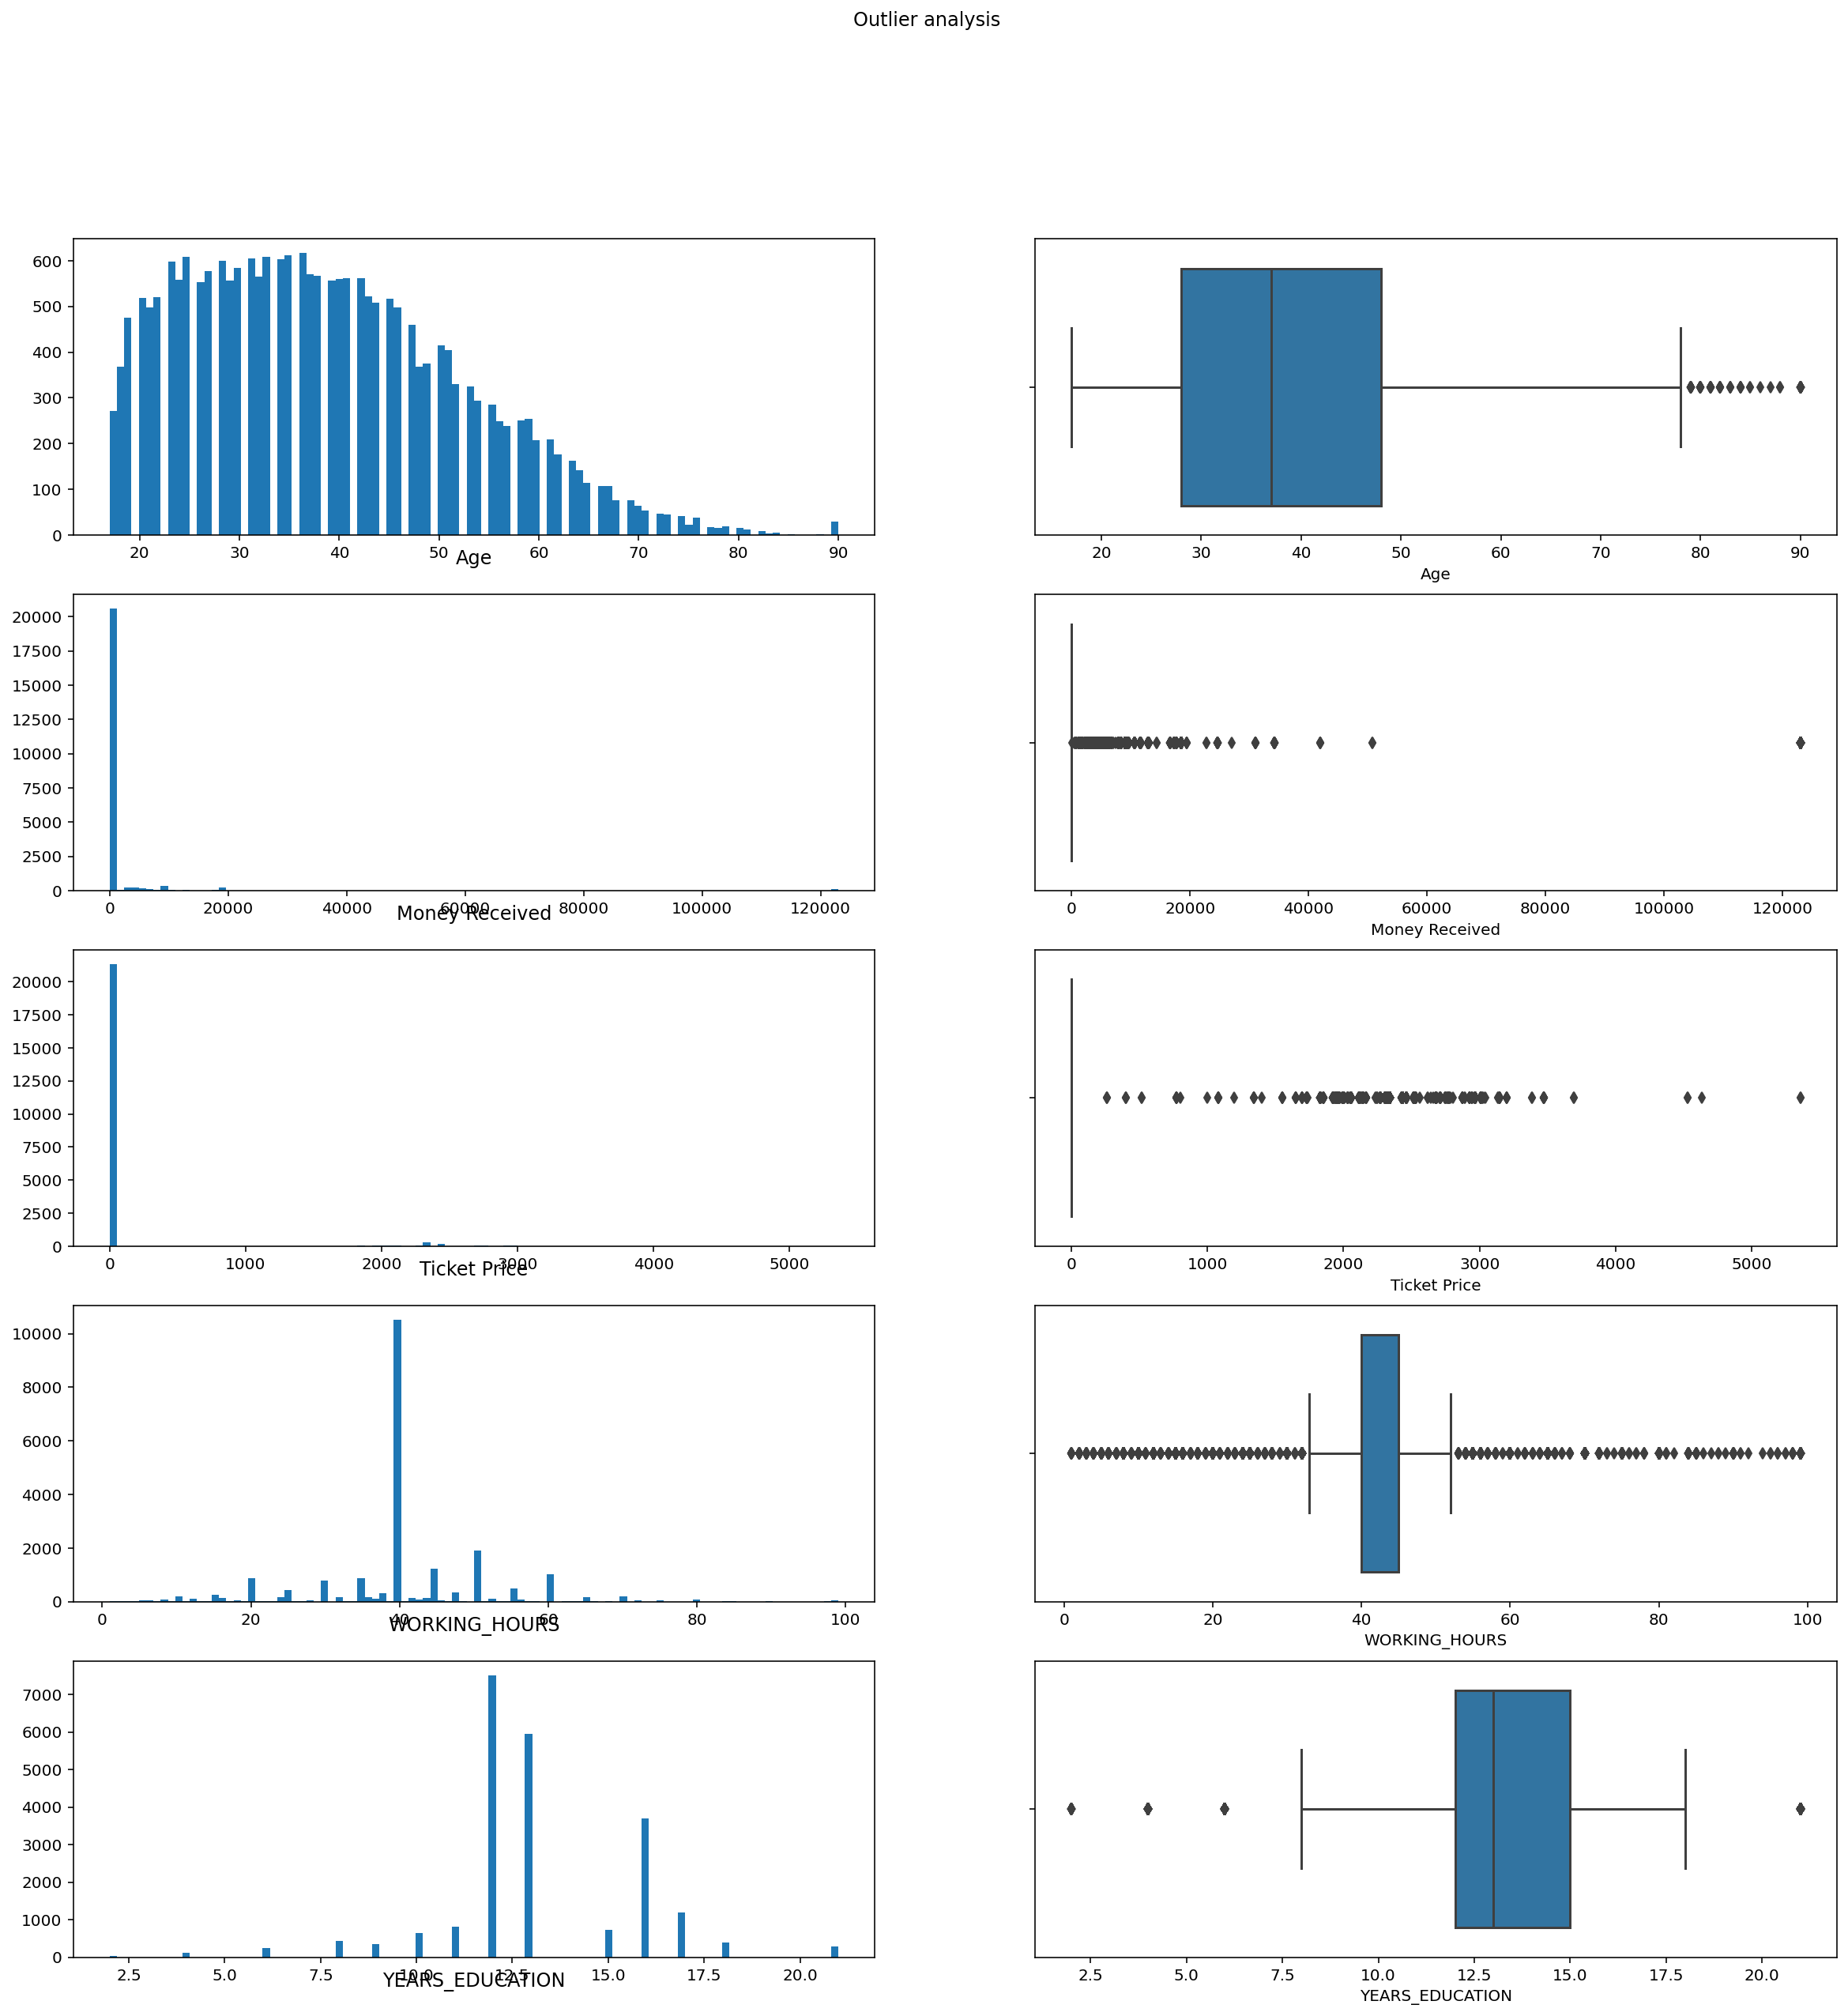

In [92]:
hist_box_maker(train_num,'Outlier analysis',5,20,20)

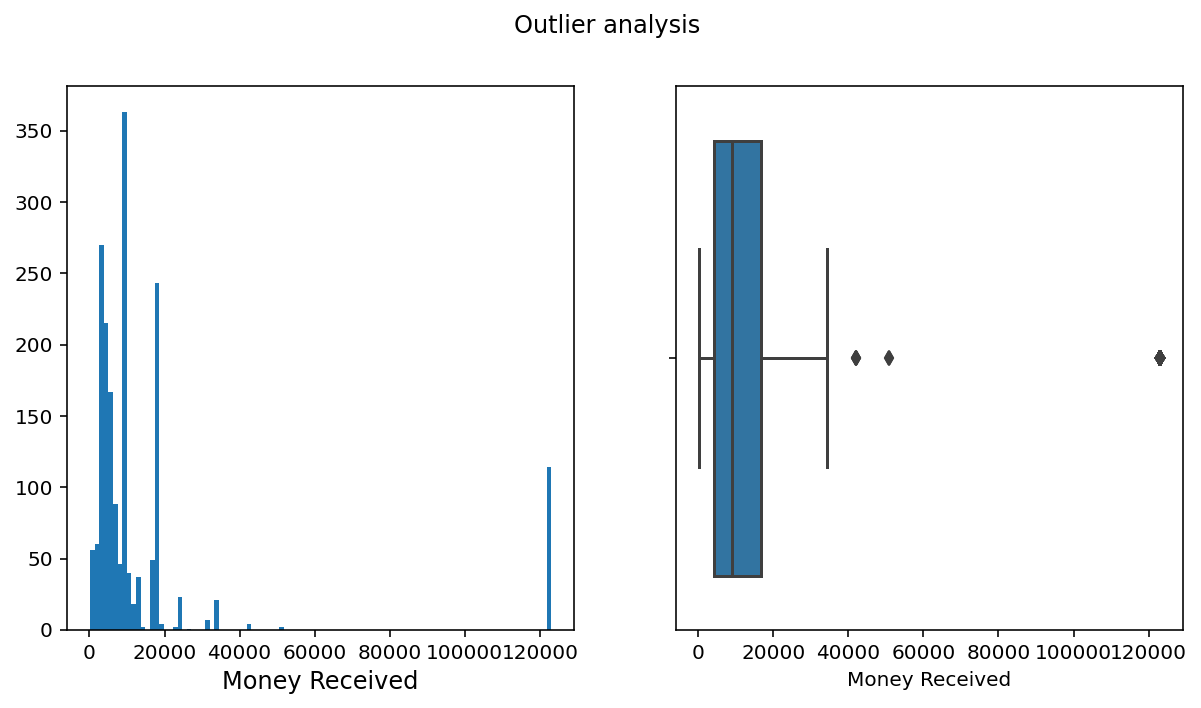

In [93]:
hist_box_maker(train_num[['Money Received']][(train_num['Money Received'] != 0)],'Outlier analysis',1,10,5)

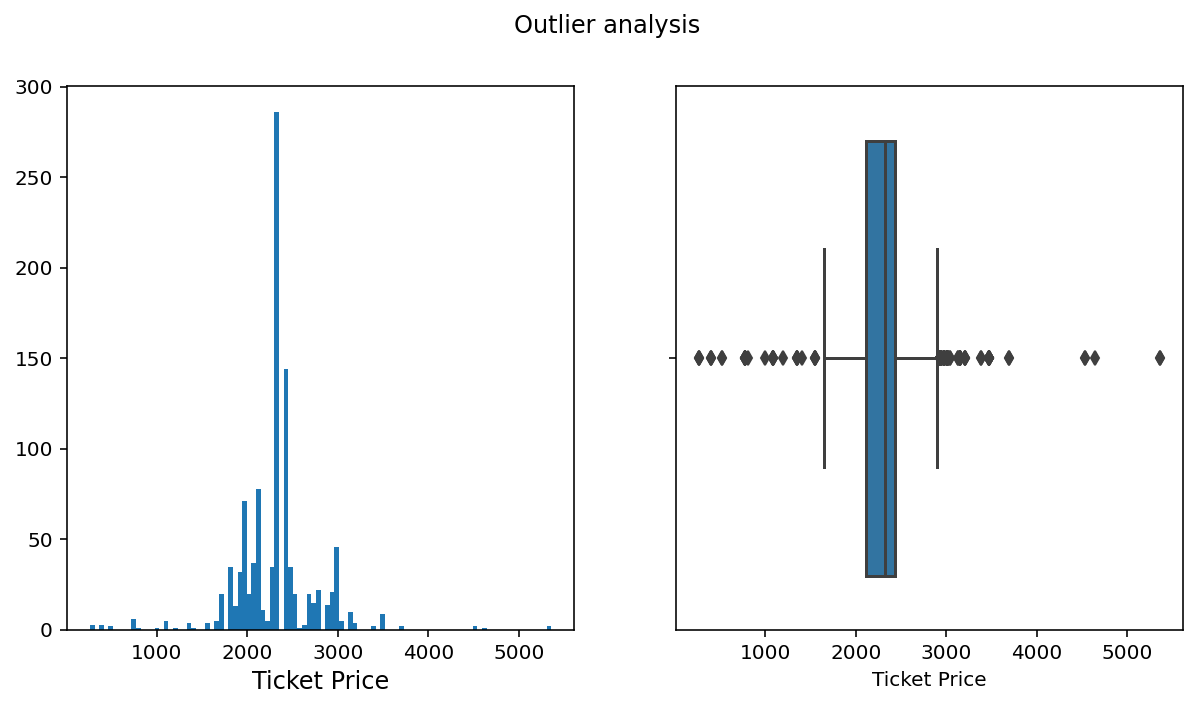

In [94]:
hist_box_maker(train_num[['Ticket Price']][(train['Ticket Price'] != 0)],'Outlier analysis',1,10,5)

In [95]:
filters_train = (
                    (train['Age'] > 89) |
                    (train['Money Received'] > 30000) |
                    (train['Ticket Price'] > 4000) |
                    (train['WORKING_HOURS'] > 95) |
                    (train['YEARS_EDUCATION'] > 20)
                                                          )

In [96]:
#Dataframe with outliers

train_out = train.copy()

In [97]:
train[(~(filters_train))].shape[0] /train.shape[0]

0.9767857142857143

In [98]:
train=train[(~(filters_train))]

### **Filter methods**

### Correlation Feature Selection

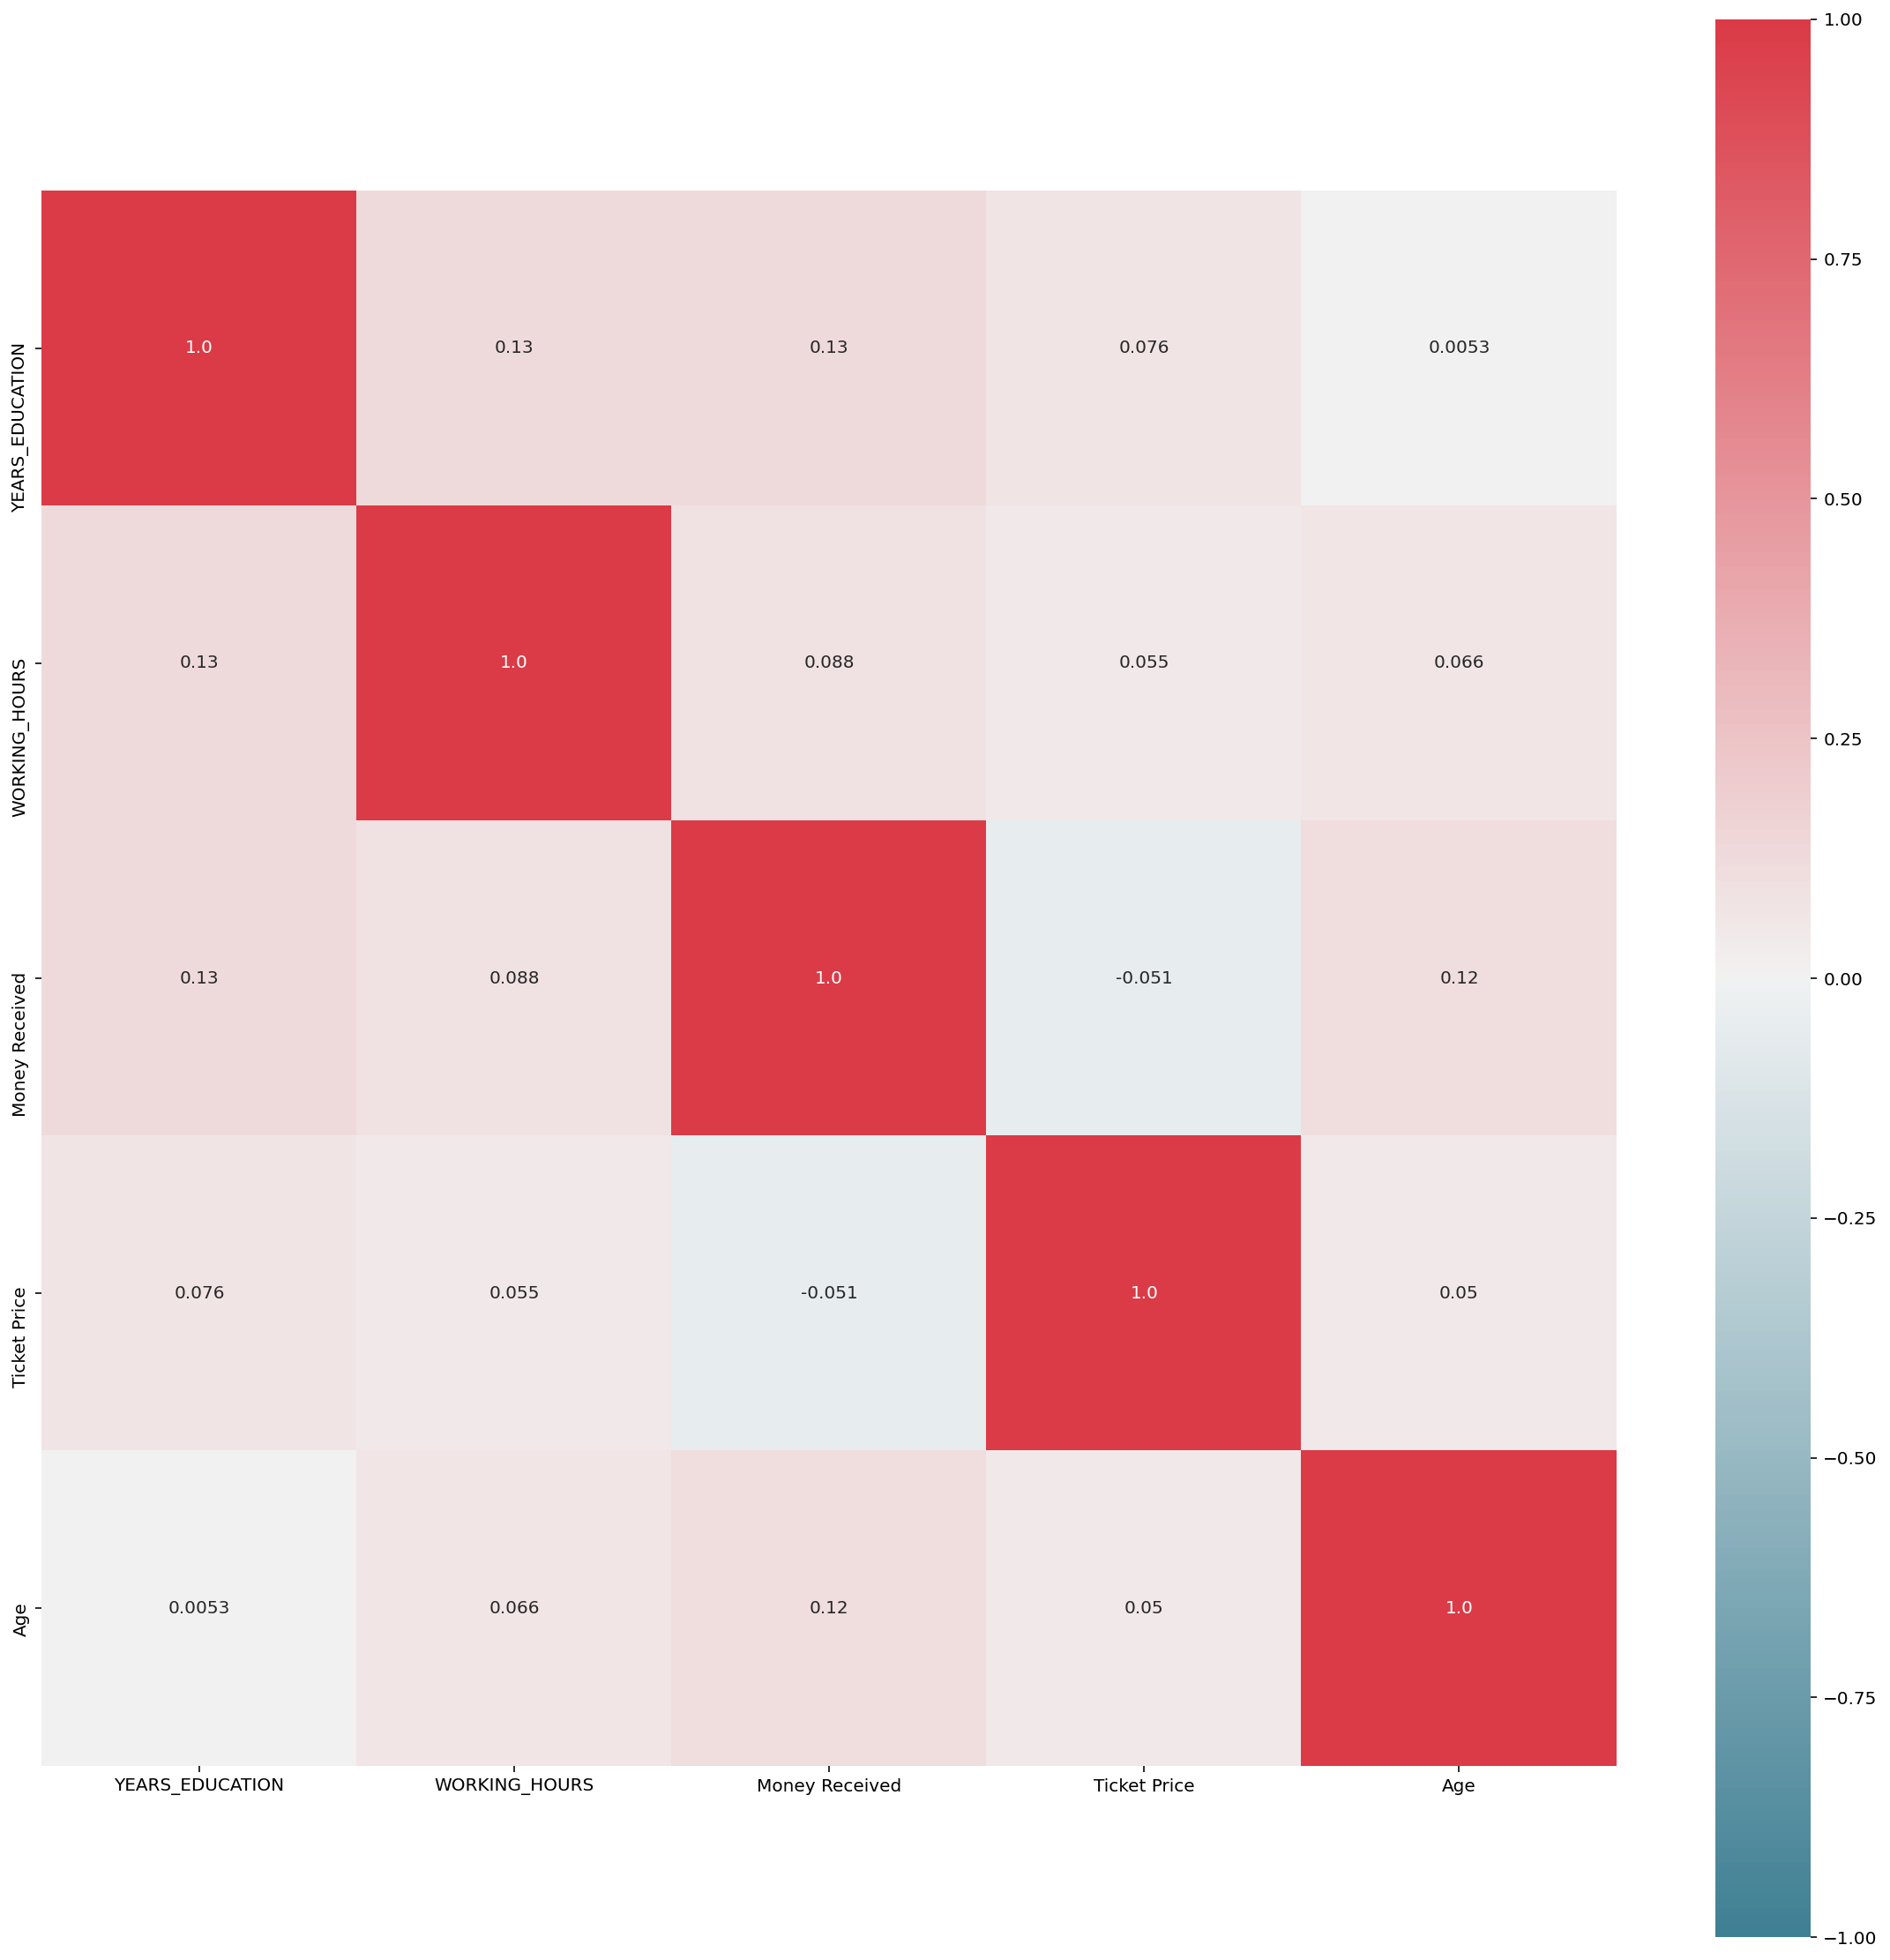

In [99]:
train_corr=train[train_num.columns.to_list()].corr(method = "pearson")
plt.figure(figsize=(20,20))
sns.heatmap(data = train_corr, annot = True, cmap=sns.diverging_palette(220, 10, as_cmap=True), fmt='.2',  vmin=-1, vmax=1, center=0,square=True )

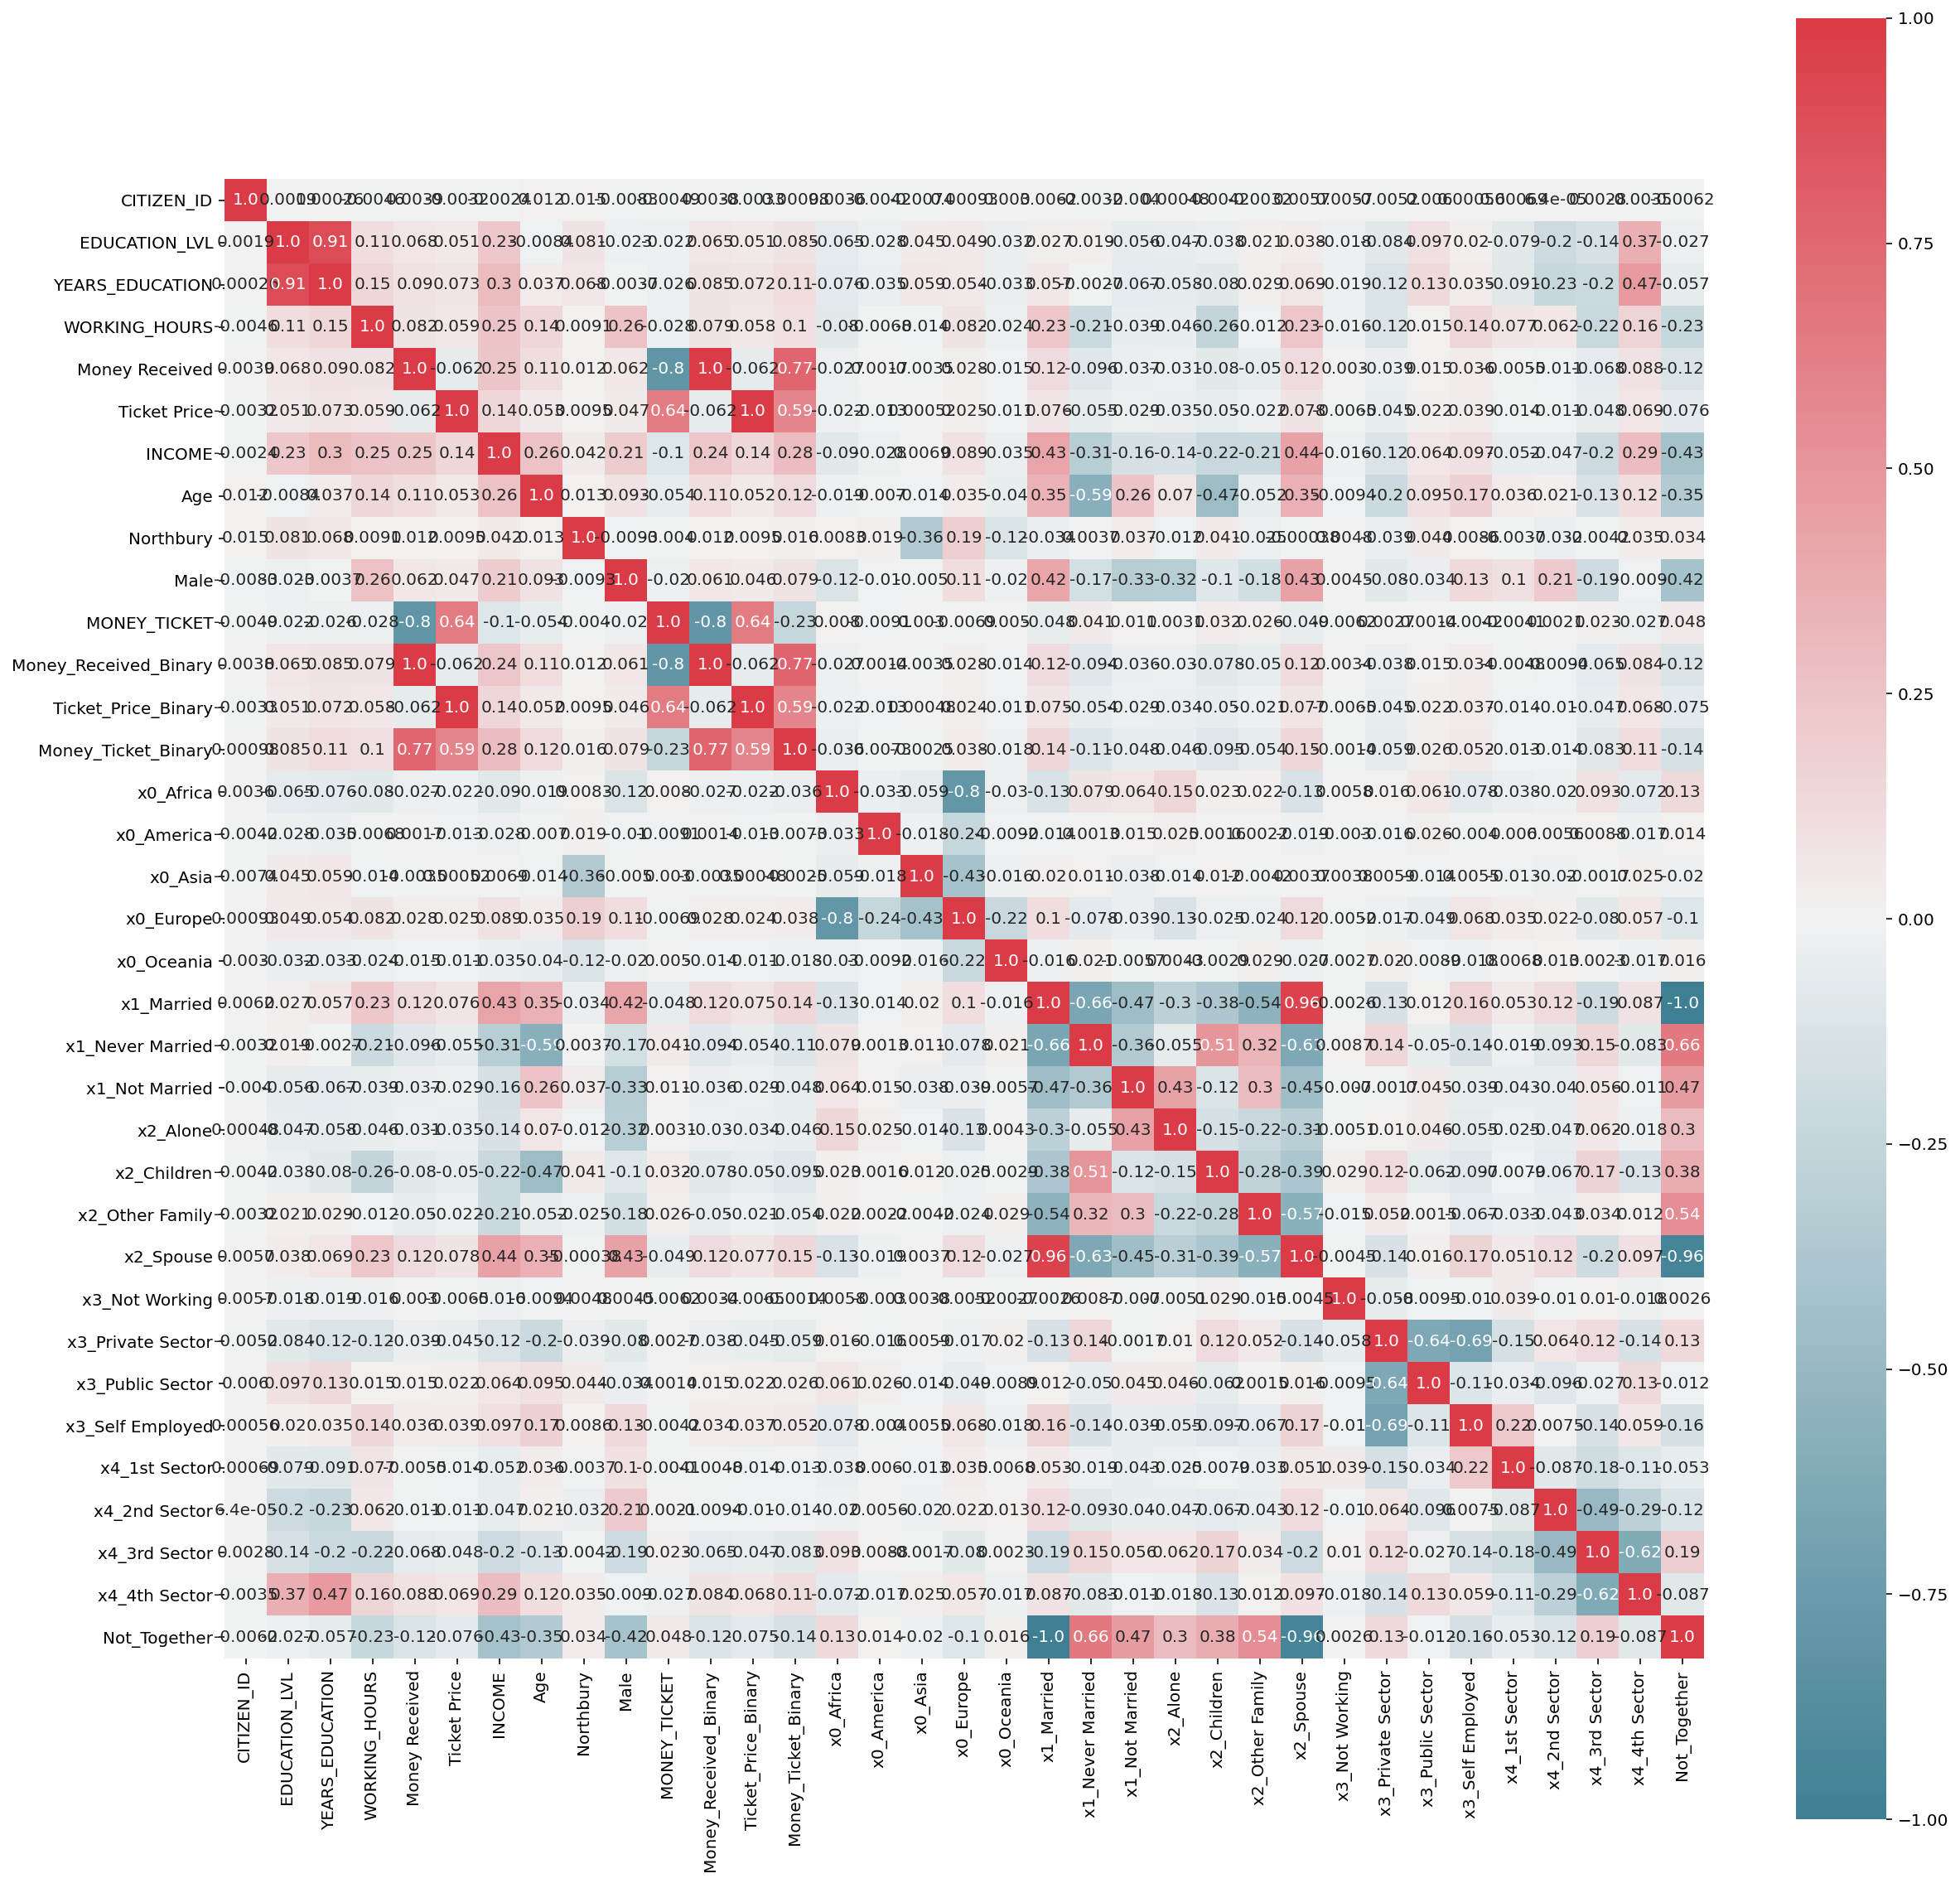

In [100]:
train_corr=train.corr(method = "spearman")
plt.figure(figsize=(20,20))
sns.heatmap(data = train_corr, annot = True, cmap=sns.diverging_palette(220, 10, as_cmap=True), fmt='.2',  vmin=-1, vmax=1, center=0,square=True )

#Acho que tmb devíamos fazer aquela matriz de scatter plots e histogramas, o que iria substituir os histogramas em cima
#e teríamos de fazer os boxplots na mesma

#Não esquecer que para comparar binárias, se n me engano, uma matriz espécie TP, TN tmb era fixe

In [101]:
train.drop(columns =["EDUCATION_LVL", "x1_Married", "CITIZEN_ID", "x0_Africa"], inplace = True)

In [102]:
binary = train.drop(columns = ['YEARS_EDUCATION', 'WORKING_HOURS', 'Money Received', 'Ticket Price', 'Age', 'INCOME','MONEY_TICKET']).columns.to_list()

In [103]:
train.columns

Index(['YEARS_EDUCATION', 'WORKING_HOURS', 'Money Received', 'Ticket Price',
       'INCOME', 'Age', 'Northbury', 'Male', 'MONEY_TICKET',
       'Money_Received_Binary', 'Ticket_Price_Binary', 'Money_Ticket_Binary',
       'x0_America', 'x0_Asia', 'x0_Europe', 'x0_Oceania', 'x1_Never Married',
       'x1_Not Married', 'x2_Alone', 'x2_Children', 'x2_Other Family',
       'x2_Spouse', 'x3_Not Working', 'x3_Private Sector', 'x3_Public Sector',
       'x3_Self Employed', 'x4_1st Sector', 'x4_2nd Sector', 'x4_3rd Sector',
       'x4_4th Sector', 'Not_Together'],
      dtype='object')

https://heartbeat.fritz.ai/hands-on-with-feature-selection-techniques-filter-methods-f248e0436ce5

In [104]:
chi2_score, chi_2_p_value = chi2(train[binary], train['INCOME'])
f_score, f_p_value = f_classif(train[train.drop(columns=binary).columns.to_list()],train['INCOME'])
print('Binary Columns: ', train[binary].columns)
print('Metric Columns: ', train.drop(columns=binary).columns)
print('chi2 score        ', chi2_score)
print('chi2 p-value      ', chi_2_p_value)
print('F - score score   ', f_score)
print('F - score p-value ', f_p_value)

Binary Columns:  Index(['Northbury', 'Male', 'Money_Received_Binary', 'Ticket_Price_Binary',
       'Money_Ticket_Binary', 'x0_America', 'x0_Asia', 'x0_Europe',
       'x0_Oceania', 'x1_Never Married', 'x1_Not Married', 'x2_Alone',
       'x2_Children', 'x2_Other Family', 'x2_Spouse', 'x3_Not Working',
       'x3_Private Sector', 'x3_Public Sector', 'x3_Self Employed',
       'x4_1st Sector', 'x4_2nd Sector', 'x4_3rd Sector', 'x4_4th Sector',
       'Not_Together'],
      dtype='object')
Metric Columns:  Index(['YEARS_EDUCATION', 'WORKING_HOURS', 'Money Received', 'Ticket Price',
       'INCOME', 'Age', 'MONEY_TICKET'],
      dtype='object')
chi2 score         [3.99889248e+00 3.17777129e+02 1.12743725e+03 4.18643727e+02
 1.52421659e+03 1.65434498e+01 1.01728526e+00 2.55215433e+01
 2.66817095e+01 1.42198600e+03 4.69789030e+02 3.64005564e+02
 9.09542899e+02 6.92293471e+02 2.36837865e+03 5.55087699e+00
 6.42542847e+01 8.02728463e+01 1.82234352e+02 5.63900647e+01
 3.99664433e+01 4.35073348

In [105]:
#variables to drop due to chi-squared
train.drop(columns =["Northbury", 'x0_Asia'], inplace = True)

In [106]:
#variables to drop due to multicoliniarity
train.drop(columns =['x2_Alone', 'x4_3rd Sector', 'x3_Not Working'], inplace = True)

## Bins

In [107]:
YEARS_EDUCATION_Bin = KBinsDiscretizer(n_bins=6, encode='ordinal', strategy='quantile').fit(train[['YEARS_EDUCATION']])
train['YEARS_EDUCATION_Bin'] = YEARS_EDUCATION_Bin.transform(train[['YEARS_EDUCATION']])
WORKING_HOURS_Bin = KBinsDiscretizer(n_bins=6, encode='ordinal', strategy='quantile').fit(train[['WORKING_HOURS']])
train['WORKING_HOURS_Bin'] = WORKING_HOURS_Bin.transform(train[['WORKING_HOURS']])
Money_Received_Bin = KBinsDiscretizer(n_bins=6, encode='ordinal', strategy='quantile').fit(train[['Money Received']])
train['Money Received_Bin'] = Money_Received_Bin.transform(train[['Money Received']])
Ticket_Price_Bin = KBinsDiscretizer(n_bins=6, encode='ordinal', strategy='quantile').fit(train[['Ticket Price']])
train['Ticket Price_Bin'] = Ticket_Price_Bin.transform(train[['Ticket Price']])
Age_Bin = KBinsDiscretizer(n_bins=6, encode='ordinal', strategy='quantile').fit(train[['Age']])
train['Age_Bin'] = Age_Bin.transform(train[['Age']])

In [108]:
bin_columns = ['YEARS_EDUCATION_Bin', 'WORKING_HOURS_Bin', 'Money Received_Bin', 'Ticket Price_Bin', 'Age_Bin']

## Kaggle Transformations

In [109]:
for i in ["Name", "Native Continent", "Marital Status", "Lives with", "Base Area", "Education Level", "Employment Sector", "Role"]:
    kaggle[i] = kaggle[i].astype("str")
    
questionmark_to_nan(kaggle, 'Base Area') 
questionmark_to_nan(kaggle, 'Employment Sector') 
questionmark_to_nan(kaggle, 'Role')

kaggle["YOB"] = kaggle['Birthday'].str.split(' ', n = 2, expand = True)[2].str.split(',', n = 1, expand = True)[1]
kaggle['YOB'] = kaggle['YOB'].astype('int64')
birthday_to_age(kaggle, 'YOB', 'Age')
kaggle.drop(columns = ['Birthday', 'YOB'], inplace = True)

kaggle['Northbury'] = kaggle['Base Area'].map(lambda x: 1 if x == 'Northbury' else 0)
kaggle.drop(columns = ['Base Area'], inplace = True)

kaggle['Gender'] = kaggle['Name'].str.split(' ', n = 1, expand = True)[0] 
kaggle['Male'] = kaggle['Gender'].map(lambda x: 1 if x == 'Mr.' else 0)
kaggle.drop(columns = ['Name', 'Gender'], inplace = True)

kaggle['Marital Status'] = kaggle['Marital Status'].map(lambda x: 'Married' if ((x == 'Married - Spouse Missing') | (x == 'Married - Spouse in the Army') ) else x)
kaggle['Marital Status'] = kaggle['Marital Status'].map(lambda x: 'Not Married' if ((x == 'Divorced')  | (x == 'Separated') | (x == 'Widow')) else x)
kaggle['Marital Status'] = kaggle['Marital Status'].map(lambda x: 'Never Married' if ((x == 'Single') ) else x)


kaggle['Lives with'] = kaggle['Lives with'].map(lambda x: 'Spouse' if ((x == 'Wife') | (x == 'Husband')) else x)
kaggle['Lives with'] = kaggle['Lives with'].map(lambda x: 'Other Family' if (x == 'Other relatives') else x)



kaggle['Education Level'] = kaggle['Education Level'].map(lambda x: 'Masters' if ("Masters" in x) else x)
kaggle['Education Level'] = kaggle['Education Level'].map(lambda x: 'PostGraduation' if ("PostGraduation" in x) else x)
kaggle['Education Level'] = kaggle['Education Level'].map(lambda x: 'Incomplete High School' if ((x== "High School - 2nd Cycle") | (x== "High School - 1st Cycle")) else x)
kaggle['Education Level'] = kaggle['Education Level'].map(lambda x: 'Less than Middle School' if ((x=="Middle School - 2nd Cycle") | (x== "Middle School - 1st Cycle") | (x== "Primary School") |(x== "Preschool" )) else x)
kaggle['Education Level'] = kaggle['Education Level'].map(lambda x: '<HighSchool' if ((x=="Incomplete High School") | (x== "Less than Middle School") | (x== "Middle School Complete")) else x)

kaggle['Education Level'] = kaggle['Education Level'].map(lambda x: 'EQF3 or less' if ((x=="<HighSchool")) else x)
kaggle['Education Level'] = kaggle['Education Level'].map(lambda x: 'EQF4' if ((x=="High School Complete")) else x)
kaggle['Education Level'] = kaggle['Education Level'].map(lambda x: 'EQF5' if ((x=="Professional School")) else x)
kaggle['Education Level'] = kaggle['Education Level'].map(lambda x: 'EQF6' if ((x=="Bachelors")) else x)
kaggle['Education Level'] = kaggle['Education Level'].map(lambda x: 'EQF7' if ((x=="Masters") | (x== "PostGraduation")) else x)
kaggle['Education Level'] = kaggle['Education Level'].map(lambda x: 'EQF8' if ((x=="PhD")) else x)

kaggle["Employment Sector"] = kaggle["Employment Sector"].astype("str")
kaggle["Employment Sector"]= kaggle["Employment Sector"].map(lambda x: 'Private Sector' if ("Private Sector" in x) else x)
kaggle["Employment Sector"]= kaggle["Employment Sector"].map(lambda x: 'Public Sector' if ("Public Sector" in x) else x)
kaggle["Employment Sector"]= kaggle["Employment Sector"].map(lambda x: 'Self Employed' if ("Self-Employed" in x) else x)
kaggle['Employment Sector'] = kaggle['Employment Sector'].map(lambda x: 'Not Working' if ((x=="Unemployed") | (x== "Never Worked")) else x)
kaggle['Employment Sector'] = kaggle['Employment Sector'].map(lambda x: np.nan if ((x=="nan")) else x)


kaggle["Role"]= kaggle["Role"].map(lambda x: '1st Sector' if ((x=="Agriculture and Fishing")) else x)
kaggle["Role"]= kaggle["Role"].map(lambda x: '2nd Sector' if ((x=="Repair & constructions") | (x== "Machine Operators & Inspectors"))else x)
kaggle["Role"]= kaggle["Role"].map(lambda x: '3rd Sector' if ((x== "Administratives")| (x== "Sales")| (x== "Other services")| (x== "Transports")| (x== "Cleaners & Handlers")| (x== "Household Services")| (x== "Security")| (x== "Army"))else x)
kaggle["Role"]= kaggle["Role"].map(lambda x: '4th Sector' if ((x=="IT") | (x== "Professor")| (x== "Management"))else x)

kaggle["MONEY_TICKET"] = kaggle["Money Received"].map(lambda x: -x ) + kaggle["Ticket Price"]
kaggle['Money_Received_Binary'] = kaggle['Money Received'].map(lambda x: 1 if x > 0 else 0)
kaggle['Ticket_Price_Binary'] = kaggle['Ticket Price'].map(lambda x: 1 if x > 0 else 0)
kaggle['Money_Ticket_Binary'] = kaggle['Money_Received_Binary'] + kaggle['Ticket_Price_Binary']



kaggle["Employment Sector"]= kaggle["Employment Sector"].fillna(kaggle["Employment Sector"].mode()[0])
kaggle["Role"]= kaggle["Role"].fillna(kaggle["Role"].mode()[0])


one_hot_var = ohe(kaggle, ['Native Continent', 'Marital Status', 'Lives with', "Employment Sector", "Role"])
kaggle = pd.concat([kaggle.drop(columns = ['Native Continent', 'Marital Status', 'Lives with', "Employment Sector", "Role"]), one_hot_var], axis = 1)
encoder= ce.OrdinalEncoder(cols=['Education Level'],return_df=True, mapping=[{'col':'Education Level','mapping':{'EQF3 or less':0,'EQF4':1,'EQF5':2,'EQF6':3,'EQF7':4,'EQF8':5}}])
kaggle = encoder.fit_transform(kaggle)

kaggle["Not_Together"] = kaggle[["x1_Not Married", 'x1_Never Married']].sum(axis=1)


kaggle = kaggle.rename(columns={"Native Continent": "CONTINENT", "Lives with": "LIVES_WITH", 'Education Level': "EDUCATION_LVL",
                      'Years of Education': "YEARS_EDUCATION", 'Employment Sector': "EMPLOY_SECTOR", 'Role': "ECON_SECTOR",
                      'Working Hours per week': "WORKING_HOURS", 'Income': "INCOME",'Marital Status': "MARITAL_STATUS" })

kaggle.drop(columns =["EDUCATION_LVL", "x1_Married", "CITIZEN_ID", "x0_Africa"], inplace = True)
kaggle.drop(columns =["Northbury", 'x0_Asia'], inplace = True)
kaggle.drop(columns =['x2_Alone', 'x4_3rd Sector', 'x3_Not Working'], inplace = True)


kaggle['YEARS_EDUCATION_Bin'] = YEARS_EDUCATION_Bin.transform(kaggle[['YEARS_EDUCATION']])
kaggle['WORKING_HOURS_Bin'] = WORKING_HOURS_Bin.transform(kaggle[['WORKING_HOURS']])
kaggle['Money Received_Bin'] = Money_Received_Bin.transform(kaggle[['Money Received']])
kaggle['Ticket Price_Bin'] = Ticket_Price_Bin.transform(kaggle[['Ticket Price']])
kaggle['Age_Bin'] = Age_Bin.transform(kaggle[['Age']])

# Train test Split

In [110]:
X = train.drop(columns = ['INCOME'])
y = train['INCOME']

In [111]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.40, stratify = y, random_state = 15)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size = 0.50, stratify = y_val, random_state = 15)

In [112]:
min_max = MinMaxScaler().fit(X_train)
X_train[X_train.columns.to_list()] = min_max.transform(X_train)
X_val[X_val.columns.to_list()] = min_max.transform(X_val) 
X_test[X_test.columns.to_list()] = min_max.transform(X_test)
kaggle[kaggle.columns.to_list()] = min_max.transform(kaggle)

In [113]:
#Df's to be used

X_train_Original = X_train.drop(columns = ['Money_Received_Binary', 'Ticket_Price_Binary', "MONEY_TICKET", 'Money_Ticket_Binary', 'YEARS_EDUCATION_Bin', 'WORKING_HOURS_Bin', 'Money Received_Bin', 'Ticket Price_Bin', 'Age_Bin','Not_Together'])
X_val_Original = X_val.drop(columns = ['Money_Received_Binary', 'Ticket_Price_Binary', "MONEY_TICKET", 'Money_Ticket_Binary', 'YEARS_EDUCATION_Bin', 'WORKING_HOURS_Bin', 'Money Received_Bin', 'Ticket Price_Bin', 'Age_Bin','Not_Together'])
X_test_Original = X_test.drop(columns = ['Money_Received_Binary', 'Ticket_Price_Binary', "MONEY_TICKET", 'Money_Ticket_Binary', 'YEARS_EDUCATION_Bin', 'WORKING_HOURS_Bin', 'Money Received_Bin', 'Ticket Price_Bin', 'Age_Bin','Not_Together'])

X_train_MTB = X_train.drop(columns = ['Money Received', 'Ticket Price', "MONEY_TICKET", 'Money_Ticket_Binary', 'YEARS_EDUCATION_Bin', 'WORKING_HOURS_Bin', 'Money Received_Bin', 'Ticket Price_Bin', 'Age_Bin','Not_Together'])
X_val_MTB = X_val.drop(columns = ['Money Received', 'Ticket Price', "MONEY_TICKET", 'Money_Ticket_Binary', 'YEARS_EDUCATION_Bin', 'WORKING_HOURS_Bin', 'Money Received_Bin', 'Ticket Price_Bin', 'Age_Bin','Not_Together'])
X_test_MTB = X_test.drop(columns = ['Money Received', 'Ticket Price', "MONEY_TICKET", 'Money_Ticket_Binary', 'YEARS_EDUCATION_Bin', 'WORKING_HOURS_Bin', 'Money Received_Bin', 'Ticket Price_Bin', 'Age_Bin','Not_Together'])

X_train_MT = X_train.drop(columns = ['Money_Received_Binary', 'Ticket_Price_Binary','Money Received', 'Ticket Price', 'MONEY_TICKET', 'YEARS_EDUCATION_Bin', 'WORKING_HOURS_Bin', 'Money Received_Bin', 'Ticket Price_Bin', 'Age_Bin','Not_Together'])
X_val_MT = X_val.drop(columns = ['Money_Received_Binary', 'Ticket_Price_Binary','Money Received', 'Ticket Price', 'MONEY_TICKET', 'YEARS_EDUCATION_Bin', 'WORKING_HOURS_Bin', 'Money Received_Bin', 'Ticket Price_Bin', 'Age_Bin','Not_Together'])
X_test_MT = X_test.drop(columns = ['Money_Received_Binary', 'Ticket_Price_Binary','Money Received', 'Ticket Price', 'MONEY_TICKET', 'YEARS_EDUCATION_Bin', 'WORKING_HOURS_Bin', 'Money Received_Bin', 'Ticket Price_Bin', 'Age_Bin','Not_Together'])

X_train_Bin = X_train.drop(columns = ['Money Received', 'Ticket Price', 'Money_Received_Binary', 'Ticket_Price_Binary','Money Received', 'Ticket Price', 'MONEY_TICKET', 'YEARS_EDUCATION', 'WORKING_HOURS', 'Age','Not_Together'])
X_val_Bin = X_val.drop(columns = ['Money Received', 'Ticket Price', 'Money_Received_Binary', 'Ticket_Price_Binary','Money Received', 'Ticket Price', 'MONEY_TICKET', 'YEARS_EDUCATION', 'WORKING_HOURS', 'Age','Not_Together'])
X_test_Bin = X_test.drop(columns = ['Money Received', 'Ticket Price', 'Money_Received_Binary', 'Ticket_Price_Binary','Money Received', 'Ticket Price', 'MONEY_TICKET', 'YEARS_EDUCATION', 'WORKING_HOURS', 'Age','Not_Together'])

# **Feature Selection**

Não esquecer que devemos especificar um random state para cada função/algoritmo para ter resultados consistentes.

https://xgboost.readthedocs.io/en/latest/tutorials/model.html
https://www.datacamp.com/community/tutorials/xgboost-in-python

<img src="https://github.com/martaldsantos/newland_project/blob/master/feature_selection2..png?raw=1" alt="feature_selection_logic" width="700" height="700"  align="center">

https://towardsdatascience.com/feature-selection-techniques-for-classification-and-python-tips-for-their-application-10c0ddd7918b

In [207]:
binary_original = X_train_Original.drop(columns = ['YEARS_EDUCATION', 'WORKING_HOURS', 'Money Received', 'Ticket Price', 'Age']).columns.to_list()

SelectKBest(k='all', score_func=<function chi2 at 0x7f3615142f28>)
             Variable        Score
8           x2_Spouse  1405.293680
4    x1_Never Married   840.320785
14      x4_4th Sector   778.069174
6         x2_Children   533.825541
7     x2_Other Family   413.370661
5      x1_Not Married   283.298372
0                Male   195.274461
11   x3_Self Employed   103.262829
10   x3_Public Sector    50.729823
9   x3_Private Sector    38.366393
13      x4_2nd Sector    27.949760
12      x4_1st Sector    26.146935
2           x0_Europe    15.158602
3          x0_Oceania    12.577819
1          x0_America     8.674784


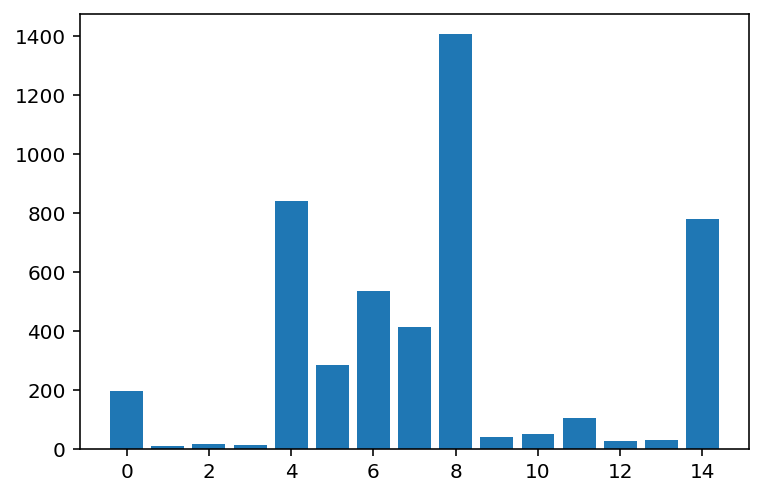

In [208]:
# não mexam nisto tenho quase a certeza absoluta que funciona e que e assim que se faz mas vou pesquizar melhor
fs = SelectKBest(score_func=chi2, k='all')
fs.fit(X_train_Original[binary_original], y_train)
X_train_fs = fs.transform(X_train_Original[binary_original])
names=list(X_train_Original[binary_original].columns)
print(fs)

df_scores_chi2 = pd.DataFrame(list(zip(names, fs.scores_)), columns =['Variable', 'Score']).sort_values(by = ["Score"], ascending = False)
print(df_scores_chi2)

# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

### **Wrapper method**

https://www.analyticsvidhya.com/blog/2020/10/a-comprehensive-guide-to-feature-selection-using-wrapper-methods-in-python/

In [209]:
################Qnd decidirmos se utilizamos isto passar os imports pa cima################

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE


#Pq n o RFECV

#Acho que deviamos acrescentar tmb repeated stratifiedkfold aqui, como mostra o link em baixo
#https://machinelearningmastery.com/rfe-feature-selection-in-python/

# nro of features
nof_list=np.arange(1,22)            
high_score=0
# Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):

    X_train_rfe, X_rfe_val, y_train_rfe, y_rfe_val = train_test_split(X_train_Original[binary_original], y_train, test_size = 0.2, stratify = y_train,
                                                                      random_state = 15)
    
    model_rfe = LogisticRegression(random_state = 5)
    rfe = RFE(model_rfe,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train_rfe,y_train_rfe)
    X_rfe_val = rfe.transform(X_rfe_val)
    
    model_rfe.fit(X_train_rfe,y_train_rfe)
    
    score = model_rfe.score(X_rfe_val,y_rfe_val)
    score_list.append(score)
    
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
        

print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 3
Score with 3 features: 0.824829


In [210]:
N = 1
model_rfe = LogisticRegression(random_state = 5)
rfe = RFE(estimator = model_rfe, n_features_to_select = N)
X_rfe = rfe.fit_transform(X = X_train_Original[binary_original], y = y_train) 

selected_features_rfe = pd.Series(rfe.ranking_, index = X_train_Original[binary_original].columns)
selected_features_rfe.sort_values()

x2_Spouse             1
x2_Children           2
x4_4th Sector         3
x0_Oceania            4
x4_1st Sector         5
x0_America            6
x1_Never Married      7
x2_Other Family       8
Male                  9
x1_Not Married       10
x3_Public Sector     11
x0_Europe            12
x4_2nd Sector        13
x3_Self Employed     14
x3_Private Sector    15
dtype: int64

In [211]:
################Qnd decidirmos se utilizamos isto passar os imports pa cima################

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE


#Pq n o RFECV

#Acho que deviamos acrescentar tmb repeated stratifiedkfold aqui, como mostra o link em baixo
#https://machinelearningmastery.com/rfe-feature-selection-in-python/

# nro of features
nof_list=np.arange(1,22)            
high_score=0
# Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):

    X_train_rfe, X_rfe_val, y_train_rfe, y_rfe_val = train_test_split(X_train_Original.drop(columns=X_train_Original[binary_original]), y_train, test_size = 0.2, stratify = y_train,
                                                                      random_state = 15)
    
    model_rfe = DecisionTreeClassifier(random_state = 5)
    rfe = RFE(model_rfe,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train_rfe,y_train_rfe)
    X_rfe_val = rfe.transform(X_rfe_val)
    
    model_rfe.fit(X_train_rfe,y_train_rfe)
    
    score = model_rfe.score(X_rfe_val,y_rfe_val)
    score_list.append(score)
    
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
        

print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 1
Score with 1 features: 0.814166


In [212]:
N = 1
model_rfe = DecisionTreeClassifier(random_state = 5)
rfe = RFE(estimator = model_rfe, n_features_to_select = N)
X_rfe = rfe.fit_transform(X = X_train_Original.drop(columns=X_train_Original[binary_original]), y = y_train) 

selected_features_rfe = pd.Series(rfe.ranking_, index = X_train_Original.drop(columns=X_train_Original[binary_original]).columns)
selected_features_rfe.sort_values()

Money Received     1
Age                2
WORKING_HOURS      3
YEARS_EDUCATION    4
Ticket Price       5
dtype: int64

In [213]:
N = 1
model_rfe = LogisticRegression(random_state = 5)
rfe = RFE(estimator = model_rfe, n_features_to_select = N)
X_rfe = rfe.fit_transform(X = X_train_Original.drop(columns=X_train_Original[binary_original]), y = y_train) 

selected_features_rfe = pd.Series(rfe.ranking_, index = X_train_Original.drop(columns=X_train_Original[binary_original]).columns)
selected_features_rfe.sort_values()

Money Received     1
YEARS_EDUCATION    2
WORKING_HOURS      3
Age                4
Ticket Price       5
dtype: int64

### **Intrinsic Methods**


#### Decision Tree Classifier - gini and entropy - binary variables

In [214]:
gini_importance = DecisionTreeClassifier().fit(X_train_Original[binary_original], y_train).feature_importances_
entropy_importance = DecisionTreeClassifier(criterion='entropy').fit(X_train_Original[binary_original], y_train).feature_importances_

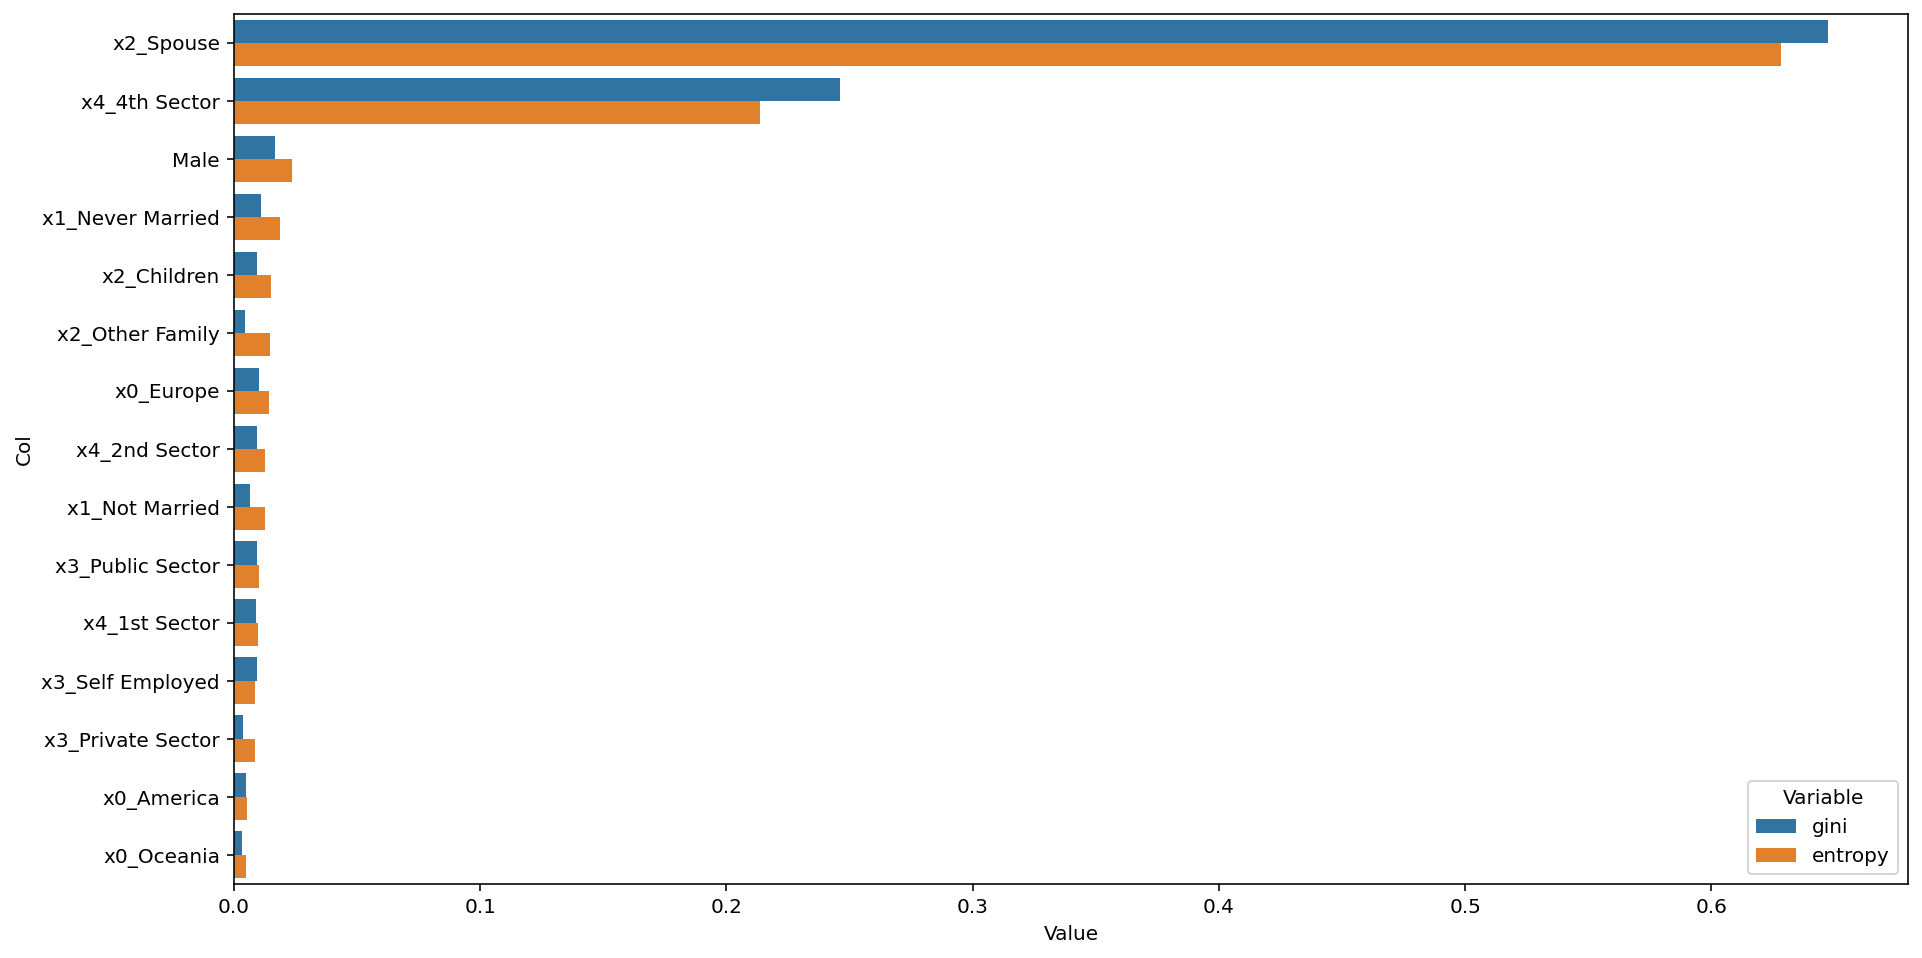

In [215]:
zippy = pd.DataFrame(zip(gini_importance, entropy_importance), columns = ['gini','entropy'])
zippy['col'] = X_train_Original[binary_original].columns
tidy = zippy.melt(id_vars='col').rename(columns=str.title)
tidy.sort_values(['Value'], ascending = False, inplace = True)

plt.figure(figsize=(15,8))
sns.barplot(y='Col', x='Value', hue='Variable', data=tidy)

#### Decision Tree Classifier - gini and entropy - numerical variables

In [216]:
gini_importance = DecisionTreeClassifier().fit(X_train_Original.drop(columns=X_train_Original[binary_original]), y_train).feature_importances_
entropy_importance = DecisionTreeClassifier(criterion='entropy').fit(X_train_Original.drop(columns=X_train_Original[binary_original]), y_train).feature_importances_

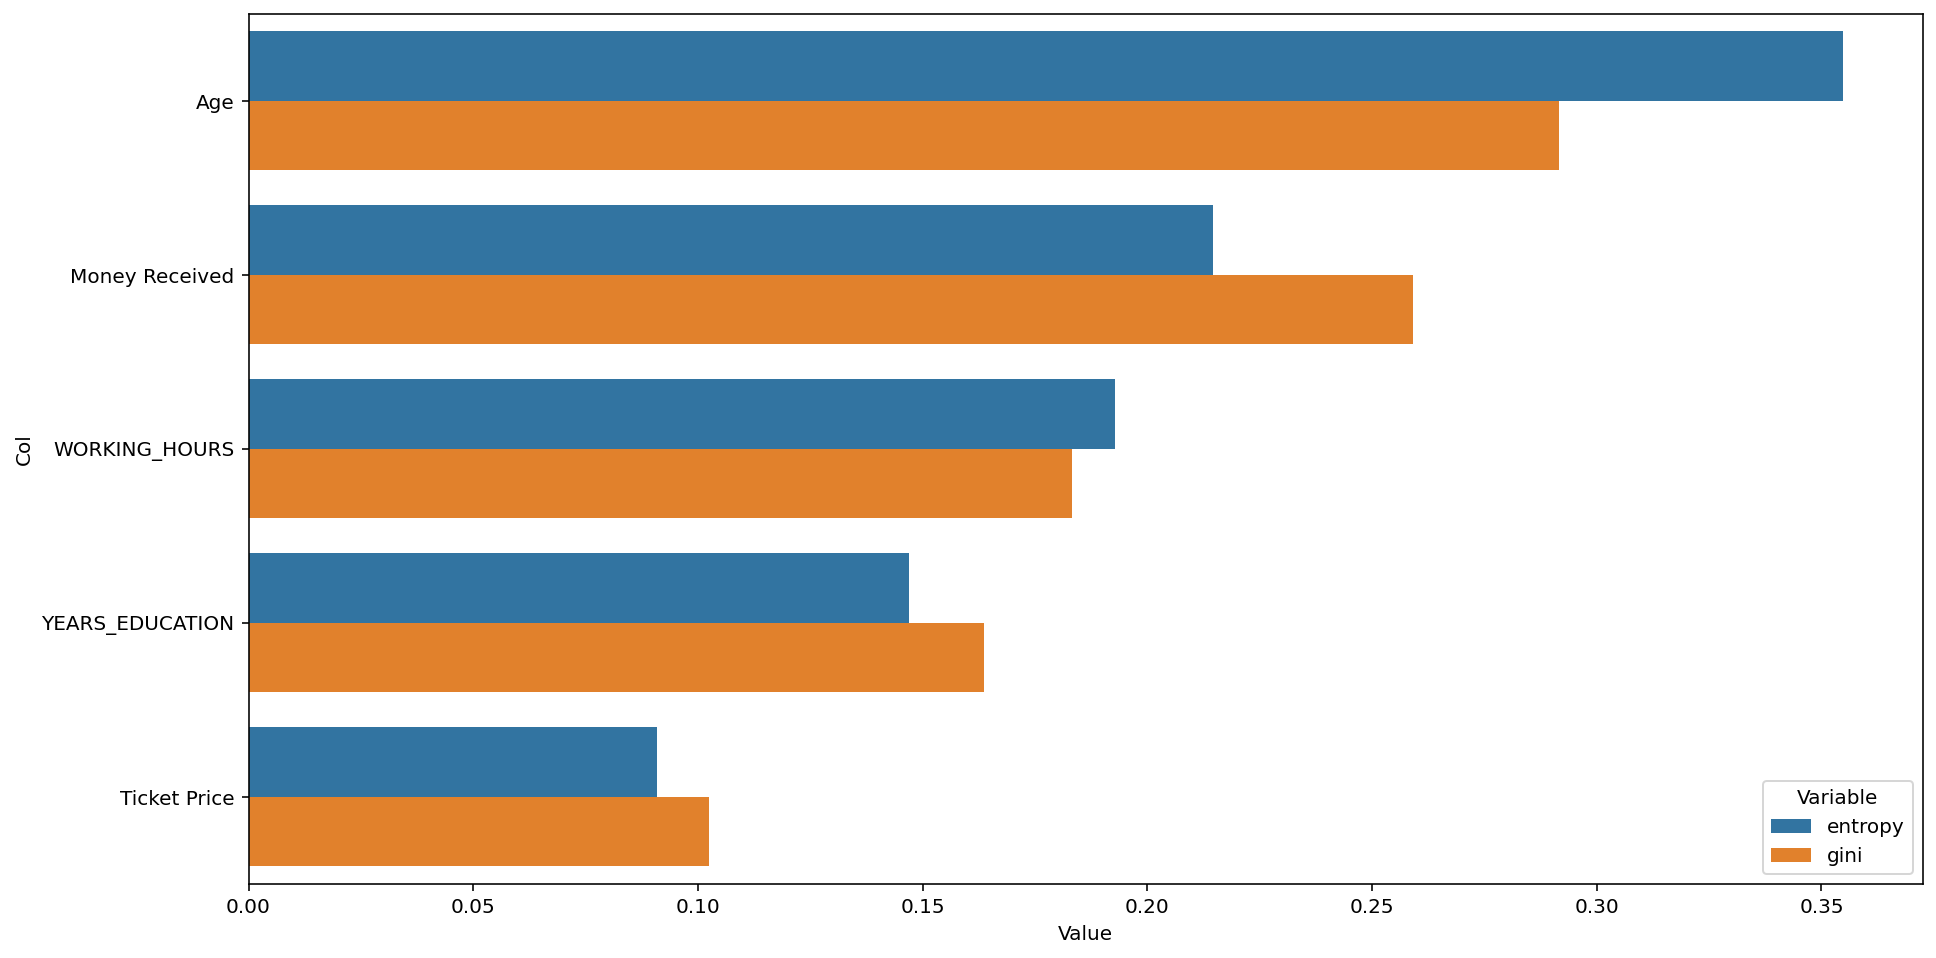

In [217]:
zippy = pd.DataFrame(zip(gini_importance, entropy_importance), columns = ['gini','entropy'])
zippy['col'] = X_train_Original.drop(columns=X_train_Original[binary_original]).columns
tidy = zippy.melt(id_vars='col').rename(columns=str.title)
tidy.sort_values(['Value'], ascending = False, inplace = True)

plt.figure(figsize=(15,8))
sns.barplot(y='Col', x='Value', hue='Variable', data=tidy)

#### Random Forest Classifier - gini and entropy - binary variables

In [218]:
gini_importanceRF = RandomForestClassifier().fit(X_train_Original[binary_original], y_train).feature_importances_
entropy_importanceRF = RandomForestClassifier(criterion='entropy').fit(X_train_Original[binary_original], y_train).feature_importances_

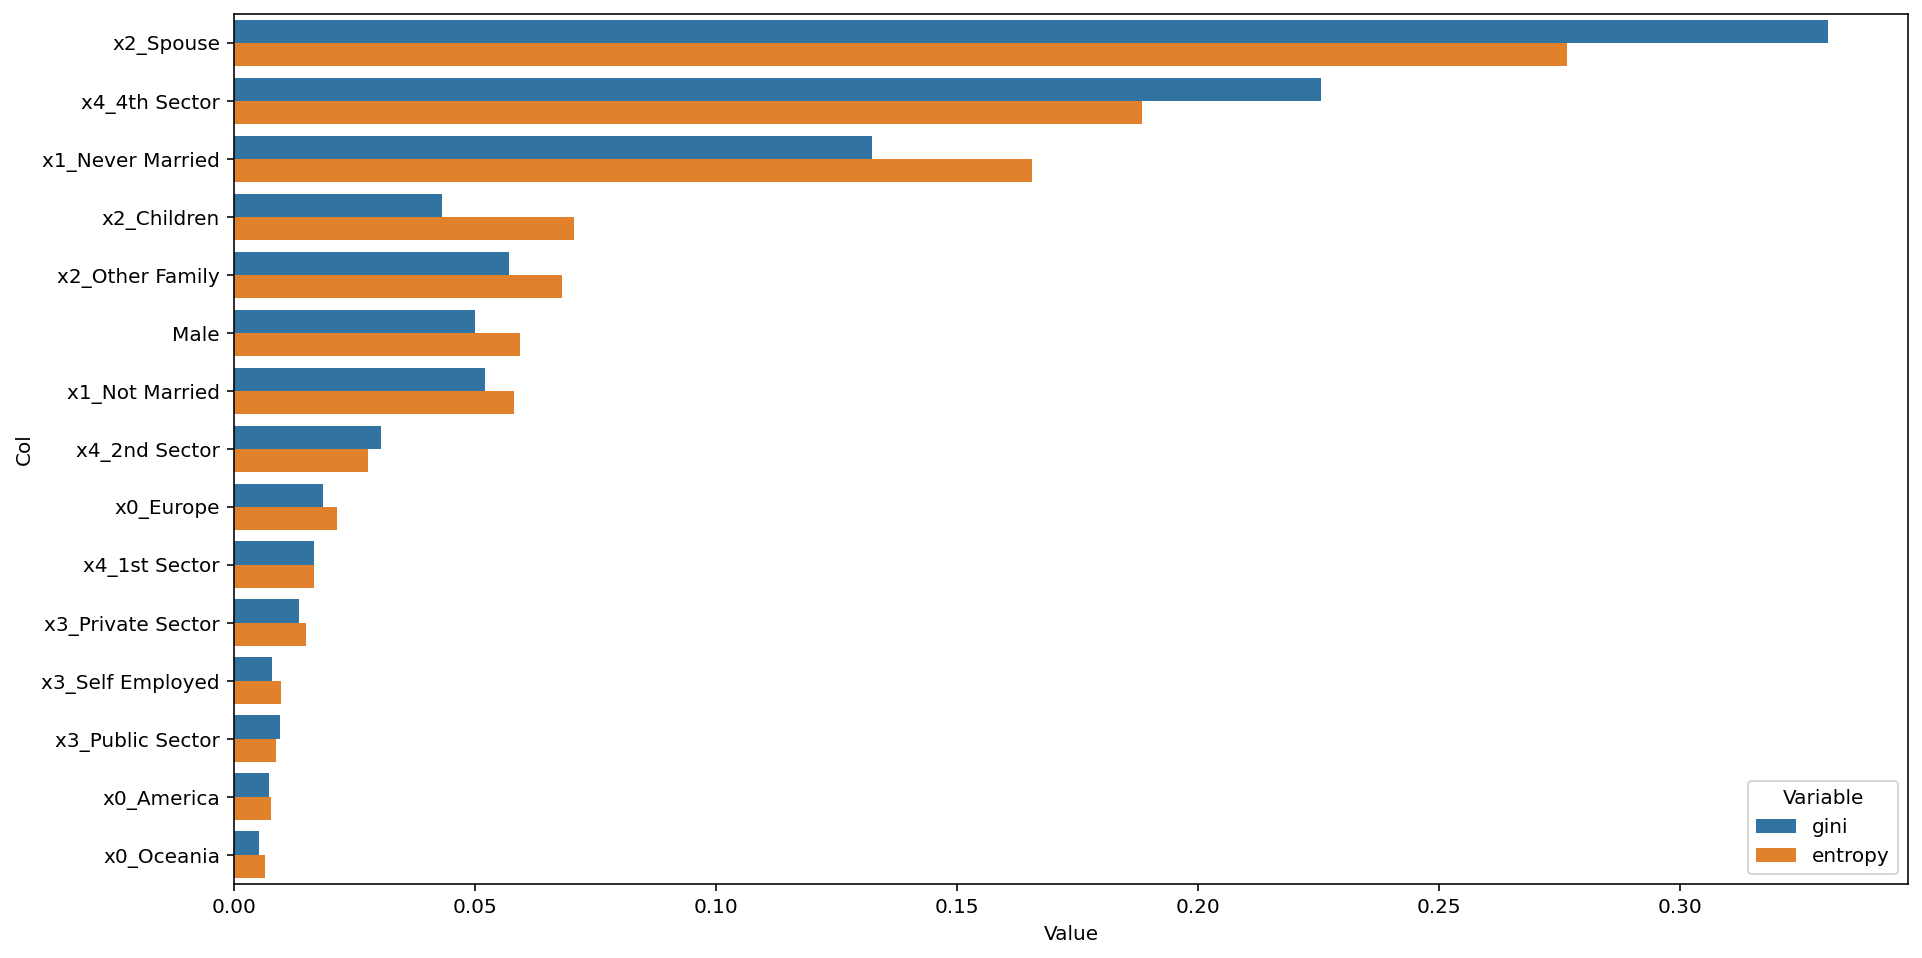

In [219]:
zippy = pd.DataFrame(zip(gini_importanceRF, entropy_importanceRF), columns = ['gini','entropy'])
zippy['col'] = X_train_Original[binary_original].columns
tidy = zippy.melt(id_vars='col').rename(columns=str.title)
tidy.sort_values(['Value'], ascending = False, inplace = True)

plt.figure(figsize=(15,8))
sns.barplot(y='Col', x='Value', hue='Variable', data=tidy)

#### Random Forest Classifier - gini and entropy - numerical variables

In [220]:
gini_importanceRF = RandomForestClassifier().fit(X_train_Original.drop(columns=X_train_Original[binary_original]), y_train).feature_importances_
entropy_importanceRF = RandomForestClassifier(criterion='entropy').fit(X_train_Original.drop(columns=X_train_Original[binary_original]), y_train).feature_importances_

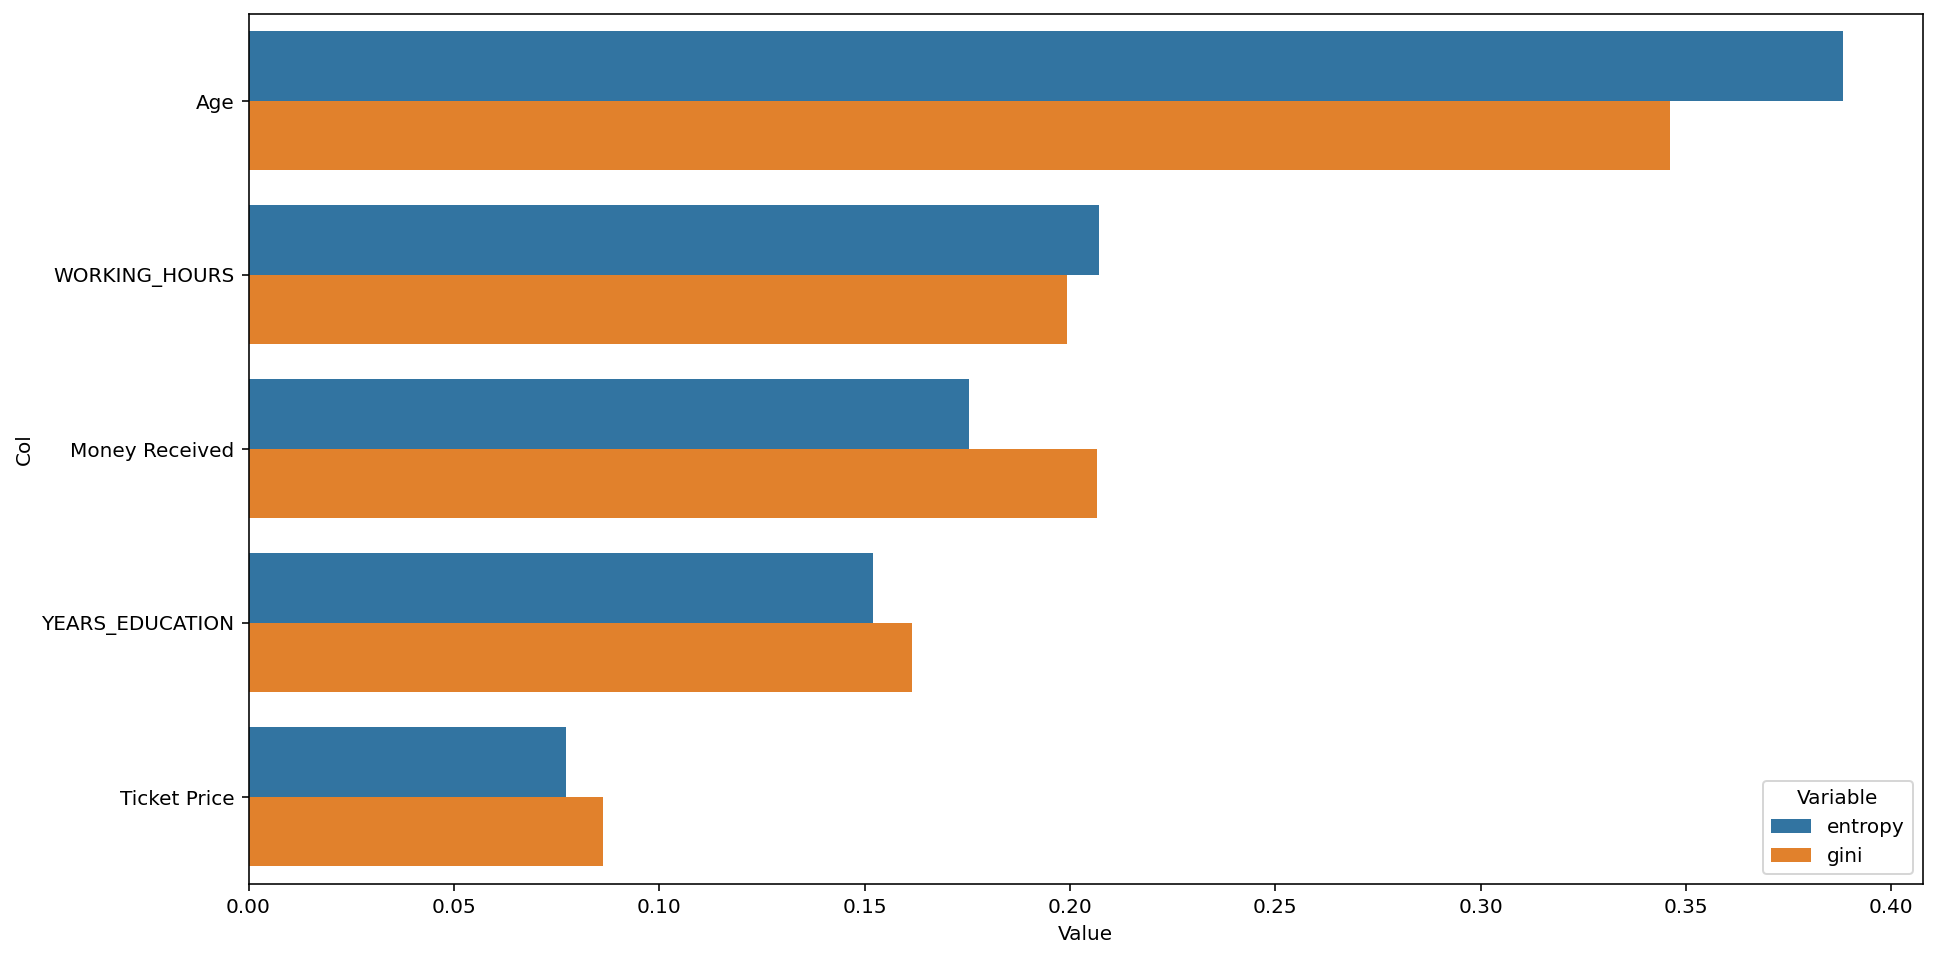

In [221]:
zippy = pd.DataFrame(zip(gini_importanceRF, entropy_importanceRF), columns = ['gini','entropy'])
zippy['col'] = X_train_Original.drop(columns=X_train_Original[binary_original]).columns
tidy = zippy.melt(id_vars='col').rename(columns=str.title)
tidy.sort_values(['Value'], ascending = False, inplace = True)

plt.figure(figsize=(15,8))
sns.barplot(y='Col', x='Value', hue='Variable', data=tidy)

### **Embbeded Methods**


#### Lasso - numerical variables

In [222]:
#Feature selction trough Lasso
Lasso_Best_Alpha = LassoCV(cv = 10, random_state = 2)
Lasso_Best_Alpha = Lasso_Best_Alpha.fit(X_train_Original.drop(columns=X_train_Original[binary_original]), y_train)

In [223]:
Lasso_Best_Alpha.alpha_

1.7944099907951893e-05

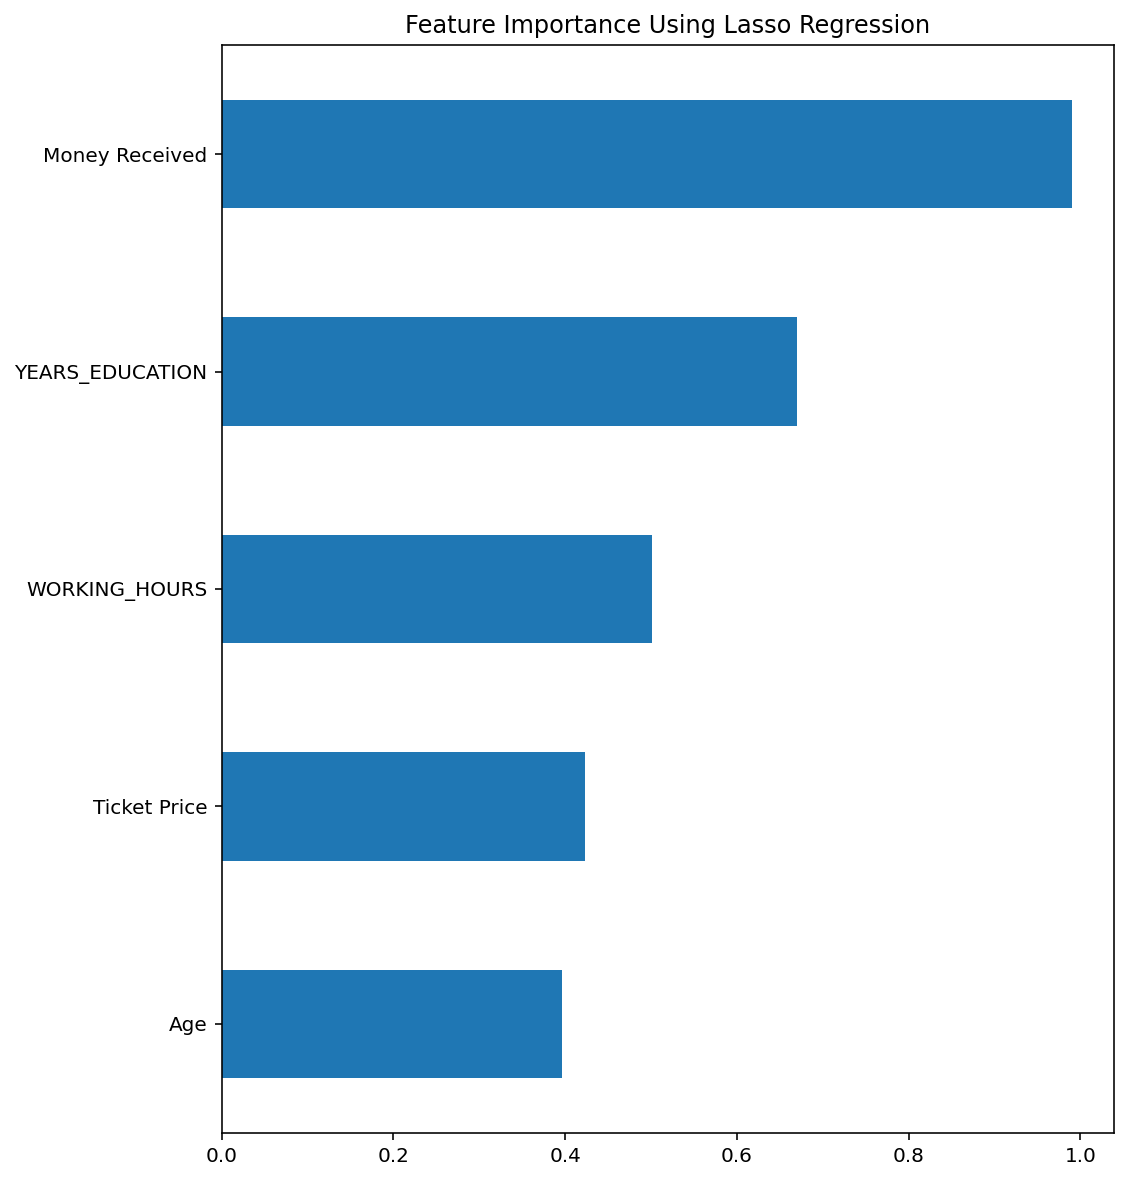

In [224]:
Lasso_Reg = Lasso(alpha = Lasso_Best_Alpha.alpha_, random_state = 2)
Lasso_Reg.fit(X_train_Original.drop(columns=X_train_Original[binary_original]), y_train)
coef_Lasso = pd.Series(Lasso_Reg.coef_, index = X_train_Original.drop(columns=X_train_Original[binary_original]).columns)
coef_Lasso.sort_values()
plot_importance(coef_Lasso, 'Lasso')

#### Lasso - binary variables

In [225]:
#Feature selction trough Lasso
Lasso_Best_Alpha = LassoCV(cv = 10, random_state = 2)
Lasso_Best_Alpha = Lasso_Best_Alpha.fit(X_train_Original[binary_original], y_train)

In [226]:
Lasso_Best_Alpha.alpha_

9.121661892968917e-05

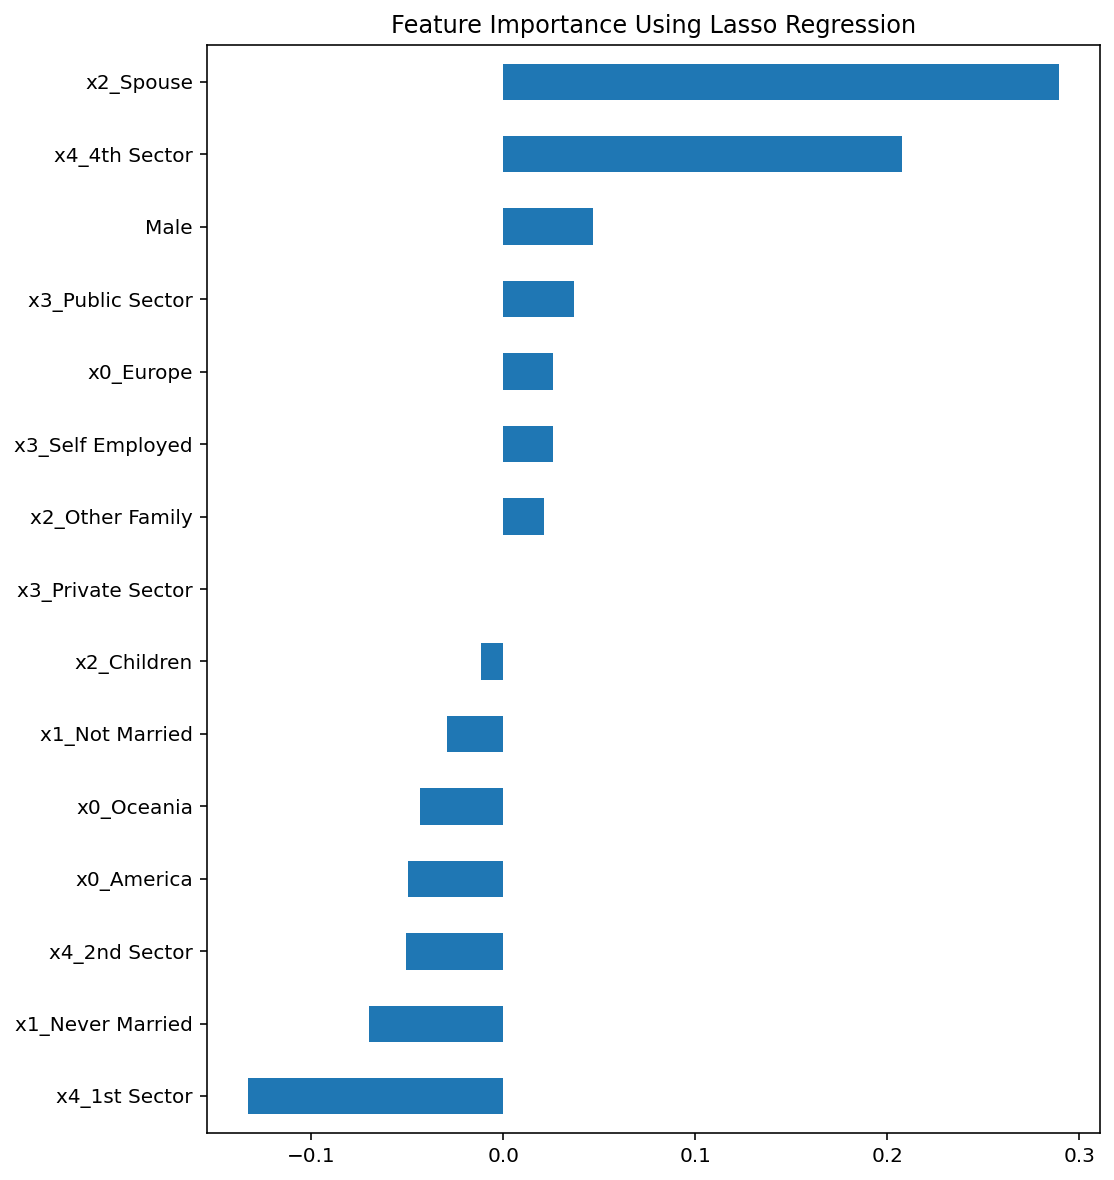

In [227]:
Lasso_Reg = Lasso(alpha = Lasso_Best_Alpha.alpha_, random_state = 2)
Lasso_Reg.fit(X_train_Original[binary_original], y_train)
coef_Lasso = pd.Series(Lasso_Reg.coef_, index = X_train_Original[binary_original].columns)
coef_Lasso.sort_values()
plot_importance(coef_Lasso, 'Lasso')

#### Ridge - numerical variables

Best alpha for Ridge: 0.1


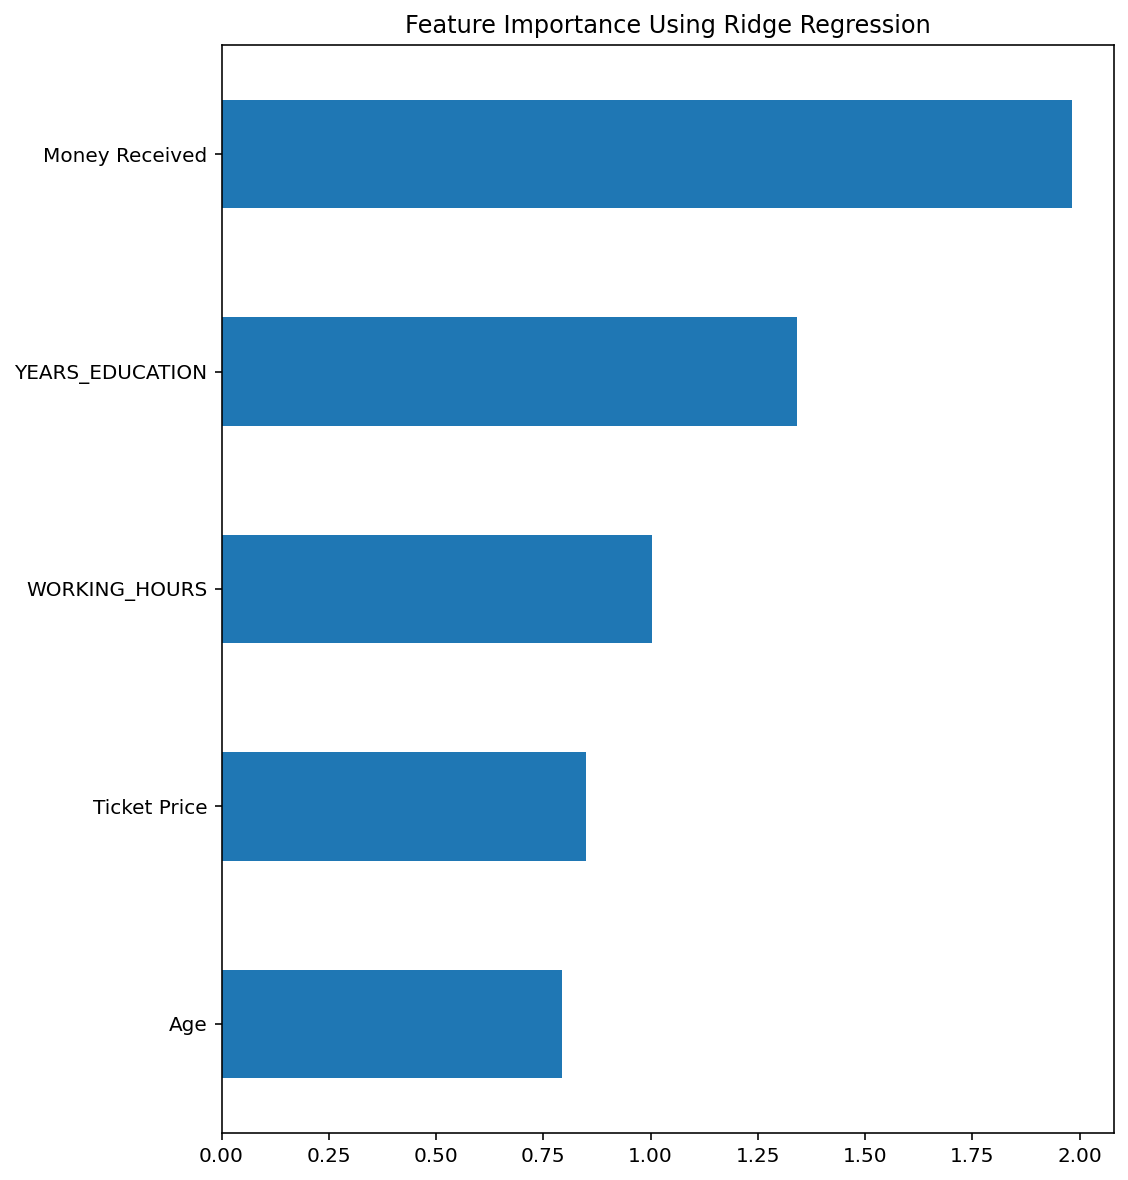

In [228]:
ridge_alphas = np.linspace(0.1,100, num= 100)
Ridge_Best_Alpha = RidgeClassifierCV(alphas = ridge_alphas, cv = 10)
Ridge_Best_Alpha = Ridge_Best_Alpha.fit(X_train_Original.drop(columns=X_train_Original[binary_original]), y_train)

print('Best alpha for Ridge:', Ridge_Best_Alpha.alpha_)
Ridge = RidgeClassifier(alpha = Ridge_Best_Alpha.alpha_, random_state = 2)
Ridge = Ridge.fit(X_train_Original.drop(columns=X_train_Original[binary_original]), y_train)

coef_Ridge = pd.Series(Ridge.coef_[0], index = X_train_Original.drop(columns=X_train_Original[binary_original]).columns)
coef_Ridge.sort_values()
plot_importance(coef_Ridge, 'Ridge')

#### Ridge - binary variables

Best alpha for Ridge: 14.227272727272727


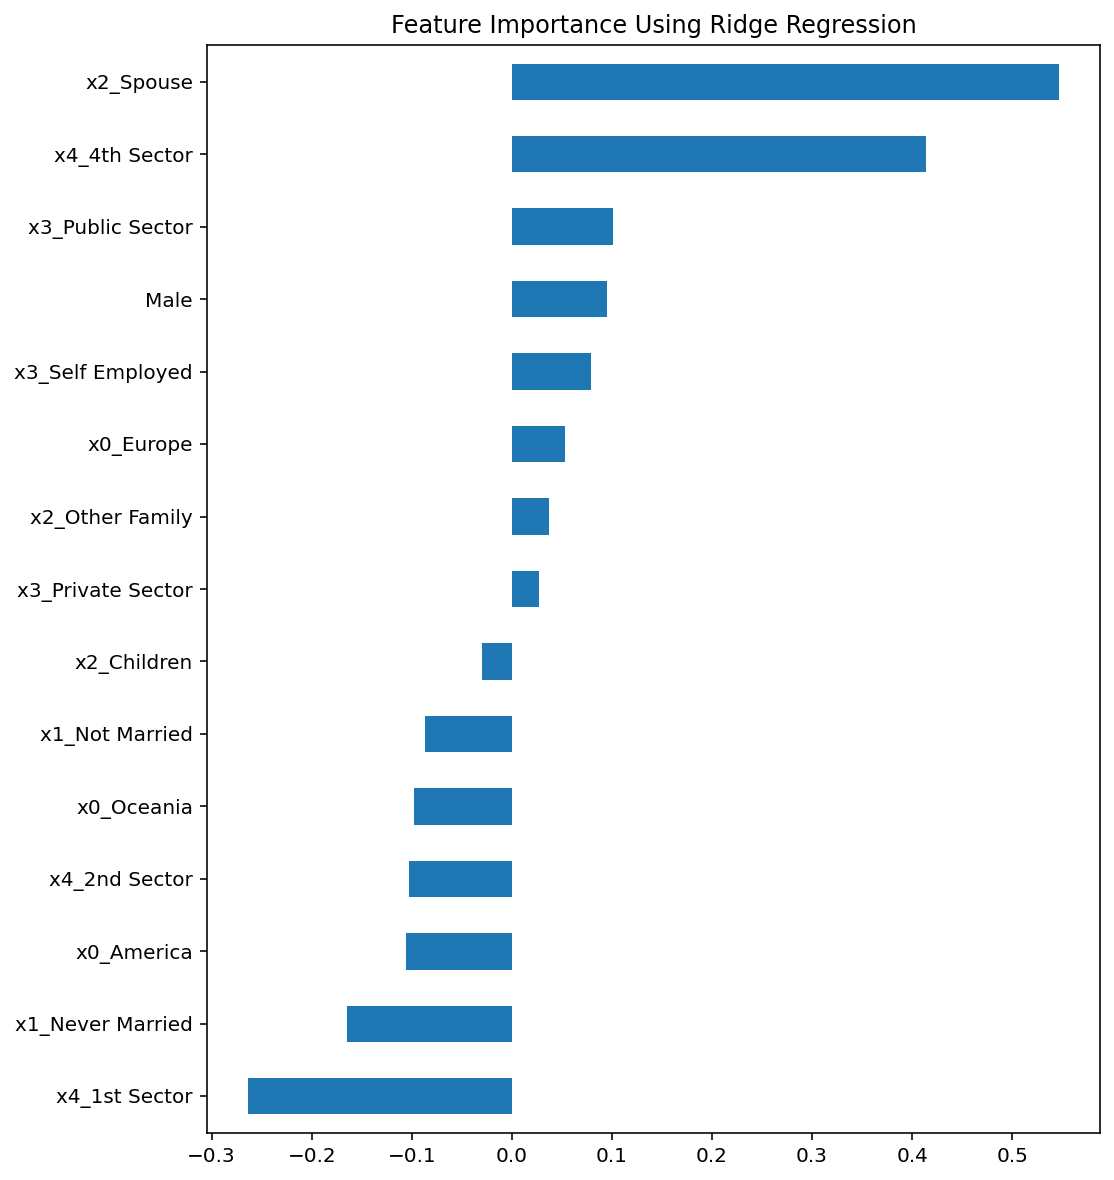

In [229]:
ridge_alphas = np.linspace(0.1,100, num= 100)
Ridge_Best_Alpha = RidgeClassifierCV(alphas = ridge_alphas, cv = 10)
Ridge_Best_Alpha = Ridge_Best_Alpha.fit(X_train_Original[binary_original], y_train)

print('Best alpha for Ridge:', Ridge_Best_Alpha.alpha_)
Ridge = RidgeClassifier(alpha = Ridge_Best_Alpha.alpha_, random_state = 2)
Ridge = Ridge.fit(X_train_Original[binary_original], y_train)

coef_Ridge = pd.Series(Ridge.coef_[0], index = X_train_Original[binary_original].columns)
coef_Ridge.sort_values()
plot_importance(coef_Ridge, 'Ridge')

#### Elastic Net - numerical variables

In [230]:
ElasticNet_Best_L1_Alpha = ElasticNetCV(l1_ratio = [.1, .5, .7, .9, .95, .99, 1], cv = 10, random_state = 2) 
ElasticNet_Best_L1_Alpha = ElasticNet_Best_L1_Alpha.fit(X_train_Original, y_train)

In [231]:
print(ElasticNet_Best_L1_Alpha.l1_ratio_) #Best l1
print(ElasticNet_Best_L1_Alpha.alpha_)#Best alpha

1.0
9.121661892968917e-05


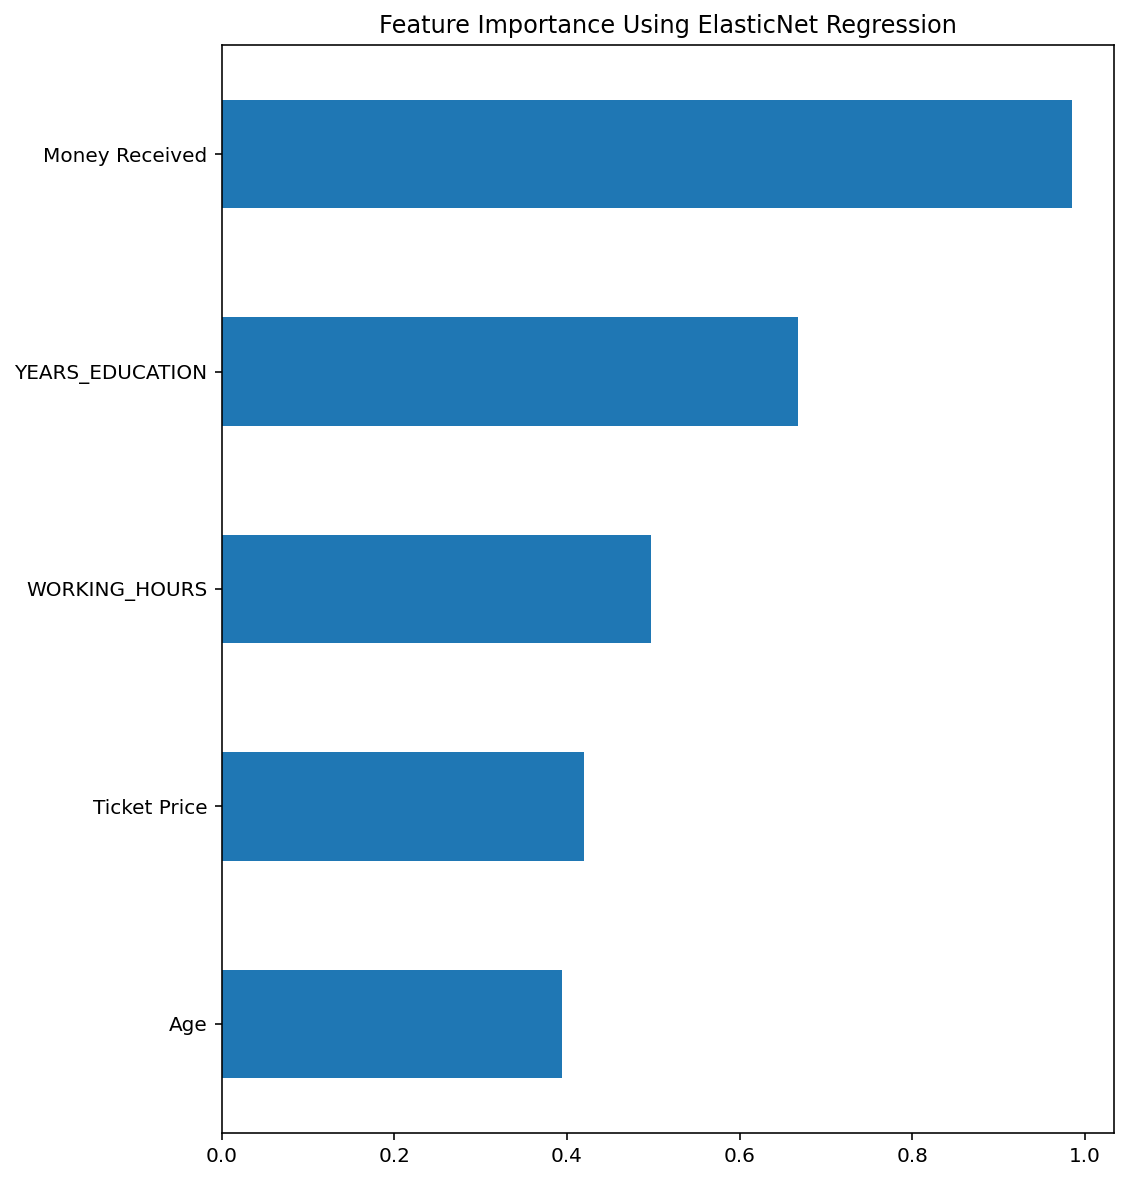

In [232]:
ElasticNet_Reg = ElasticNet(l1_ratio = ElasticNet_Best_L1_Alpha.l1_ratio_, alpha = ElasticNet_Best_L1_Alpha.alpha_, random_state = 2)
ElasticNet_Reg.fit(X_train_Original.drop(columns=X_train_Original[binary_original]), y_train)
coef_ElasticNet = pd.Series(ElasticNet_Reg.coef_, index = X_train_Original.drop(columns=X_train_Original[binary_original]).columns)
coef_ElasticNet.sort_values()
plot_importance(coef_ElasticNet, 'ElasticNet')

#### Elastic Net - binary variables

In [233]:
ElasticNet_Best_L1_Alpha = ElasticNetCV(l1_ratio = [0.0001,.1, .5, .7, .9, .95, .99, 1], cv = 10, random_state = 2) 
ElasticNet_Best_L1_Alpha = ElasticNet_Best_L1_Alpha.fit(X_train_Original[binary_original], y_train)

In [234]:
print(ElasticNet_Best_L1_Alpha.l1_ratio_) #Best l1
print(ElasticNet_Best_L1_Alpha.alpha_)#Best alpha

0.1
0.0009121661892968918


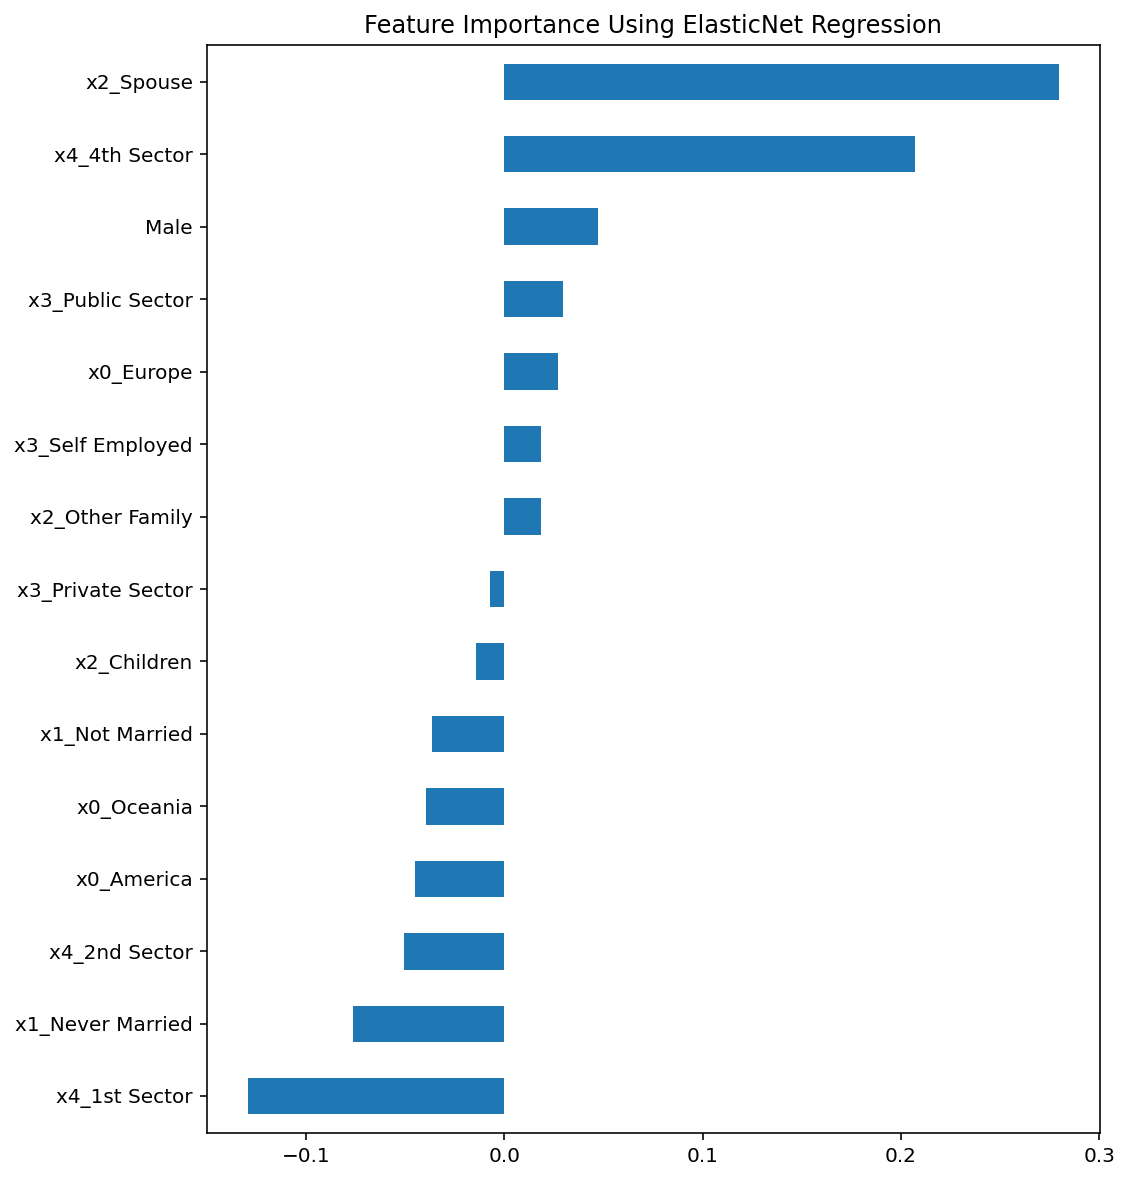

In [235]:
ElasticNet_Reg = ElasticNet(l1_ratio = ElasticNet_Best_L1_Alpha.l1_ratio_, alpha = ElasticNet_Best_L1_Alpha.alpha_, random_state = 2)
ElasticNet_Reg.fit(X_train_Original[binary_original], y_train)
coef_ElasticNet = pd.Series(ElasticNet_Reg.coef_, index = X_train_Original[binary_original].columns)
coef_ElasticNet.sort_values()
plot_importance(coef_ElasticNet, 'ElasticNet')

# **Artificial Resampling**

In [ ]:
X_train_AR = X_train.copy()

### Random Oversampling

https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/

In [ ]:
RO = RandomOverSampler(sampling_strategy='minority', random_state=15)
X_RO, y_RO = RO.fit_resample(X_train_AR, y_train)

In [ ]:
X_train_RO_Original = X_RO[X_train_Original.columns.to_list()]

X_train_RO_MTB = X_RO[X_train_MTB.columns.to_list()]

X_train_RO_MT = X_RO[X_train_MT.columns.to_list()]

### Synthetic Minority Oversampling Technique (SMOTE)

https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

In [ ]:
SMOTE = SMOTE(sampling_strategy='minority', random_state=15)
X_SMOTE, y_SMOTE = SMOTE.fit_resample(X_train_AR, y_train) #aqui da pa mudar o numero de neighbours? e sao quantos por default 5?

In [ ]:
X_train_SMOTE_Original = X_SMOTE[X_train_Original.columns.to_list()]
X_train_SMOTE_MTB = X_SMOTE[X_train_MTB.columns.to_list()]
X_train_SMOTE_MT = X_SMOTE[X_train_MT.columns.to_list()]

### Adaptive Synthetic Oversampling (ADASYN)

https://towardsdatascience.com/adasyn-adaptive-synthetic-sampling-method-for-imbalanced-data-602a3673ba16

In [ ]:
ADASYN = ADASYN(sampling_strategy='minority', random_state=15)
X_ADASYN, y_ADASYN = ADASYN.fit_resample(X_train_AR, y_train)

In [ ]:
X_train_ADASYN_Original = X_ADASYN[X_train_Original.columns.to_list()]
X_train_ADASYN_MTB = X_ADASYN[X_train_MTB.columns.to_list()]
X_train_ADASYN_MT = X_ADASYN[X_train_MT.columns.to_list()]

### Cluster-Based Undersampling (K-Means)

In [ ]:
CBU = ClusterCentroids(sampling_strategy='majority', random_state=15)
X_CBU, y_CBU = CBU.fit_resample(X_train_AR, y_train)

In [ ]:
X_train_CBU_Original = X_CBU[X_train_Original.columns.to_list()]
X_train_CBU_MTB = X_CBU[X_train_MTB.columns.to_list()]
X_train_CBU_MT = X_CBU[X_train_MT.columns.to_list()]

# **Simpler Models**

## **Some Extra Variable Combinations**

In [ ]:
X_train_FirstTry = X_train_Original.drop(columns = ['x0_Oceania', 'x0_America', 'x1_Not Married', 'x3_Private Sector', 'x4_2nd Sector'])

X_train_MTB_FirstTry = X_train_MTB.drop(columns = ['x0_Oceania', 'x0_America', 'x1_Not Married', 'x3_Private Sector', 'x4_2nd Sector'])

X_train_SecondTry = X_train_Original[['Money Received', 'YEARS_EDUCATION', 'Ticket Price', 'WORKING_HOURS', 'Age', 'x4_4th Sector', 'x2_Spouse', 'x4_1st Sector', 'x2_Children', 'x2_Other Family', 'Male', 'x3_Private Sector']]

X_train_MT_SecondTry = X_train_MT[['Money_Ticket_Binary', 'YEARS_EDUCATION', 'WORKING_HOURS', 'Age', 'x4_4th Sector', 'x2_Spouse', 'x4_1st Sector', 'x2_Children', 'x2_Other Family', 'Male', 'x3_Private Sector']]

X_train_ThirdTry = X_train_Original[['Money Received', 'YEARS_EDUCATION', 'Ticket Price', 'WORKING_HOURS', 'x4_4th Sector', 'x2_Spouse']]

X_train_V2_SecondTry = X_train_Original

In [ ]:
X_val_FirstTry = X_val_Original[X_train_FirstTry.columns.to_list()]

X_val_MTB_FirstTry = X_val_MTB[X_train_MTB_FirstTry.columns.to_list()]

X_val_SecondTry = X_val_Original[X_train_SecondTry.columns.to_list()]

X_val_MT_SecondTry = X_val_MT[X_train_MT_SecondTry.columns.to_list()]

X_val_ThirdTry = X_val_Original[X_train_ThirdTry.columns.to_list()]

X_val_V2_SecondTry = X_val_Original[X_train_V2_SecondTry.columns.to_list()]

## Logistic Regression

Let's start by making a **Logistic Regression** on the original variables, meaning, not the binary variables that we created that eventually may bring more value to our model.

- The average of f1_score we will use along the report will be "micro", as this is also the one that will be used in the evaluation, however it is also possible to see in the metrics "matrix", the macro avg and weighted avg.

  __`X_train_Original`__ :
    - Train: 0.8471968312004875
    - Validation: 0.8555758683729433

- Using the second dataset (X_train_MTB), that contains the binary variables of the money-related variables, we achieve the following results:

  __`X_train_MTB`__:
  - Train:  0.8381322364411944
  - Validation: 0.848491773308958

- We then proceeded to use the models that contained the exclusively the variable Money_Ticket_Binary (X_train_MT), achieving the following results:
  
  __`X_train_MT`__:
  - Train:  0.8379798903107861
  - Validation: 0.8478062157221207

- On the last step, we ran the again the model with exclusively the variable MONEY_TICKET (X_train_MT2). We achieved the following results:
  
  __`X_train_MT2`__:
  - Train:  0.841560024375381
  - Validation: 0.8478062157221207

We come to the conclusion that it is indeed better to use the original dataset in a logistic regression. It is also clear with the confusing matrix that the number of False Negatives is relatively high, so we're not being able to predict 0s that are actually 1s! 

Let's try to make some Artificial Resampling to hinder the problem with the FN!

__`Random Oversample`__:
- Train: 0.8098917322834646
- Validation: 0.7984460694698354


__`ADSYN `__:
- Train: 0.7713475318471338
- Validation: 0.7632541133455211

__`ClusterBased Undersampling `__:
- Train: 0.8254716981132075
- Validation: 0.7618829981718465

__`SMOTE`__:
- Train: 0.8062499999999999
- Validation: 0.7993601462522852

Although the scores are a little worse, we **don't see a situation of overfitting** as clearly as when we use datasets not resampled, and the prediction of 1s is done more accurately, with the downside that the prediction of FP got worse. 

We will keep in mind this analysis if perhaps we use any kind of Ensembling Method on a more advanced step of this project.

In [ ]:
log_model = LogisticRegression(random_state=15)
log_model = log_model.fit(X_train_Original,y_train)

In [ ]:
metrics(y_train ,log_model.predict(X_train_Original) , y_val, log_model.predict(X_val_Original))

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.94      0.90     10160
           1       0.72      0.54      0.61      2968

    accuracy                           0.85     13128
   macro avg       0.80      0.74      0.76     13128
weighted avg       0.84      0.85      0.84     13128

[[9533  627]
 [1379 1589]]
F1-score, micro:  0.8471968312004875
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
---------------------------------------------------------------------

In [ ]:
print(f1_score(y_train, log_model.predict(X_train_Original), average = 'micro'))
print(f1_score(y_val, log_model.predict(X_val_Original), average = 'micro'))

0.8471968312004875
0.8555758683729433


In [ ]:
Dataset = X_train_Original[['Money Received','Age', 'WORKING_HOURS', 'YEARS_EDUCATION', 'Ticket Price',  'x2_Spouse', 'x1_Never Married', 'x4_4th Sector', 'x2_Children', 'x2_Other Family', 'x1_Not Married', 'Male', 'x3_Self Employed']]
DatasetVal = X_val_Original[['Money Received','Age', 'WORKING_HOURS', 'YEARS_EDUCATION', 'Ticket Price', 'x2_Spouse', 'x1_Never Married', 'x4_4th Sector', 'x2_Children', 'x2_Other Family', 'x1_Not Married', 'Male', 'x3_Self Employed']]

In [ ]:
#Este foi o melhor dataset p logistic Regression
Dataset2 = X_train_Original[['Money Received','Age', 'WORKING_HOURS', 'YEARS_EDUCATION', 'Ticket Price',  'x2_Spouse', 'x2_Children', 'x4_4th Sector', 'x0_Oceania', 'x4_1st Sector', 'x0_America', 'x1_Never Married',  'x2_Other Family', 'Male', 'x1_Not Married', 'x3_Public Sector', 'x0_Europe', 'x4_2nd Sector',  'x3_Self Employed']]
DatasetVal2 = X_val_Original[['Money Received','Age', 'WORKING_HOURS', 'YEARS_EDUCATION', 'Ticket Price',  'x2_Spouse', 'x2_Children', 'x4_4th Sector', 'x0_Oceania', 'x4_1st Sector', 'x0_America', 'x1_Never Married',  'x2_Other Family', 'Male', 'x1_Not Married', 'x3_Public Sector', 'x0_Europe', 'x4_2nd Sector',  'x3_Self Employed']]

In [ ]:
Dataset3 = X_train_Original[['Money Received','Age', 'WORKING_HOURS', 'YEARS_EDUCATION', 'Ticket Price',  'x2_Spouse', 'x4_4th Sector','Male','x3_Public Sector','x0_Europe','x3_Self Employed','x2_Other Family','x3_Private Sector','x2_Children','x1_Not Married','x0_Oceania','x0_America','x4_2nd Sector',  'x1_Never Married', 'x4_1st Sector']]
DatasetVal3 = X_val_Original[['Money Received','Age', 'WORKING_HOURS', 'YEARS_EDUCATION', 'Ticket Price',  'x2_Spouse', 'x4_4th Sector','Male','x3_Public Sector','x0_Europe','x3_Self Employed','x2_Other Family','x3_Private Sector','x2_Children','x1_Not Married','x0_Oceania','x0_America','x4_2nd Sector',  'x1_Never Married', 'x4_1st Sector']]

In [ ]:
log_model = LogisticRegression(random_state=15)
log_model = log_model.fit(Dataset2,y_train)

In [ ]:
metrics(y_train ,log_model.predict(Dataset2) , y_val, log_model.predict(DatasetVal2))

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.94      0.90     10160
           1       0.72      0.54      0.61      2968

    accuracy                           0.85     13128
   macro avg       0.80      0.74      0.76     13128
weighted avg       0.84      0.85      0.84     13128

[[9535  625]
 [1379 1589]]
F1-score, micro:  0.8473491773308958
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
---------------------------------------------------------------------

In [ ]:
print(f1_score(y_train, log_model.predict(Dataset2), average = 'micro'))
print(f1_score(y_val, log_model.predict(DatasetVal2), average = 'micro'))

0.8473491773308958
0.8555758683729433


## Gaussian Naive Bayes

In [ ]:
#On yet another simple predictive model, we will make exactly the same approach as the one we did on the Logistic Regression
#As so, we will then use the model that does not include the binary variables that we created that eventually may bring more value to our model: 
#Train:0.7576934795856185
#Validation:0.756398537477148

#Using the second dataset (X_train_MTB), that contains the binary variables of the money-related variables, we achieve the following results:
#Train: 0.7327848872638634
#Validation: 0.7365173674588666

#We then proceeded to use the models that contained the exclusively the variable Money_Ticket_Binary (X_train_MT), achieving the following results
#Train: 0.732480195003047
#Validation: 0.7337751371115172

#On the last step, we ran the again the model with exclusively the variable MONEY_TICKET (X_train_MT2). We achieved the following results:
#Train: 0.7495429616087751
#Validation: 0.7497714808043876

#What differs these models from the Logistic Regression ones is that the prediction of FP

#Let's try to make some Artificial Resampling to hinder the problem with the FN

#Random Oversampling
#Train:0.7847440944881889
#Validation:0.7392595978062158

#SMOTE
#Train:0.7842027559055118
#Validation:0.7360603290676416

#ADASYN
#Train:0.7467157643312103
#Validation:0.7127513711151737

#ClusterBased Undersampling
#Train:0.8054245283018868
#Validation:0.7312614259597807

modelNB = GaussianNB()
modelNB.fit(X = X_train_Original, y = y_train)

GaussianNB()

In [ ]:
metrics(y_train ,modelNB.predict(X_train_Original) , y_val,modelNB.predict(X_val_Original))

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.73      0.82     10160
           1       0.48      0.85      0.61      2968

    accuracy                           0.76     13128
   macro avg       0.71      0.79      0.72     13128
weighted avg       0.84      0.76      0.78     13128

[[7438 2722]
 [ 459 2509]]
F1-score, micro:  0.7576934795856185
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
---------------------------------------------------------------------

In [ ]:
print(f1_score(y_train, modelNB.predict(X_train_Original), average = 'micro'))
print(f1_score(y_val, modelNB.predict(X_val_Original), average = 'micro'))

0.7576934795856185
0.756398537477148


In [ ]:
Dataset = X_train_Original[['Money Received','Age', 'WORKING_HOURS', 'YEARS_EDUCATION', 'Ticket Price',  'x2_Spouse', 'x1_Never Married', 'x4_4th Sector', 'x2_Children', 'x2_Other Family', 'x1_Not Married', 'Male', 'x3_Self Employed']]
DatasetVal = X_val_Original[['Money Received','Age', 'WORKING_HOURS', 'YEARS_EDUCATION', 'Ticket Price', 'x2_Spouse', 'x1_Never Married', 'x4_4th Sector', 'x2_Children', 'x2_Other Family', 'x1_Not Married', 'Male', 'x3_Self Employed']]
#Train: 0.7672151127361364
#Validation: 0.771709323583181

In [ ]:
Dataset2 = X_train_Original[['Money Received','Age', 'WORKING_HOURS', 'YEARS_EDUCATION', 'Ticket Price',  'x2_Spouse', 'x2_Children', 'x4_4th Sector', 'x0_Oceania', 'x4_1st Sector', 'x0_America', 'x1_Never Married',  'x2_Other Family', 'Male', 'x1_Not Married', 'x3_Public Sector', 'x0_Europe', 'x4_2nd Sector']]
DatasetVal2 = X_val_Original[['Money Received','Age', 'WORKING_HOURS', 'YEARS_EDUCATION', 'Ticket Price',  'x2_Spouse', 'x2_Children', 'x4_4th Sector', 'x0_Oceania', 'x4_1st Sector', 'x0_America', 'x1_Never Married',  'x2_Other Family', 'Male', 'x1_Not Married', 'x3_Public Sector', 'x0_Europe', 'x4_2nd Sector']]
#Train: 0.7493144424131627
#Validation: 0.7515996343692869

In [ ]:
#Melhor dataset p naive bayes
Dataset3 = X_train_Original[['Money Received','Age', 'WORKING_HOURS', 'YEARS_EDUCATION', 'Ticket Price',  'x2_Spouse', 'x4_4th Sector','Male','x3_Public Sector','x0_Europe','x3_Self Employed','x2_Other Family','x3_Private Sector','x2_Children','x1_Not Married','x0_Oceania','x0_America','x4_2nd Sector']]
DatasetVal3 = X_val_Original[['Money Received','Age', 'WORKING_HOURS', 'YEARS_EDUCATION', 'Ticket Price',  'x2_Spouse', 'x4_4th Sector','Male','x3_Public Sector','x0_Europe','x3_Self Employed','x2_Other Family','x3_Private Sector','x2_Children','x1_Not Married','x0_Oceania','x0_America','x4_2nd Sector']]
#Train: 0.7803168799512493
#Validation: 0.7810786106032906

In [ ]:
modelNB = GaussianNB()
modelNB.fit(X = Dataset3 , y = y_train)

GaussianNB()

In [ ]:
print(f1_score(y_train, modelNB.predict(Dataset3), average = 'micro'))
print(f1_score(y_val, modelNB.predict(DatasetVal3), average = 'micro'))

0.7803168799512493
0.7810786106032906


## Decision Trees

In [ ]:
#On yet another simple predictive model, we will make exactly the same approach as the one we did on the Logistic Regression
#As so, we will then use the model that does not include the binary variables that we created that eventually may bring more value to our model: 
#Train:0.7576934795856185
#Validation:0.756398537477148

#Using the second dataset (X_train_MTB), that contains the binary variables of the money-related variables, we achieve the following results:
#Train: 0.7327848872638634
#Validation: 0.7365173674588666

#We then proceeded to use the models that contained the exclusively the variable Money_Ticket_Binary (X_train_MT), achieving the following results
#Train: 0.732480195003047
#Validation: 0.7337751371115172

#On the last step, we ran the again the model with exclusively the variable MONEY_TICKET (X_train_MT2). We achieved the following results:
#Train: 0.7495429616087751
#Validation: 0.7497714808043876

#What differs these models from the Logistic Regression ones is that the prediction of FP

#Let's try to make some Artificial Resampling to hinder the problem with the FN

#Random Oversampling
#Train:0.7847440944881889
#Validation:0.7392595978062158

#SMOTE
#Train:0.7842027559055118
#Validation:0.7360603290676416

#ADASYN
#Train:0.7467157643312103
#Validation:0.7127513711151737

#ClusterBased Undersampling
#Train:0.8054245283018868
#Validation:0.7312614259597807

In [ ]:
# model = DecisionTreeClassifier()

# #We will use adam because (...)

# #Parametros so para adam
# parameter_space_MLP_adam_DT = {
#     'criterion': ['gini', 'entropy'],
#     'splitter': ['best', 'random'],
#     'max_depth': [int(x) for x in np.round(np.linspace(1,50,50))],
#     'min_samples_split':[int(x) for x in np.round(np.linspace(2,50,50))],
#     'min_samples_leaf':[int(x) for x in np.round(np.linspace(1,20,2))],
#     'min_weight_fraction_leaf':[0.01,0.05,0.1,0.15,0.2],
#     'random_state':[15]
# }

# MLP_GS_adam_DT = GridSearchCV(model, parameter_space_MLP_adam_DT, scoring='f1_micro', n_jobs = -1, cv=10)

In [ ]:
# MLP_GS_adam_DT.fit(X_train_Original, y_train)

In [ ]:
# MLP_GS_adam_DT.best_params_

In [ ]:
# X_train_tree=X_train_CBU_Original.drop(columns=['Male', 'x0_America',  'x0_Europe','x0_Oceania',  'x1_Not Married', 'x3_Private Sector','x3_Public Sector', 'x4_1st Sector', 'x4_2nd Sector'])
# X_val_Original_tree=X_val_Original.drop(columns=[ 'Male', 'x0_America', 'x0_Europe','x0_Oceania',  'x1_Not Married', 'x3_Private Sector','x3_Public Sector', 'x4_1st Sector', 'x4_2nd Sector'])
# X_test_tree=X_test_Original.drop(columns=['Northbury', 'Male', 'x0_America', 'x0_Asia', 'x0_Europe', 'x0_Oceania',  'x1_Not Married',  'x3_Not Working', 'x3_Private Sector','x3_Public Sector', 'x4_1st Sector', 'x4_2nd Sector'])

In [ ]:
dt_gini = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=8, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.01, random_state=15)
dt_gini.fit(X_train_Original, y_train)

DecisionTreeClassifier(max_depth=8, min_weight_fraction_leaf=0.01,
                       random_state=15)

In [ ]:
print('The defined three has a depth of ' + str(dt_gini.get_depth()) + ', ' + str(dt_gini.tree_.node_count) + 
      ' nodes and a total of ' + str(dt_gini.get_n_leaves()) + ' leaves.')

The defined three has a depth of 8, 89 nodes and a total of 45 leaves.


In [ ]:
df = pd.DataFrame(columns = ['Time','Train','Test'], index = ['Gini'])
show_results(df,dt_gini)

,Time,Train,Test
Gini,0.055+/-0.0,0.851+/-0.0,0.85+/-0.01


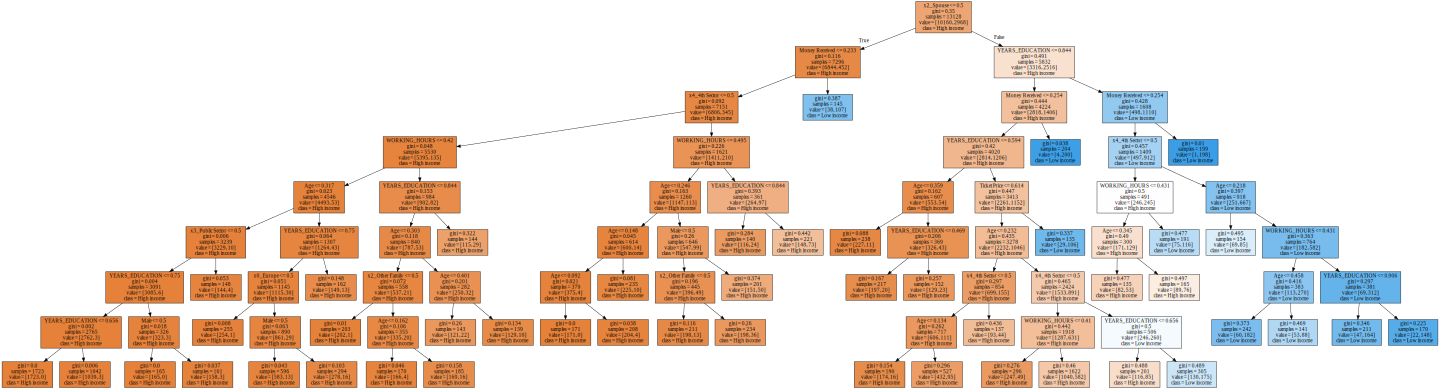

In [ ]:
plot_tree(dt_gini.fit(X_train_Original, y_train))

## K Nearest Neighbors

We will make a **K Nearest Neighbors Model**.

- The average of f1_score we will use along the report will be "micro", as this is also the one that will be used in the evaluation, however it is also possible to see in the metrics "matrix", the macro avg and weighted avg.

  __`Random Oversampling`__ :
    - X_train_RO_Original:
    - Best Parameters: 
      - algorithm='auto'
      - metric='cosine'
      - n_neighbors=11
      - weights='distance'
    - Train: 0.9688484251968504
    - Validation: 0.7845063985374771<br>
<br>
    - X_train_RO_MTB:
    - Best Parameters: 
      - algorithm='auto'
      - metric='cosine'
      - n_neighbors=11
      - weights='distance'
    - Train: 0.968257874015748
    - Validation: 0.7762797074954296 <br>
<br>
    - X_train_RO_MT:
    - Best Parameters: 
      - algorithm='ball_tree'
      - metric='euclidean' 
      - n_neighbors=1
      - weights='uniform'
    - Train: 0.9465551181102362
    - Validation: 0.7945612431444241 <br>
<br>

  __`Synthetic Minority Oversampling Technique (SMOTE)`__ :
    - X_train_SMOTE_Original:
    - Best Parameters: 
      - algorithm='brute'
      - metric='manhattan'
      - n_neighbors=4
      - weights='distance'
    - Train: 0.9739665354330709
    - Validation: 0.8048446069469836<br>
<br>
    - X_train_SMOTE_MTB:
    - Best Parameters: 
      - algorithm='brute'
      - metric='manhattan'
      - n_neighbors=4
      - weights='distance'
    - Train: 0.9726870078740157
    - Validation: 0.7973034734917733<br>
<br>
    - X_train_SMOTE_MT:
    - Best Parameters: 
      - algorithm='brute'
      - metric='manhattan'
      - n_neighbors=4
      - weights='distance'
    - Train: 0.9719488188976378
    - Validation: 0.7973034734917733<br>
<br>

  __`Adaptive Synthetic Oversampling (ADASYN)`__ :
    - X_train_ADASYN_Original:
    - Best Parameters: 
      - algorithm='brute'
      - metric='manhattan'
      - n_neighbors=4
      - weights='distance'
    - Train: 0.9729299363057324
    - Validation: 0.8000457038391224<br>
<br>
    - X_train_ADASYN_MTB:
    - Best Parameters: 
      - algorithm='brute'
      - metric='manhattan'
      - n_neighbors=4
      - weights='distance'
    - Train: 0.9725816082802548
    - Validation: 0.7906764168190127<br>
<br>
    - X_train_ADASYN_MT:
    - Best Parameters: 
      - algorithm='brute'
      - metric='manhattan'
      - n_neighbors=4
      - weights='distance'
    - Train: 0.9715366242038217
    - Validation: 0.7927330895795247<br>
<br>

  __`Cluster-Based Undersampling (K-Means)`__ :
    - X_train_CBU_Original:
    - Best Parameters: 
      - algorithm='auto'
      - metric='manhattan'
      - n_neighbors=8
      - weights='uniform'
    - Train: 0.8423180592991913
    - Validation: 0.7497714808043876<br>
<br>
    - X_train_CBU_MTB:
    - Best Parameters: 
      - algorithm='auto'
      - metric='euclidean'
      - n_neighbors=12
      - weights='uniform'
    - Train: 0.8241239892183289
    - Validation: 0.7369744058500914<br>
<br>
    - X_train_CBU_MT:
    - Best Parameters: 
      - algorithm='auto'
      - metric='euclidean'
      - n_neighbors=12
      - weights='uniform'
    - Train: 0.8264824797843665
    - Validation: 0.7365173674588666<br>
<br>

  __`X_train_FirstTry`__ :
    - Best Parameters: 
      - algorithm='brute'
      - metric='manhattan'
      - n_neighbors=28
      - weights='uniform'
    - Train: 0.850091407678245
    - Validation: 0.8491773308957952<br>
<br>

  __`X_train_MTB_FirstTry`__ :
    - Best Parameters: 
      - algorithm='brute'
      - metric='manhattan'
      - n_neighbors=28
      - weights='uniform'
    - Train: 0.8468159658744668
    - Validation: 0.848491773308958<br>
<br>

  __`X_train_SecondTry`__ :
    - Best Parameters: 
      - algorithm='auto'
      - metric='cosine'
      - n_neighbors=16
      - weights='uniform'
    - Train: 0.8602224253503962
    - Validation: 0.8519195612431444<br>
<br>

  __`X_train_MT_SecondTry`__ :
    - Best Parameters: 
      - algorithm='auto'
      - metric='cosine'
      - n_neighbors=16
      - weights='uniform'
    - Train: 0.8535191956124314
    - Validation: 0.8491773308957952<br>
<br>

  __`X_train_ThirdTry`__ :
    - Best Parameters: 
      - algorithm='ball_tree'
      - metric='manhattan'
      - n_neighbors=28
      - weights='distance'
    - Train: 0.8774375380865326
    - Validation: 0.8512340036563071<br>
<br>

  __`X_train_V2_SecondTry`__ :
    - Best Parameters: 
      - algorithm='ball_tree'
      - metric='manhattan'
      - n_neighbors=16
      - weights='uniform'
    - Train: 0.8549664838513101
    - Validation: 0.8439213893967094<br>

We come to the conclusion that it is indeed better to use the X_train_FristTry dataset in a K Nearest Neighbors algorithm.

With artificial resampling the scores are worse, we  can clearly see a situation of overfitting.

We will keep in mind this analysis if perhaps we use any kind of Ensembling Method on a more advanced step of this project.

In [ ]:
k = 5
cv = StratifiedKFold(n_splits=k, shuffle=True, random_state=15)

In [ ]:
# k = 5
# cv = StratifiedKFold(n_splits=k, shuffle=True, random_state=15)

### X_train_FirstTry

In [ ]:
# knn_clf = KNeighborsClassifier()

# knn_parameters = {'n_neighbors' : np.arange(1,31,1),
#                    'metric' : ['euclidean', 'cosine', 'manhattan', 'minkowski'],
#                    'weights' : ['uniform', 'distance'],
#                    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

# knn_grid = GridSearchCV(estimator=knn_clf, param_grid=knn_parameters, cv=cv, scoring='f1_micro', verbose=1, n_jobs=-1)

# knn_grid.fit(X_train_FirstTry, y_train)

# knn_grid.best_params_

In [ ]:
knn = KNeighborsClassifier(algorithm='brute', metric='manhattan', n_neighbors=28, weights='uniform')
knn.fit(X_train_FirstTry, y_train)

KNeighborsClassifier(algorithm='brute', metric='manhattan', n_neighbors=28)

In [ ]:
labels_train_knn = knn.predict(X_train_FirstTry)
f1_score(y_train, labels_train_knn, average = 'micro')

0.850091407678245

In [ ]:
labels_val_knn = knn.predict(X_val_FirstTry)
f1_score(y_val, labels_val_knn, average = 'micro')

0.8491773308957952

We will make a **K Nearest Centroid**.

- The average of f1_score we will use along the report will be "micro", as this is also the one that will be used in the evaluation, however it is also possible to see in the metrics "matrix", the macro avg and weighted avg.

  __`Random Oversampling`__ :
    - X_train_RO_Original:
    - Best Parameters:
      - metric='euclidean'
    - Train: 0.7635826771653543
    - Validation: 0.7138939670932358<br>
<br>
    - X_train_RO_MTB:
    - Best Parameters:
      - metric='euclidean'
    - Train: 0.7636318897637795
    - Validation: 0.7143510054844607 <br>
<br>
    - X_train_RO_MT:
    - Best Parameters: 
      - metric='euclidean' 
    - Train: 0.7639271653543308
    - Validation: 0.7150365630712979 <br>
<br>

  __`Synthetic Minority Oversampling Technique (SMOTE)`__ :
    - X_train_SMOTE_Original:
    - Best Parameters: 
      - metric='euclidean'
    - Train: 0.761515748031496
    - Validation: 0.7143510054844607<br>
<br>
    - X_train_SMOTE_MTB:
    - Best Parameters: 
      - metric='euclidean'
    - Train: 0.7624507874015748
    - Validation: 0.7150365630712979<br>
<br>
    - X_train_SMOTE_MT:
    - Best Parameters: 
      - metric='euclidean'
    - Train: 0.763238188976378
    - Validation: 0.7154936014625227<br>
<br>

  __`Adaptive Synthetic Oversampling (ADASYN)`__ :
    - X_train_ADASYN_Original:
    - Best Parameters:
      - metric='euclidean'
    - Train: 0.7285031847133758
    - Validation: 0.7129798903107862<br>
<br>
    - X_train_ADASYN_MTB:
    - Best Parameters: 
      - metric='euclidean'
    - Train: 0.7283041401273885
    - Validation: 0.7125228519195612<br>
<br>
    - X_train_ADASYN_MT:
    - Best Parameters: 
      - metric='euclidean'
    - Train: 0.7277070063694269
    - Validation: 0.7120658135283363<br>
<br>

  __`Cluster-Based Undersampling (K-Means)`__ :
    - X_train_CBU_Original:
    - Best Parameters: 
      - metric='euclidean'
    - Train: 0.7815026954177897
    - Validation: 0.7154936014625227<br>
<br>
    - X_train_CBU_MTB:
    - Best Parameters: 
      - metric='euclidean'
    - Train: 0.7815026954177897
    - Validation: 0.7154936014625227<br>
<br>
    - X_train_CBU_MT:
    - Best Parameters: 
      - metric='euclidean'
    - Train: 0.7816711590296496
    - Validation: 0.7157221206581351<br>
<br>

  __`X_train_FirstTry`__ :
    - Best Parameters: 
      - metric='manhattan'
    - Train: 0.7446678854357099
    - Validation: 0.7561700182815356<br>
<br>

  __`X_train_MTB_FirstTry`__ :
    - Best Parameters: 
      - metric='manhattan'
    - Train: 0.7446678854357099
    - Validation: 0.7561700182815356<br>
<br>

  __`X_train_SecondTry`__ :
    - Best Parameters: 
      - metric='manhattan'
    - Train: 0.7446678854357099
    - Validation: 0.7561700182815356<br>
<br>

  __`X_train_MT_SecondTry`__ :
    - Best Parameters: 
      - metric='manhattan'
    - Train: 0.7446678854357099
    - Validation: 0.7561700182815356<br>
<br>

  __`X_train_ThirdTry`__ :
    - Best Parameters: 
      - metric='manhattan'
    - Train: 0.7333180987202925
    - Validation: 0.7461151736745887<br>
<br>

  __`X_train_V2_SecondTry`__ :
    - Best Parameters: 
      - metric='manhattan'
    - Train: 0.7446678854357099
    - Validation: 0.7561700182815356<br>

We come to the conclusion that it is indeed better to use again the X_train_FristTry dataset in a K Nearest Centroids algorithm.

With artificial resampling the scores are not so worse, but we  can see a bit of overfitting.

We will keep in mind this analysis if perhaps we use any kind of Ensembling Method on a more advanced step of this project.

In [ ]:
Dataset = X_train_Original[['Money Received','Age', 'WORKING_HOURS', 'YEARS_EDUCATION', 'Ticket Price',  'x2_Spouse', 'x1_Never Married', 'x4_4th Sector']]
DatasetVal = X_val_Original[['Money Received','Age', 'WORKING_HOURS', 'YEARS_EDUCATION', 'Ticket Price', 'x2_Spouse', 'x1_Never Married', 'x4_4th Sector']]
#Train: 0.8565661182205973
#Validation: 0.8494058500914077

In [ ]:
#Este foi o melhor dataset p KNN
Dataset2 = X_train_Original[['Money Received','Age', 'WORKING_HOURS', 'YEARS_EDUCATION', 'Ticket Price',  'x2_Spouse', 'x2_Children', 'x4_4th Sector']]
DatasetVal2 = X_val_Original[['Money Received','Age', 'WORKING_HOURS', 'YEARS_EDUCATION', 'Ticket Price',  'x2_Spouse', 'x2_Children', 'x4_4th Sector']]
# Train: 0.8572516758074344
# Validation: 0.8507769652650823

In [ ]:
Dataset3 = X_train_Original[['Money Received','Age', 'WORKING_HOURS', 'YEARS_EDUCATION', 'Ticket Price',  'x2_Spouse', 'x4_4th Sector','Male','x3_Public Sector','x0_Europe','x3_Self Employed','x2_Other Family','x3_Private Sector','x2_Children']]
DatasetVal3 = X_val_Original[['Money Received','Age', 'WORKING_HOURS', 'YEARS_EDUCATION', 'Ticket Price',  'x2_Spouse', 'x4_4th Sector','Male','x3_Public Sector','x0_Europe','x3_Self Employed','x2_Other Family','x3_Private Sector','x2_Children']]
#Train:0.8513863497867155
#Validation: 0.8475776965265083

In [ ]:
knn = KNeighborsClassifier(algorithm='brute', metric='manhattan', n_neighbors=28, weights='uniform')
knn.fit(Dataset3, y_train)

KNeighborsClassifier(algorithm='brute', metric='manhattan', n_neighbors=28)

In [ ]:
labels_train_knn = knn.predict(Dataset3)
f1_score(y_train, labels_train_knn, average = 'micro')

0.8513863497867155

In [ ]:
labels_val_knn = knn.predict(DatasetVal3)
f1_score(y_val, labels_val_knn, average = 'micro')

0.8475776965265083

## K Nearest Centroid

In [ ]:
k = 5
cv = StratifiedKFold(n_splits=k, shuffle=True, random_state=15)

In [ ]:
# knc_clf = NearestCentroid()

# knc_parameters = {'metric' : ['euclidean', 'cosine', 'manhattan']}

# knc_grid = GridSearchCV(estimator=knc_clf, param_grid=knc_parameters, cv=cv, scoring='f1_micro', verbose=1, n_jobs=-1)

# knc_grid.fit(X_train_FirstTry, y_train)

# knc_grid.best_params_

In [ ]:
knc = NearestCentroid(metric='manhattan')
knc.fit(X_train_FirstTry, y_train)

NearestCentroid(metric='manhattan')

In [ ]:
labels_train_nc = knc.predict(X_train_FirstTry)
f1_score(y_train, labels_train_nc, average = 'micro')

0.7446678854357099

In [ ]:
labels_val_nc = knc.predict(X_val_FirstTry)
f1_score(y_val, labels_val_nc, average = 'micro')

0.7561700182815356

In [ ]:
Dataset = X_train_Original[['Money Received','Age', 'WORKING_HOURS', 'YEARS_EDUCATION', 'Ticket Price',  'x2_Spouse', 'x1_Never Married', 'x4_4th Sector']]
DatasetVal = X_val_Original[['Money Received','Age', 'WORKING_HOURS', 'YEARS_EDUCATION', 'Ticket Price', 'x2_Spouse', 'x1_Never Married', 'x4_4th Sector']]
#Train: 0.7446678854357099
#Validation: 0.7561700182815356

In [ ]:
Dataset2 = X_train_Original[['Money Received','Age', 'WORKING_HOURS', 'YEARS_EDUCATION', 'Ticket Price',  'x2_Spouse', 'x2_Children', 'x4_4th Sector']]
DatasetVal2 = X_val_Original[['Money Received','Age', 'WORKING_HOURS', 'YEARS_EDUCATION', 'Ticket Price',  'x2_Spouse', 'x2_Children', 'x4_4th Sector']]
#Train: 0.7446678854357099
#Validation: 0.7561700182815356

In [ ]:
#Este foi o melhor p KNC pq é o mais simples, ainda q tenham o mesmo score.
Dataset3 = X_train_Original[['Money Received','Age', 'WORKING_HOURS', 'YEARS_EDUCATION', 'Ticket Price',  'x2_Spouse', 'x4_4th Sector']]
DatasetVal3 = X_val_Original[['Money Received','Age', 'WORKING_HOURS', 'YEARS_EDUCATION', 'Ticket Price',  'x2_Spouse', 'x4_4th Sector']]
#Train: 0.7446678854357099
#Validation: 0.7561700182815356

In [ ]:
knc = NearestCentroid(metric='manhattan')
knc.fit(Dataset3, y_train)

NearestCentroid(metric='manhattan')

In [ ]:
labels_train_nc = knc.predict(Dataset3)
f1_score(y_train, labels_train_nc, average = 'micro')

0.7446678854357099

In [ ]:
labels_val_nc = knc.predict(DatasetVal3)
f1_score(y_val, labels_val_nc, average = 'micro')

0.7561700182815356

# **Elaborate Models**

## **Support Vector Machines**

In [ ]:
from sklearn.svm import SVC

In [ ]:
modelSVM = SVC(kernel='poly')

In [ ]:
modelSVM.fit(X_train_Original,y_train)

SVC(kernel='poly')

In [ ]:
metrics(y_train,modelSVM.predict(X_train_Original) , y_val,modelSVM.predict(X_val_Original))

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     10160
           1       0.75      0.51      0.60      2968

    accuracy                           0.85     13128
   macro avg       0.81      0.73      0.76     13128
weighted avg       0.84      0.85      0.84     13128

[[9657  503]
 [1464 1504]]
F1-score, micro:  0.8501675807434491
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
---------------------------------------------------------------------

In [ ]:
print(f1_score(y_train, modelSVM.predict(X_train_Original), average = 'micro'))
print(f1_score(y_val, modelSVM.predict(X_val_Original), average = 'micro'))

0.8501675807434491
0.8542047531992687


In [ ]:
#[FALTA POR A VISUALIZAÇÃO]

In [ ]:
#Melhor para SVM
Dataset = X_train_Original[['Money Received','Age', 'WORKING_HOURS', 'YEARS_EDUCATION', 'Ticket Price',  'x2_Spouse', 'x1_Never Married', 'x4_4th Sector', 'x2_Children', 'x2_Other Family', 'x1_Not Married', 'Male', 'x3_Self Employed']]
DatasetVal = X_val_Original[['Money Received','Age', 'WORKING_HOURS', 'YEARS_EDUCATION', 'Ticket Price', 'x2_Spouse', 'x1_Never Married', 'x4_4th Sector', 'x2_Children', 'x2_Other Family', 'x1_Not Married', 'Male', 'x3_Self Employed']]
#Train: 0.851157830591103
#Validation: 0.8514625228519195

In [ ]:
Dataset2 = X_train_Original[['Money Received','Age', 'WORKING_HOURS', 'YEARS_EDUCATION', 'Ticket Price',  'x2_Spouse', 'x2_Children', 'x4_4th Sector', 'x0_Oceania', 'x4_1st Sector', 'x0_America', 'x1_Never Married',  'x2_Other Family', 'Male', 'x1_Not Married', 'x3_Public Sector', 'x0_Europe', 'x4_2nd Sector',  'x3_Self Employed']]
DatasetVal2 = X_val_Original[['Money Received','Age', 'WORKING_HOURS', 'YEARS_EDUCATION', 'Ticket Price',  'x2_Spouse', 'x2_Children', 'x4_4th Sector', 'x0_Oceania', 'x4_1st Sector', 'x0_America', 'x1_Never Married',  'x2_Other Family', 'Male', 'x1_Not Married', 'x3_Public Sector', 'x0_Europe', 'x4_2nd Sector',  'x3_Self Employed']]
#Train: 0.850624619134674
#Validation: 0.853290676416819

In [ ]:
Dataset3 = X_train_Original[['Money Received','Age', 'WORKING_HOURS', 'YEARS_EDUCATION', 'Ticket Price',  'x2_Spouse', 'x4_4th Sector','Male','x3_Public Sector','x0_Europe','x3_Self Employed','x2_Other Family','x3_Private Sector','x2_Children','x1_Not Married','x0_Oceania','x0_America','x4_2nd Sector',  'x1_Never Married', 'x4_1st Sector']]
DatasetVal3 = X_val_Original[['Money Received','Age', 'WORKING_HOURS', 'YEARS_EDUCATION', 'Ticket Price',  'x2_Spouse', 'x4_4th Sector','Male','x3_Public Sector','x0_Europe','x3_Self Employed','x2_Other Family','x3_Private Sector','x2_Children','x1_Not Married','x0_Oceania','x0_America','x4_2nd Sector',  'x1_Never Married', 'x4_1st Sector']]
#Train: 0.8501675807434491
#Validation: 0.8542047531992687

In [ ]:
modelSVM = SVC(kernel='poly')

In [ ]:
modelSVM.fit(Dataset3,y_train)

SVC(kernel='poly')

In [ ]:
metrics(y_train,modelSVM.predict(Dataset3) , y_val,modelSVM.predict(DatasetVal3))

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     10160
           1       0.75      0.51      0.60      2968

    accuracy                           0.85     13128
   macro avg       0.81      0.73      0.76     13128
weighted avg       0.84      0.85      0.84     13128

[[9657  503]
 [1464 1504]]
F1-score, micro:  0.8501675807434491
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
---------------------------------------------------------------------

In [ ]:
print(f1_score(y_train, modelSVM.predict(Dataset3), average = 'micro'))
print(f1_score(y_val, modelSVM.predict(DatasetVal3), average = 'micro'))

0.8501675807434491
0.8542047531992687


## **Multilayer Perceptron**

At first we started with a somewhat random number of variables, based on our feature selection but without a clear understanding of how to define the number of variables, and a fairly simple grid search.


In [ ]:
#X_train_FirstTry = X_train_Original.drop(columns = ['x0_Oceania', 'x0_America', 'x1_Not Married', 'x3_Private Sector', 'x4_2nd Sector'])

#model = MLPClassifier()
#parameter_space = {
#    'hidden_layer_sizes': [(5), (6), (7), (8), (9), (10), (11), (12), (13), (14), (5,5), (6,6), (7,7), (8,8), (9,9), (10,10), (11,11), (12,12), (13,13), (14,14)],
#    'activation': ['tanh', 'relu', 'logistic'],
#    'solver': ['sgd', 'adam'],
#    'learning_rate_init': list(np.linspace(0.00001,0.1,5)),
#    'learning_rate': ['constant','adaptive']
#}
#First_GS = GridSearchCV(model, parameter_space, n_jobs = -1)
#First_GS.fit(X_train_FirstTry, y_train)
#First_GS.best_params_

#{'activation': 'tanh',
# 'hidden_layer_sizes': 9,
# 'learning_rate': 'constant',
# 'learning_rate_init': 0.025007500000000002,
# 'solver': 'adam'}

In [ ]:
First_NN = MLPClassifier(hidden_layer_sizes = (9), activation = 'tanh', learning_rate = 'constant', solver = 'adam', learning_rate_init = 0.025007500000000002, max_iter = 1000, random_state = 15)
First_NN.fit(X_train_FirstTry, y_train)
metrics(y_train, First_NN.predict(X_train_FirstTry), y_val, First_NN.predict(X_val_FirstTry))

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.91      0.90     10160
           1       0.68      0.65      0.66      2968

    accuracy                           0.85     13128
   macro avg       0.79      0.78      0.78     13128
weighted avg       0.85      0.85      0.85     13128

[[9244  916]
 [1046 1922]]
F1-score, micro:  0.8505484460694699
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
---------------------------------------------------------------------

We tried to do some more adjustments to the model but it didn't get better. Changing Money Received and Ticket Price to their binary counterparts also didn't help.

We changed the variables a little bit, wich helped, and after changing some paramters on the model we eventually were able to sligthly increase the f1-score.

In [ ]:
Dataset = X_train_Original[['Money Received','Age', 'WORKING_HOURS', 'YEARS_EDUCATION', 'Ticket Price',  'x2_Spouse', 'x1_Never Married', 'x4_4th Sector', 'x2_Children', 'x2_Other Family', 'x1_Not Married', 'Male']]
DatasetVal = X_val_Original[['Money Received','Age', 'WORKING_HOURS', 'YEARS_EDUCATION', 'Ticket Price', 'x2_Spouse', 'x1_Never Married', 'x4_4th Sector', 'x2_Children', 'x2_Other Family', 'x1_Not Married', 'Male']]
#Train:0.8565661182205973
#Validation:0.8624314442413162

In [ ]:
#Este foi o melhor dataset p NN1
Dataset2 = X_train_Original[['Money Received','Age', 'WORKING_HOURS', 'YEARS_EDUCATION', 'Ticket Price',  'x2_Spouse', 'x2_Children', 'x4_4th Sector', 'x0_Oceania', 'x4_1st Sector', 'x0_America', 'x1_Never Married',  'x2_Other Family', 'Male', 'x1_Not Married', 'x3_Public Sector', 'x0_Europe', 'x4_2nd Sector',  'x3_Self Employed']]
DatasetVal2 = X_val_Original[['Money Received','Age', 'WORKING_HOURS', 'YEARS_EDUCATION', 'Ticket Price',  'x2_Spouse', 'x2_Children', 'x4_4th Sector', 'x0_Oceania', 'x4_1st Sector', 'x0_America', 'x1_Never Married',  'x2_Other Family', 'Male', 'x1_Not Married', 'x3_Public Sector', 'x0_Europe', 'x4_2nd Sector',  'x3_Self Employed']]
#Train:0.853290676416819
#Validation:0.8631170018281535

In [ ]:
Dataset3 = X_train_Original[['Money Received','Age', 'WORKING_HOURS', 'YEARS_EDUCATION', 'Ticket Price',  'x2_Spouse', 'x4_4th Sector','Male','x3_Public Sector','x0_Europe','x3_Self Employed','x2_Other Family','x3_Private Sector','x2_Children','x1_Not Married','x0_Oceania','x0_America','x4_2nd Sector',  'x1_Never Married', 'x4_1st Sector']]
DatasetVal3 = X_val_Original[['Money Received','Age', 'WORKING_HOURS', 'YEARS_EDUCATION', 'Ticket Price',  'x2_Spouse', 'x4_4th Sector','Male','x3_Public Sector','x0_Europe','x3_Self Employed','x2_Other Family','x3_Private Sector','x2_Children','x1_Not Married','x0_Oceania','x0_America','x4_2nd Sector',  'x1_Never Married', 'x4_1st Sector']]
#Train:0.8589274832419257
#Validation: 0.8587751371115173

In [ ]:
First_NN = MLPClassifier(hidden_layer_sizes = (9), activation = 'tanh', learning_rate = 'constant', solver = 'adam', learning_rate_init = 0.025007500000000002, max_iter = 1000, random_state = 15)
First_NN.fit(Dataset3, y_train)
metrics(y_train, First_NN.predict(Dataset3), y_val, First_NN.predict(DatasetVal3))

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.94      0.91     10160
           1       0.75      0.57      0.64      2968

    accuracy                           0.86     13128
   macro avg       0.82      0.75      0.78     13128
weighted avg       0.85      0.86      0.85     13128

[[9599  561]
 [1291 1677]]
F1-score, micro:  0.8589274832419257
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
---------------------------------------------------------------------

In [ ]:
Second_NN = MLPClassifier(hidden_layer_sizes = (12,20), activation = 'relu', solver = 'adam', learning_rate_init = 0.01, max_iter = 1000,  alpha=0.00001, batch_size=50, random_state = 15)
Second_NN.fit(X_train_SecondTry, y_train)
metrics(y_train, Second_NN.predict(X_train_SecondTry), y_val, Second_NN.predict(X_val_SecondTry))

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.95      0.91     10160
           1       0.76      0.54      0.63      2968

    accuracy                           0.86     13128
   macro avg       0.82      0.74      0.77     13128
weighted avg       0.85      0.86      0.85     13128

[[9661  499]
 [1378 1590]]
F1-score, micro:  0.857023156611822
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
----------------------------------------------------------------------

So, since there was no overfitting, we decided to try with all variables, and we also experimented with a higher number of hidden units, instead of following the usual rules of thumb. Wich eventually led us to this gs and to this score. FALTAM OS OUTPUTS DO BEST PARAMS!!!!!!!!!! E FALTA O MODELO DO SEGUNDO GRID SEARCH!!!!!

We experimented a bit with binning the numerical variables and/or using the oversampled datasets whith some of the best models so far but either the result got worst, it remained fairly equal or we started to experience oversampling. FALTA SCORES DESTES MODELOS!!!!!!!

In [ ]:
Dataset = X_train_Original[['Money Received','Age', 'WORKING_HOURS', 'YEARS_EDUCATION', 'Ticket Price',  'x2_Spouse', 'x1_Never Married', 'x4_4th Sector', 'x2_Children', 'x2_Other Family', 'x1_Not Married', 'Male']]
DatasetVal = X_val_Original[['Money Received','Age', 'WORKING_HOURS', 'YEARS_EDUCATION', 'Ticket Price', 'x2_Spouse', 'x1_Never Married', 'x4_4th Sector', 'x2_Children', 'x2_Other Family', 'x1_Not Married', 'Male']]
#Train:0.8572516758074344
#Validation:0.8622029250457038

In [ ]:
#Este foi o melhor dataset p NN2
Dataset2 = X_train_Original[['Money Received','Age', 'WORKING_HOURS', 'YEARS_EDUCATION', 'Ticket Price',  'x2_Spouse', 'x2_Children', 'x4_4th Sector', 'x0_Oceania', 'x4_1st Sector', 'x0_America', 'x1_Never Married',  'x2_Other Family', 'Male', 'x1_Not Married', 'x3_Public Sector', 'x0_Europe']]
DatasetVal2 = X_val_Original[['Money Received','Age', 'WORKING_HOURS', 'YEARS_EDUCATION', 'Ticket Price',  'x2_Spouse', 'x2_Children', 'x4_4th Sector', 'x0_Oceania', 'x4_1st Sector', 'x0_America', 'x1_Never Married',  'x2_Other Family', 'Male', 'x1_Not Married', 'x3_Public Sector', 'x0_Europe']]
#Train:0.8597653869591713
#Validation:0.8642595978062158

In [ ]:
Dataset3 = X_train_Original[['Money Received','Age', 'WORKING_HOURS', 'YEARS_EDUCATION', 'Ticket Price',  'x2_Spouse', 'x4_4th Sector','Male','x3_Public Sector','x0_Europe','x3_Self Employed','x2_Other Family','x3_Private Sector','x2_Children','x1_Not Married','x0_Oceania','x0_America','x4_2nd Sector']]
DatasetVal3 = X_val_Original[['Money Received','Age', 'WORKING_HOURS', 'YEARS_EDUCATION', 'Ticket Price',  'x2_Spouse', 'x4_4th Sector','Male','x3_Public Sector','x0_Europe','x3_Self Employed','x2_Other Family','x3_Private Sector','x2_Children','x1_Not Married','x0_Oceania','x0_America','x4_2nd Sector']]
#Train:0.8599939061547837
#Validation:0.8523765996343693

In [ ]:
Second_NN = MLPClassifier(hidden_layer_sizes = (12,20), activation = 'relu', solver = 'adam', learning_rate_init = 0.01, max_iter = 1000,  alpha=0.00001, batch_size=50, random_state = 15)
Second_NN.fit(Dataset3, y_train)
metrics(y_train, Second_NN.predict(Dataset3), y_val, Second_NN.predict(DatasetVal3))

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.96      0.91     10160
           1       0.80      0.51      0.62      2968

    accuracy                           0.86     13128
   macro avg       0.83      0.74      0.77     13128
weighted avg       0.85      0.86      0.85     13128

[[9770  390]
 [1448 1520]]
F1-score, micro:  0.8599939061547837
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
---------------------------------------------------------------------

In [ ]:
#model = MLPClassifier()

#parameter_space_MLP_adam = {
#    'hidden_layer_sizes': [(20,50),(12,20),(50,100),(20,20),(200),(100,200),(100),(200,100),(30,50),(35,60),(10,20),(50)],
#    'activation': ['tanh', 'relu', 'logistic'],
#    'solver': ['adam'],
#    'learning_rate_init': [0.1,0.01,0.001,0.0001],
#    'alpha':[0.1,0.01, 0.001, 0.0001,0.00001],
#    'batch_size':[200,600,1300],
#    'random_state':[15],
#    'max_iter':[1000]
#}

#MLP_GS_adam = GridSearchCV(model, parameter_space_MLP_adam, scoring='f1_micro', n_jobs = -1, cv=10)
#MLP_GS_adam.fit(X_train_Original, y_train)
#MLP_GS_adam.best_params_


#parameter_space_MLP_sgd = {
#    'hidden_layer_sizes': [(20,50),(12,20),(50,100),(20,20),(200),(100,200),(100),(200,100),(30,50),(35,60),(10,20),(50)],
#    'activation': ['tanh', 'relu', 'logistic'],
#    'solver': ['sgd'],
#    'learning_rate_init': [0.1,0.01,0.001,0.0001],
#    'learning_rate': ['constant','adaptive'],
#    'alpha':[0.1,0.01, 0.001, 0.0001,0.00001],
#    'batch_size':[200,600,1300],
#    'random_state':[15],
#    'max_iter':[1000]
#}

#MLP_GS_sgd = GridSearchCV(model, parameter_space_MLP_sgd, scoring='f1_micro', n_jobs = -1, cv=10)
#MLP_GS_sgd.fit(X_train_Original, y_train)
#MLP_GS_sgd.best_params_

In [ ]:
GS_adam_NN = MLPClassifier(hidden_layer_sizes = (200), activation = 'relu', solver = 'adam', learning_rate_init = 0.01, batch_size=600, max_iter = 1000,  alpha=0.01, random_state = 15)
GS_adam_NN.fit(X_train_Original, y_train)
metrics(y_train, GS_adam_NN.predict(X_train_Original), y_val, GS_adam_NN.predict(X_val_Original))

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.96      0.91     10160
           1       0.78      0.54      0.64      2968

    accuracy                           0.86     13128
   macro avg       0.83      0.75      0.78     13128
weighted avg       0.85      0.86      0.85     13128

[[9713  447]
 [1371 1597]]
F1-score, micro:  0.8615173674588665
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
---------------------------------------------------------------------

So instead we started to reduce the number of variables being used based on our feature selection. We were abble to increase the complexity of the model without it being overfitted and we eventually got to this number of variables and to this score.

As we can see the score didn't improve that much, but we had to greatly increase the complexity of the model. Maybe this sligth increase in f1-score doesn't justify the added complexity of the model, even if, for now, no signs of overfitting exist.

We also tried without removing the outliers but that didn't help.

In [ ]:
Dataset = X_train_Original[['Money Received','Age', 'WORKING_HOURS', 'YEARS_EDUCATION', 'Ticket Price',  'x2_Spouse', 'x1_Never Married', 'x4_4th Sector', 'x2_Children', 'x2_Other Family', 'x1_Not Married', 'Male', 'x3_Self Employed']]
DatasetVal = X_val_Original[['Money Received','Age', 'WORKING_HOURS', 'YEARS_EDUCATION', 'Ticket Price', 'x2_Spouse', 'x1_Never Married', 'x4_4th Sector', 'x2_Children', 'x2_Other Family', 'x1_Not Married', 'Male', 'x3_Self Employed']]
#Train:0.8523004265691653
#Validation:0.8610603290676416

In [ ]:
#Este foi o melhor dataset p GS ADAM NN
Dataset2 = X_train_Original[['Money Received','Age', 'WORKING_HOURS', 'YEARS_EDUCATION', 'Ticket Price',  'x2_Spouse', 'x2_Children', 'x4_4th Sector', 'x0_Oceania', 'x4_1st Sector', 'x0_America', 'x1_Never Married',  'x2_Other Family', 'Male', 'x1_Not Married', 'x3_Public Sector', 'x0_Europe']]
DatasetVal2 = X_val_Original[['Money Received','Age', 'WORKING_HOURS', 'YEARS_EDUCATION', 'Ticket Price',  'x2_Spouse', 'x2_Children', 'x4_4th Sector', 'x0_Oceania', 'x4_1st Sector', 'x0_America', 'x1_Never Married',  'x2_Other Family', 'Male', 'x1_Not Married', 'x3_Public Sector', 'x0_Europe']]
#Train:0.8593083485679464
#Validation:0.8615173674588665

In [ ]:
Dataset3 = X_train_Original[['Money Received','Age', 'WORKING_HOURS', 'YEARS_EDUCATION', 'Ticket Price',  'x2_Spouse', 'x4_4th Sector','Male','x3_Public Sector','x0_Europe','x3_Self Employed','x2_Other Family','x3_Private Sector','x2_Children']]
DatasetVal3 = X_val_Original[['Money Received','Age', 'WORKING_HOURS', 'YEARS_EDUCATION', 'Ticket Price',  'x2_Spouse', 'x4_4th Sector','Male','x3_Public Sector','x0_Europe','x3_Self Employed','x2_Other Family','x3_Private Sector','x2_Children']]
#Train:0.8584704448507008
#Validation: 0.8599177330895795

In [ ]:
GS_adam_NN = MLPClassifier(hidden_layer_sizes = (200), activation = 'relu', solver = 'adam', learning_rate_init = 0.01, batch_size=600, max_iter = 1000,  alpha=0.01, random_state = 15)
GS_adam_NN.fit(Dataset3, y_train)
metrics(y_train, GS_adam_NN.predict(Dataset3), y_val, GS_adam_NN.predict(DatasetVal3))

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.94      0.91     10160
           1       0.73      0.59      0.65      2968

    accuracy                           0.86     13128
   macro avg       0.81      0.76      0.78     13128
weighted avg       0.85      0.86      0.85     13128

[[9519  641]
 [1217 1751]]
F1-score, micro:  0.8584704448507008
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
---------------------------------------------------------------------

In [ ]:
X_train_RC = X_train_Original.drop(columns = ['x3_Private Sector','x3_Self Employed', 'x0_Europe', 'x2_Other Family','x3_Public Sector', 'x0_Oceania', 'x2_Children', 'x0_America','x1_Not Married', 'x4_2nd Sector']).copy()
X_val_RC = X_val_Original.drop(columns = ['x3_Private Sector','x3_Self Employed', 'x0_Europe', 'x2_Other Family','x3_Public Sector', 'x0_Oceania', 'x2_Children', 'x0_America','x1_Not Married', 'x4_2nd Sector']).copy()

RC_NN = MLPClassifier(hidden_layer_sizes = (50,125,10), activation = 'relu', solver = 'adam', learning_rate_init = 0.01, batch_size=600, max_iter = 1000,  alpha=0.00001, random_state = 15)
RC_NN.fit(X_train_RC, y_train)
metrics(y_train, RC_NN.predict(X_train_RC), y_val, RC_NN.predict(X_val_RC))

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.94      0.91     10160
           1       0.74      0.60      0.67      2968

    accuracy                           0.86     13128
   macro avg       0.82      0.77      0.79     13128
weighted avg       0.86      0.86      0.86     13128

[[9542  618]
 [1174 1794]]
F1-score, micro:  0.8634978671541743
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
---------------------------------------------------------------------

In [ ]:
Dataset = X_train_Original[['Money Received','Age', 'WORKING_HOURS', 'YEARS_EDUCATION', 'Ticket Price',  'x2_Spouse', 'x1_Never Married', 'x4_4th Sector', 'x2_Children']]
DatasetVal = X_val_Original[['Money Received','Age', 'WORKING_HOURS', 'YEARS_EDUCATION', 'Ticket Price', 'x2_Spouse', 'x1_Never Married', 'x4_4th Sector', 'x2_Children']]
#Train:0.858622790981109
#Validation:0.8638025594149908

In [ ]:
Dataset2 = X_train_Original[['Money Received','Age', 'WORKING_HOURS', 'YEARS_EDUCATION', 'Ticket Price',  'x2_Spouse', 'x2_Children', 'x4_4th Sector', 'x0_Oceania', 'x4_1st Sector', 'x0_America']]
DatasetVal2 = X_val_Original[['Money Received','Age', 'WORKING_HOURS', 'YEARS_EDUCATION', 'Ticket Price',  'x2_Spouse', 'x2_Children', 'x4_4th Sector', 'x0_Oceania', 'x4_1st Sector', 'x0_America']]
#Train:0.8612888482632541
#Validation:0.8612888482632541

In [ ]:
Dataset3 = X_train_Original[['Money Received','Age', 'WORKING_HOURS', 'YEARS_EDUCATION', 'Ticket Price',  'x2_Spouse', 'x4_4th Sector','Male','x3_Public Sector','x0_Europe','x3_Self Employed','x2_Other Family']]
DatasetVal3 = X_val_Original[['Money Received','Age', 'WORKING_HOURS', 'YEARS_EDUCATION', 'Ticket Price',  'x2_Spouse', 'x4_4th Sector','Male','x3_Public Sector','x0_Europe','x3_Self Employed','x2_Other Family']]
#Train:0.8734003656307129
#Validation:0.8510054844606947

In [ ]:
RC_NN = MLPClassifier(hidden_layer_sizes = (50,125,10), activation = 'relu', solver = 'adam', learning_rate_init = 0.01, batch_size=600, max_iter = 1000,  alpha=0.00001, random_state = 15)
RC_NN.fit(Dataset3, y_train)
metrics(y_train, RC_NN.predict(Dataset3), y_val, RC_NN.predict(DatasetVal3))

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.95      0.92     10160
           1       0.77      0.62      0.69      2968

    accuracy                           0.87     13128
   macro avg       0.83      0.79      0.81     13128
weighted avg       0.87      0.87      0.87     13128

[[9613  547]
 [1115 1853]]
F1-score, micro:  0.8734003656307129
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
---------------------------------------------------------------------

# **Ensembling**

## **Random Forests**

In [ ]:
modelRF = RandomForestClassifier(n_estimators=150)

In [ ]:
modelRF.fit(X_train_Original, y_train)

RandomForestClassifier(n_estimators=150)

In [ ]:
print(f1_score(y_train, modelRF.predict(X_train_Original), average = 'micro'))
print(f1_score(y_val, modelRF.predict(X_val_Original), average = 'micro'))

0.9676264472882389
0.8423217550274223


In [ ]:
metrics(y_train,modelRF.predict(X_train_Original) , y_val,modelRF.predict(X_val_Original))

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     10160
           1       0.95      0.90      0.93      2968

    accuracy                           0.97     13128
   macro avg       0.96      0.94      0.95     13128
weighted avg       0.97      0.97      0.97     13128

[[10023   137]
 [  288  2680]]
F1-score, micro:  0.9676264472882389
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------

In [ ]:
Dataset = X_train_Original[['Money Received','Age', 'WORKING_HOURS', 'YEARS_EDUCATION', 'Ticket Price',  'x2_Spouse', 'x1_Never Married', 'x4_4th Sector', 'x2_Children', 'x2_Other Family', 'x1_Not Married']]
DatasetVal = X_val_Original[['Money Received','Age', 'WORKING_HOURS', 'YEARS_EDUCATION', 'Ticket Price', 'x2_Spouse', 'x1_Never Married', 'x4_4th Sector', 'x2_Children', 'x2_Other Family', 'x1_Not Married']]
#Train:0.9365478366849482
#Validation:0.8446069469835467

In [ ]:
#Este foi o melhor dataset p logistic Regression
Dataset2 = X_train_Original[['Money Received','Age', 'WORKING_HOURS', 'YEARS_EDUCATION', 'Ticket Price',  'x2_Spouse', 'x2_Children', 'x4_4th Sector', 'x0_Oceania', 'x4_1st Sector', 'x0_America', 'x1_Never Married',  'x2_Other Family', 'Male', 'x1_Not Married', 'x3_Public Sector']]
DatasetVal2 = X_val_Original[['Money Received','Age', 'WORKING_HOURS', 'YEARS_EDUCATION', 'Ticket Price',  'x2_Spouse', 'x2_Children', 'x4_4th Sector', 'x0_Oceania', 'x4_1st Sector', 'x0_America', 'x1_Never Married',  'x2_Other Family', 'Male', 'x1_Not Married', 'x3_Public Sector']]
#Train:0.9525441803778183
#Validation:0.8462065813528336

In [ ]:
Dataset3 = X_train_Original[['Money Received','Age', 'WORKING_HOURS', 'YEARS_EDUCATION', 'Ticket Price',  'x2_Spouse', 'x4_4th Sector','Male','x3_Public Sector','x0_Europe','x3_Self Employed','x2_Other Family','x3_Private Sector','x2_Children','x1_Not Married','x0_Oceania','x0_America','x4_2nd Sector',  'x1_Never Married', 'x4_1st Sector']]
DatasetVal3 = X_val_Original[['Money Received','Age', 'WORKING_HOURS', 'YEARS_EDUCATION', 'Ticket Price',  'x2_Spouse', 'x4_4th Sector','Male','x3_Public Sector','x0_Europe','x3_Self Employed','x2_Other Family','x3_Private Sector','x2_Children','x1_Not Married','x0_Oceania','x0_America','x4_2nd Sector',  'x1_Never Married', 'x4_1st Sector']]
#Train:0.9676264472882389
#Validation:0.8423217550274223

In [ ]:
modelRF = RandomForestClassifier(n_estimators=150)

In [ ]:
modelRF.fit(Dataset3, y_train)

RandomForestClassifier(n_estimators=150)

In [ ]:
print(f1_score(y_train, modelRF.predict(Dataset3), average = 'micro'))
print(f1_score(y_val, modelRF.predict(DatasetVal3), average = 'micro'))

0.9676264472882389
0.8441499085923218


## **Bagging**

### **Bagging Logistic Regression**

In [ ]:
#Este foi o melhor dataset p logistic Regression
Dataset2 = X_train_Original[['Money Received','Age', 'WORKING_HOURS', 'YEARS_EDUCATION', 'Ticket Price',  'x2_Spouse', 'x2_Children', 'x4_4th Sector', 'x0_Oceania', 'x4_1st Sector', 'x0_America', 'x1_Never Married',  'x2_Other Family', 'Male', 'x1_Not Married', 'x3_Public Sector', 'x0_Europe', 'x4_2nd Sector',  'x3_Self Employed']]
DatasetVal2 = X_val_Original[['Money Received','Age', 'WORKING_HOURS', 'YEARS_EDUCATION', 'Ticket Price',  'x2_Spouse', 'x2_Children', 'x4_4th Sector', 'x0_Oceania', 'x4_1st Sector', 'x0_America', 'x1_Never Married',  'x2_Other Family', 'Male', 'x1_Not Married', 'x3_Public Sector', 'x0_Europe', 'x4_2nd Sector',  'x3_Self Employed']]
#Train: 0.8469683120048751
#Validation: 0.8562614259597806

In [ ]:
modelDT = LogisticRegression(random_state=15)
bagging_DT = BaggingClassifier(base_estimator = modelDT, random_state = 5 , bootstrap = False, bootstrap_features = True,max_samples = 0.5,max_features = 0.5)

In [ ]:
modelDT.fit(X = Dataset2, y = y_train)

LogisticRegression(random_state=15)

In [ ]:
bagging_DT = BaggingClassifier(base_estimator = modelDT, random_state = 5)

In [ ]:
bagging_DT.fit(X = Dataset2, y = y_train)

BaggingClassifier(base_estimator=LogisticRegression(random_state=15),
                  random_state=5)

In [ ]:
print(f1_score(y_train, bagging_DT.predict(Dataset2), average = 'micro'))
print(f1_score(y_val, bagging_DT.predict(DatasetVal2), average = 'micro'))

0.8469683120048751
0.8562614259597806


### **Bagging Gaussian Naive Bayes**

In [ ]:
#Melhor dataset p naive bayes
Dataset3 = X_train_Original[['Money Received','Age', 'WORKING_HOURS', 'YEARS_EDUCATION', 'Ticket Price',  'x2_Spouse', 'x4_4th Sector','Male','x3_Public Sector','x0_Europe','x3_Self Employed','x2_Other Family','x3_Private Sector','x2_Children','x1_Not Married','x0_Oceania','x0_America','x4_2nd Sector']]
DatasetVal3 = X_val_Original[['Money Received','Age', 'WORKING_HOURS', 'YEARS_EDUCATION', 'Ticket Price',  'x2_Spouse', 'x4_4th Sector','Male','x3_Public Sector','x0_Europe','x3_Self Employed','x2_Other Family','x3_Private Sector','x2_Children','x1_Not Married','x0_Oceania','x0_America','x4_2nd Sector']]
#Train: 0.779707495429616
#Validation: 0.7799360146252285

In [ ]:
modelDT = GaussianNB()
bagging_DT = BaggingClassifier(base_estimator = modelDT, random_state = 5 , bootstrap = False, bootstrap_features = True,max_samples = 0.5,max_features = 0.5)

In [ ]:
modelDT.fit(X = Dataset3, y = y_train)

GaussianNB()

In [ ]:
bagging_DT = BaggingClassifier(base_estimator = modelDT, random_state = 5)

In [ ]:
bagging_DT.fit(X = Dataset3, y = y_train)

BaggingClassifier(base_estimator=GaussianNB(), random_state=5)

In [ ]:
print(f1_score(y_train, bagging_DT.predict(Dataset3), average = 'micro'))
print(f1_score(y_val, bagging_DT.predict(DatasetVal3), average = 'micro'))

0.779707495429616
0.7799360146252285


### **Bagging Random Forests**

In [ ]:
#For the KNN Classifier, we will use the combination of variables that in the Simpler Models gave in general a better result, and, as so, 
#we will use the X_train_Original and y_train, X_val_Original and y_val

#Train:0.9567336989640464
#Validation:0.8423217550274223

#By the results from the metrics function, we can assess that there is a problem with overfitting, and a problem estimating the FN, meaning, problems estimating
#1s that are labeled as 0. As so, we will now proceed to apply our Artificial Resampling Datasets once again to try to reduce these problems.


In [ ]:
modelDT = RandomForestClassifier(max_depth=11,n_estimators=100)
bagging_DT = BaggingClassifier(base_estimator = modelDT, random_state = 5 , bootstrap = False, bootstrap_features = True,max_samples = 0.5,max_features = 0.5)

In [ ]:
modelDT.fit(X = X_train_Original, y = y_train)

RandomForestClassifier(max_depth=11)

In [ ]:
bagging_DT = BaggingClassifier(base_estimator = modelDT, random_state = 5)

In [ ]:
bagging_DT.fit(X = X_train_Original, y = y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(max_depth=11),
                  random_state=5)

In [ ]:
metrics(y_train,bagging_DT.predict(X_train_Original) , y_val,bagging_DT.predict(X_val_Original))

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.97      0.92     10160
           1       0.83      0.56      0.67      2968

    accuracy                           0.88     13128
   macro avg       0.86      0.76      0.80     13128
weighted avg       0.87      0.88      0.87     13128

[[9822  338]
 [1302 1666]]
F1-score, micro:  0.8750761730652041
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
---------------------------------------------------------------------

In [ ]:
print(f1_score(y_train, bagging_DT.predict(X_train_Original), average = 'micro'))
print(f1_score(y_val, bagging_DT.predict(X_val_Original), average = 'micro'))

0.8750761730652041
0.8665447897623401


In [ ]:
Dataset = X_train_Original[['Money Received','Age', 'WORKING_HOURS', 'YEARS_EDUCATION', 'Ticket Price',  'x2_Spouse', 'x1_Never Married', 'x4_4th Sector', 'x2_Children', 'x2_Other Family', 'x1_Not Married', 'Male', 'x3_Self Employed']]
DatasetVal = X_val_Original[['Money Received','Age', 'WORKING_HOURS', 'YEARS_EDUCATION', 'Ticket Price', 'x2_Spouse', 'x1_Never Married', 'x4_4th Sector', 'x2_Children', 'x2_Other Family', 'x1_Not Married', 'Male', 'x3_Self Employed']]
#Train:0.8746191346739792
#Validation:0.8658592321755028

In [ ]:
#Este foi o melhor dataset p logistic Regression
Dataset2 = X_train_Original[['Money Received','Age', 'WORKING_HOURS', 'YEARS_EDUCATION', 'Ticket Price',  'x2_Spouse', 'x2_Children', 'x4_4th Sector', 'x0_Oceania', 'x4_1st Sector', 'x0_America', 'x1_Never Married',  'x2_Other Family', 'Male', 'x1_Not Married', 'x3_Public Sector', 'x0_Europe', 'x4_2nd Sector',  'x3_Self Employed']]
DatasetVal2 = X_val_Original[['Money Received','Age', 'WORKING_HOURS', 'YEARS_EDUCATION', 'Ticket Price',  'x2_Spouse', 'x2_Children', 'x4_4th Sector', 'x0_Oceania', 'x4_1st Sector', 'x0_America', 'x1_Never Married',  'x2_Other Family', 'Male', 'x1_Not Married', 'x3_Public Sector', 'x0_Europe', 'x4_2nd Sector',  'x3_Self Employed']]
#Train: 0.8740859232175503
#Validation: 0.8663162705667276

In [ ]:
Dataset3 = X_train_Original[['Money Received','Age', 'WORKING_HOURS', 'YEARS_EDUCATION', 'Ticket Price',  'x2_Spouse', 'x4_4th Sector','Male']]
DatasetVal3 = X_val_Original[['Money Received','Age', 'WORKING_HOURS', 'YEARS_EDUCATION', 'Ticket Price',  'x2_Spouse', 'x4_4th Sector','Male']]
#Train: 0.878199268738574
#Validation: 0.8670018281535649

In [ ]:
modelDT = RandomForestClassifier(max_depth=None,n_estimators=100, min_samples_split=2, min_weight_fraction_leaf = 0.000001,random_state =5)
bagging_DT = BaggingClassifier(base_estimator = modelDT, random_state = 5, bootstrap_features = True, warm_start = True, n_jobs = -1)

In [ ]:
bagging_DT.fit(X = Dataset3, y = y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(min_weight_fraction_leaf=1e-06,
                                                        random_state=5),
                  bootstrap_features=True, n_jobs=-1, random_state=5,
                  warm_start=True)

In [ ]:
print(f1_score(y_train, bagging_DT.predict(Dataset3), average = 'micro'))
print(f1_score(y_val, bagging_DT.predict(DatasetVal3), average = 'micro'))

0.8908439975624618
0.8590036563071298


### **Bagging KNN**

In [ ]:
#For the KNN Classifier, we will use the combination of variables that in the Simpler Models gave in general a better result, and, as so, 
#we will use the X_train_Original and y_train, X_val_Original and y_val

#Train:0.8850548446069469
#Validation:0.8322669104204753

#By the results from the metrics function, we can assess that there is a problem with overfitting, and a problem estimating the FN, meaning, problems estimating
#1s that are labeled as 0. As so, we will now proceed to apply our Artificial Resampling Datasets once again to try to reduce these problems.

#Random Oversampling
#Train:0.8577087141986593
#Validation:0.779707495429616

#SMOTE
#Train:0.8682967702620353
#Validation:0.7920475319926875

#ADASYN
#Train:0.8899781050955414
#Validation:0.7735374771480804


#ClusterBased Undersampling
#Train:0.8554582210242588
#Validation:0.7401736745886656


In [ ]:
modelKNN = KNeighborsClassifier(n_neighbors=3)
bagging_KNN = BaggingClassifier(base_estimator = modelKNN, random_state = 5)

In [ ]:
modelKNN.fit(X = X_train_Original, y = y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
bagging_KNN = BaggingClassifier(base_estimator = modelKNN, random_state = 5)

In [ ]:
bagging_KNN.fit(X = X_train_Original, y = y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3),
                  random_state=5)

In [ ]:
metrics(y_train,bagging_KNN.predict(X_train_Original) , y_val,bagging_KNN.predict(X_val_Original))

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.96      0.94     10160
           1       0.83      0.72      0.77      2968

    accuracy                           0.90     13128
   macro avg       0.88      0.84      0.85     13128
weighted avg       0.90      0.90      0.90     13128

[[9719  441]
 [ 829 2139]]
F1-score, micro:  0.9032602071907374
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
---------------------------------------------------------------------

In [ ]:
print(f1_score(y_train, bagging_KNN.predict(X_train_Original), average = 'micro'))
print(f1_score(y_val, bagging_KNN.predict(X_val_Original), average = 'micro'))

0.9032602071907374
0.8295246800731262


In [ ]:
Dataset2 = X_train_Original[['Money Received','Age', 'WORKING_HOURS', 'YEARS_EDUCATION', 'Ticket Price',  'x2_Spouse', 'x2_Children', 'x4_4th Sector']]
DatasetVal2 = X_val_Original[['Money Received','Age', 'WORKING_HOURS', 'YEARS_EDUCATION', 'Ticket Price',  'x2_Spouse', 'x2_Children', 'x4_4th Sector']]
# Train: 0.8583180987202925
#Validation: 0.8535191956124314

In [ ]:
modelKNN = KNeighborsClassifier(algorithm='brute', metric='manhattan', n_neighbors=28, weights='uniform')
bagging_KNN = BaggingClassifier(base_estimator = modelKNN, random_state = 5)

In [ ]:
modelKNN.fit(X = Dataset2, y = y_train)

KNeighborsClassifier(algorithm='brute', metric='manhattan', n_neighbors=28)

In [ ]:
bagging_KNN = BaggingClassifier(base_estimator = modelKNN, random_state = 5)

In [ ]:
bagging_KNN.fit(X = Dataset2, y = y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='brute',
                                                      metric='manhattan',
                                                      n_neighbors=28),
                  random_state=5)

In [ ]:
print(f1_score(y_train, bagging_KNN.predict(Dataset2), average = 'micro'))
print(f1_score(y_val, bagging_KNN.predict(DatasetVal2), average = 'micro'))

0.8583180987202925
0.8535191956124314


### **Bagging KNC**

In [ ]:
Dataset3 = X_train_Original[['Money Received','Age', 'WORKING_HOURS', 'YEARS_EDUCATION', 'Ticket Price',  'x2_Spouse', 'x4_4th Sector']]
DatasetVal3 = X_val_Original[['Money Received','Age', 'WORKING_HOURS', 'YEARS_EDUCATION', 'Ticket Price',  'x2_Spouse', 'x4_4th Sector']]
#Train: 0.7760511882998172
#Validation: 0.78382084095064

In [ ]:
modelKNN = NearestCentroid(metric='manhattan')
bagging_KNN = BaggingClassifier(base_estimator = modelKNN, random_state = 5)

In [ ]:
modelKNN.fit(X = Dataset3, y = y_train)

NearestCentroid(metric='manhattan')

In [ ]:
bagging_KNN = BaggingClassifier(base_estimator = modelKNN, random_state = 5)

In [ ]:
bagging_KNN.fit(X = Dataset3, y = y_train)

BaggingClassifier(base_estimator=NearestCentroid(metric='manhattan'),
                  random_state=5)

In [ ]:
print(f1_score(y_train, bagging_KNN.predict(Dataset3), average = 'micro'))
print(f1_score(y_val, bagging_KNN.predict(DatasetVal3), average = 'micro'))

0.7760511882998172
0.78382084095064


### **Bagging NN**

In [ ]:
GS_adam_NN = MLPClassifier(hidden_layer_sizes = (200), activation = 'relu', solver = 'adam', learning_rate_init = 0.01, batch_size=600, max_iter = 1000,  alpha=0.01, random_state = 15)
bagging_NN = BaggingClassifier(base_estimator = GS_adam_NN, random_state = 5,  bootstrap = False)

In [ ]:
GS_adam_NN.fit(X = X_train_RO_Original, y = y_RO)

MLPClassifier(alpha=0.01, batch_size=600, hidden_layer_sizes=200,
              learning_rate_init=0.01, max_iter=1000, random_state=15)

In [ ]:
print(f1_score(y_RO, GS_adam_NN.predict(X_train_RO_Original), average = 'micro'))
print(f1_score(y_val, bagging_KNN.predict(X_val_Original), average = 'micro'))

0.8525098425196851


ValueError: ignored

In [ ]:
Dataset2 = X_train_Original[['Money Received','Age', 'WORKING_HOURS', 'YEARS_EDUCATION', 'Ticket Price',  'x2_Spouse', 'x2_Children', 'x4_4th Sector', 'x0_Oceania', 'x4_1st Sector', 'x0_America', 'x1_Never Married',  'x2_Other Family', 'Male', 'x1_Not Married', 'x3_Public Sector', 'x0_Europe', 'x4_2nd Sector',  'x3_Self Employed']]
DatasetVal2 = X_val_Original[['Money Received','Age', 'WORKING_HOURS', 'YEARS_EDUCATION', 'Ticket Price',  'x2_Spouse', 'x2_Children', 'x4_4th Sector', 'x0_Oceania', 'x4_1st Sector', 'x0_America', 'x1_Never Married',  'x2_Other Family', 'Male', 'x1_Not Married', 'x3_Public Sector', 'x0_Europe', 'x4_2nd Sector',  'x3_Self Employed']]
#Train:0.8575563680682511
#Validation:0.8610603290676416

In [ ]:
First_NN = MLPClassifier(hidden_layer_sizes = (9), activation = 'tanh', learning_rate = 'constant', solver = 'adam', learning_rate_init = 0.025007500000000002, max_iter = 1000, random_state = 15)
bagging_SVM = BaggingClassifier(base_estimator = First_NN, random_state = 5)

In [ ]:
First_NN.fit(Dataset2, y_train)

MLPClassifier(activation='tanh', hidden_layer_sizes=9,
              learning_rate_init=0.025007500000000002, max_iter=1000,
              random_state=15)

In [ ]:
bagging_SVM = BaggingClassifier(base_estimator = First_NN, random_state = 5)

In [ ]:
bagging_SVM.fit(X = Dataset2, y = y_train)

BaggingClassifier(base_estimator=MLPClassifier(activation='tanh',
                                               hidden_layer_sizes=9,
                                               learning_rate_init=0.025007500000000002,
                                               max_iter=1000, random_state=15),
                  random_state=5)

In [ ]:
print(f1_score(y_train, bagging_SVM.predict(Dataset2), average = 'micro'))
print(f1_score(y_val, bagging_SVM.predict(DatasetVal2), average = 'micro'))

0.8575563680682511
0.8610603290676416


In [ ]:
Dataset2 = X_train_Original[['Money Received','Age', 'WORKING_HOURS', 'YEARS_EDUCATION', 'Ticket Price',  'x2_Spouse', 'x2_Children', 'x4_4th Sector', 'x0_Oceania', 'x4_1st Sector', 'x0_America', 'x1_Never Married',  'x2_Other Family', 'Male', 'x1_Not Married', 'x3_Public Sector', 'x0_Europe']]
DatasetVal2 = X_val_Original[['Money Received','Age', 'WORKING_HOURS', 'YEARS_EDUCATION', 'Ticket Price',  'x2_Spouse', 'x2_Children', 'x4_4th Sector', 'x0_Oceania', 'x4_1st Sector', 'x0_America', 'x1_Never Married',  'x2_Other Family', 'Male', 'x1_Not Married', 'x3_Public Sector', 'x0_Europe']]
#Train:0.8585466179159049
#Validation:0.8612888482632541

In [ ]:
Second_NN = MLPClassifier(hidden_layer_sizes = (12,20), activation = 'relu', solver = 'adam', learning_rate_init = 0.01, max_iter = 1000,  alpha=0.00001, batch_size=50, random_state = 15)
bagging_SVM = BaggingClassifier(base_estimator = Second_NN, random_state = 5)

In [ ]:
Second_NN.fit(Dataset2, y_train)

MLPClassifier(alpha=1e-05, batch_size=50, hidden_layer_sizes=(12, 20),
              learning_rate_init=0.01, max_iter=1000, random_state=15)

In [ ]:
bagging_SVM = BaggingClassifier(base_estimator = Second_NN, random_state = 5)

In [ ]:
bagging_SVM.fit(X = Dataset2, y = y_train)

BaggingClassifier(base_estimator=MLPClassifier(alpha=1e-05, batch_size=50,
                                               hidden_layer_sizes=(12, 20),
                                               learning_rate_init=0.01,
                                               max_iter=1000, random_state=15),
                  random_state=5)

In [ ]:
print(f1_score(y_train, bagging_SVM.predict(Dataset2), average = 'micro'))
print(f1_score(y_val, bagging_SVM.predict(DatasetVal2), average = 'micro'))

0.8592321755027422
0.8622029250457038


In [ ]:
Dataset2 = X_train_Original[['Money Received','Age', 'WORKING_HOURS', 'YEARS_EDUCATION', 'Ticket Price',  'x2_Spouse', 'x2_Children', 'x4_4th Sector', 'x0_Oceania', 'x4_1st Sector', 'x0_America', 'x1_Never Married',  'x2_Other Family', 'Male', 'x1_Not Married', 'x3_Public Sector', 'x0_Europe']]
DatasetVal2 = X_val_Original[['Money Received','Age', 'WORKING_HOURS', 'YEARS_EDUCATION', 'Ticket Price',  'x2_Spouse', 'x2_Children', 'x4_4th Sector', 'x0_Oceania', 'x4_1st Sector', 'x0_America', 'x1_Never Married',  'x2_Other Family', 'Male', 'x1_Not Married', 'x3_Public Sector', 'x0_Europe']]
#Train:0.8613650213284583
#Validation:0.8612888482632541

In [ ]:
GS_adam_NN = MLPClassifier(hidden_layer_sizes = (200), activation = 'relu', solver = 'adam', learning_rate_init = 0.01, batch_size=600, max_iter = 1000,  alpha=0.01, random_state = 15)
bagging_SVM = BaggingClassifier(base_estimator = GS_adam_NN, random_state = 5)

In [ ]:
GS_adam_NN.fit(Dataset2, y_train)

MLPClassifier(alpha=0.01, batch_size=600, hidden_layer_sizes=200,
              learning_rate_init=0.01, max_iter=1000, random_state=15)

In [ ]:
bagging_SVM = BaggingClassifier(base_estimator = GS_adam_NN, random_state = 5)

In [ ]:
bagging_SVM.fit(X = Dataset2, y = y_train)

BaggingClassifier(base_estimator=MLPClassifier(alpha=0.01, batch_size=600,
                                               hidden_layer_sizes=200,
                                               learning_rate_init=0.01,
                                               max_iter=1000, random_state=15),
                  random_state=5)

In [ ]:
print(f1_score(y_train, bagging_SVM.predict(Dataset2), average = 'micro'))
print(f1_score(y_val, bagging_SVM.predict(DatasetVal2), average = 'micro'))

0.8613650213284583
0.8612888482632541


In [ ]:
Dataset = X_train_Original[['Money Received','Age', 'WORKING_HOURS', 'YEARS_EDUCATION', 'Ticket Price',  'x2_Spouse', 'x1_Never Married', 'x4_4th Sector', 'x2_Children']]
DatasetVal = X_val_Original[['Money Received','Age', 'WORKING_HOURS', 'YEARS_EDUCATION', 'Ticket Price', 'x2_Spouse', 'x1_Never Married', 'x4_4th Sector', 'x2_Children']]
#Train:0.8631170018281535
#Validation:0.8585466179159049

In [ ]:
Dataset2 = X_train_Original[['Money Received','Age', 'WORKING_HOURS', 'YEARS_EDUCATION', 'Ticket Price',  'x2_Spouse', 'x2_Children', 'x4_4th Sector', 'x0_Oceania', 'x4_1st Sector', 'x0_America']]
DatasetVal2 = X_val_Original[['Money Received','Age', 'WORKING_HOURS', 'YEARS_EDUCATION', 'Ticket Price',  'x2_Spouse', 'x2_Children', 'x4_4th Sector', 'x0_Oceania', 'x4_1st Sector', 'x0_America']]
#Train:0.8612888482632541
#Validation:0.8608318098720292

In [ ]:
Dataset3 = X_train_Original[['Money Received','Age', 'WORKING_HOURS', 'YEARS_EDUCATION', 'Ticket Price',  'x2_Spouse', 'x4_4th Sector','Male','x3_Public Sector','x0_Europe','x3_Self Employed','x2_Other Family']]
DatasetVal3 = X_val_Original[['Money Received','Age', 'WORKING_HOURS', 'YEARS_EDUCATION', 'Ticket Price',  'x2_Spouse', 'x4_4th Sector','Male','x3_Public Sector','x0_Europe','x3_Self Employed','x2_Other Family']]
#Train:0.8879494210847044
#Validation:0.8521480804387569

In [ ]:
RC_NN = MLPClassifier(hidden_layer_sizes = (50,125,10), activation = 'relu', solver = 'adam', learning_rate_init = 0.01, batch_size=600, max_iter = 1000,  alpha=0.00001, random_state = 15)
bagging_SVM = BaggingClassifier(base_estimator = RC_NN, random_state = 5)

In [ ]:
RC_NN.fit(Dataset3, y_train)

MLPClassifier(alpha=1e-05, batch_size=600, hidden_layer_sizes=(50, 125, 10),
              learning_rate_init=0.01, max_iter=1000, random_state=15)

In [ ]:
bagging_SVM = BaggingClassifier(base_estimator = RC_NN, random_state = 5)

In [ ]:
bagging_SVM.fit(X = Dataset3, y = y_train)

BaggingClassifier(base_estimator=MLPClassifier(alpha=1e-05, batch_size=600,
                                               hidden_layer_sizes=(50, 125, 10),
                                               learning_rate_init=0.01,
                                               max_iter=1000, random_state=15),
                  random_state=5)

In [ ]:
print(f1_score(y_train, bagging_SVM.predict(Dataset3), average = 'micro'))
print(f1_score(y_val, bagging_SVM.predict(DatasetVal3), average = 'micro'))

0.8879494210847044
0.8521480804387569


### **Bagging SVM**

In [ ]:
#For the bagging of the Support Vector Machines we will

#Linear
#Train:0.8474253503961
#Validation:0.8503199268738574

#Sigmoid
#Train:0.7439823278488726
#Validation:0.7445155393053016

#kernel='poly', degree=default(3)
#Train: 0.8503199268738574
#Validation:0.854890310786106

#kernel='poly', degree=10
#Train: 0.8682205971968312
#Validation:0.8489488117001828

#kernel='poly', degree=1
#Train: 0.8454448507007922
#Validation:0.8480347349177331

#kernel='poly', degree=5
#Train:0.8580895795246801
#Validation:0.8535191956124314

#RBF
#Train:0.8482632541133455
#Validation: 0.8519195612431444

In [ ]:
modelSVM = SVC(kernel='poly', degree = 5)
bagging_SVM = BaggingClassifier(base_estimator = modelSVM, random_state = 5)

In [ ]:
modelSVM.fit(X = X_train_Original, y = y_train)

SVC(degree=5, kernel='poly')

In [ ]:
bagging_SVM = BaggingClassifier(base_estimator = modelSVM, random_state = 5)

In [ ]:
bagging_SVM.fit(X = X_train_Original, y = y_train)

BaggingClassifier(base_estimator=SVC(degree=5, kernel='poly'), random_state=5)

In [ ]:
metrics(y_train,bagging_SVM.predict(X_train_Original) , y_val,bagging_SVM.predict(X_val_Original))

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.96      0.91     10160
           1       0.79      0.51      0.62      2968

    accuracy                           0.86     13128
   macro avg       0.83      0.74      0.77     13128
weighted avg       0.85      0.86      0.85     13128

[[9749  411]
 [1452 1516]]
F1-score, micro:  0.8580895795246801
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
---------------------------------------------------------------------

In [ ]:
print(f1_score(y_train, bagging_SVM.predict(X_train_Original), average = 'micro'))
print(f1_score(y_val, bagging_SVM.predict(X_val_Original), average = 'micro'))

0.8580895795246801
0.8535191956124314


In [ ]:
#Melhor para SVM
Dataset = X_train_Original[['Money Received','Age', 'WORKING_HOURS', 'YEARS_EDUCATION', 'Ticket Price',  'x2_Spouse', 'x1_Never Married', 'x4_4th Sector', 'x2_Children', 'x2_Other Family', 'x1_Not Married', 'Male', 'x3_Self Employed']]
DatasetVal = X_val_Original[['Money Received','Age', 'WORKING_HOURS', 'YEARS_EDUCATION', 'Ticket Price', 'x2_Spouse', 'x1_Never Married', 'x4_4th Sector', 'x2_Children', 'x2_Other Family', 'x1_Not Married', 'Male', 'x3_Self Employed']]
#Train: 0.8513101767215114
#Validation: 0.8510054844606947

In [ ]:
modelSVM = SVC(kernel='poly')
bagging_SVM = BaggingClassifier(base_estimator = modelSVM, random_state = 5)

In [ ]:
modelSVM.fit(X = Dataset, y = y_train)

SVC(kernel='poly')

In [ ]:
bagging_SVM = BaggingClassifier(base_estimator = modelSVM, random_state = 5)

In [ ]:
bagging_SVM.fit(X = Dataset, y = y_train)

BaggingClassifier(base_estimator=SVC(kernel='poly'), random_state=5)

In [ ]:
print(f1_score(y_train, bagging_SVM.predict(Dataset), average = 'micro'))
print(f1_score(y_val, bagging_SVM.predict(DatasetVal), average = 'micro'))

0.8513101767215114
0.8510054844606947


In [ ]:
#Melhor para SVM
Dataset = X_train_Original[['Money Received','Age', 'WORKING_HOURS', 'YEARS_EDUCATION', 'Ticket Price',  'x2_Spouse', 'x1_Never Married', 'x4_4th Sector', 'x2_Children', 'x2_Other Family', 'x1_Not Married', 'Male', 'x3_Self Employed']]
DatasetVal = X_val_Original[['Money Received','Age', 'WORKING_HOURS', 'YEARS_EDUCATION', 'Ticket Price', 'x2_Spouse', 'x1_Never Married', 'x4_4th Sector', 'x2_Children', 'x2_Other Family', 'x1_Not Married', 'Male', 'x3_Self Employed']]
#Train: 0.8513101767215114
#Validation: 0.8510054844606947

modelSVM = SVC(kernel='poly')
bagging_SVM = BaggingClassifier(base_estimator = modelSVM, random_state = 5)

modelSVM.fit(X = Dataset, y = y_train)

bagging_SVM = BaggingClassifier(base_estimator = modelSVM, random_state = 5)

bagging_SVM.fit(X = Dataset, y = y_train)

print(f1_score(y_train, bagging_SVM.predict(Dataset), average = 'micro'))
print(f1_score(y_val, bagging_SVM.predict(DatasetVal), average = 'micro'))modelSVM = SVC(kernel='poly', degree = 5)
bagging_SVM = BaggingClassifier(base_estimator = modelSVM, random_state = 5 , bootstrap = False, bootstrap_features = True,max_samples = 0.5,max_features = 0.5 )
bagging_SVM2 = BaggingClassifier(base_estimator = modelSVM, random_state = 5, n_estimators = 40)
bagging_SVM3 = BaggingClassifier(base_estimator = modelSVM, max_samples = 0.5, random_state = 5)
bagging_SVM4 = BaggingClassifier(base_estimator = modelSVM, max_features = 0.5, random_state = 5)
bagging_SVM5 = BaggingClassifier(base_estimator = modelSVM,  bootstrap = False, random_state = 5)
bagging_SVM5 = BaggingClassifier(base_estimator = modelSVM,  bootstrap_features = True, random_state = 5)

SyntaxError: ignored

In [ ]:
bagging_SVM.fit(X = X_train_Original, y = y_train)
bagging_SVM2.fit(X = X_train_Original, y = y_train)
bagging_SVM3.fit(X = X_train_Original, y = y_train)
bagging_SVM4.fit(X = X_train_Original, y = y_train)
bagging_SVM5.fit(X = X_train_Original, y = y_train)

NameError: ignored

In [ ]:
r_squared = [bagging_SVM.score(X_val_Original, y_val), bagging_SVM2.score(X_val_Original, y_val), bagging_SVM3.score(X_val_Original, y_val), 
              bagging_SVM4.score(X_val_Original, y_val),bagging_SVM5.score(X_val_Original, y_val)]
models = ['1', '2', '3', '4', '5']
data_tuples = list(zip(models,r_squared))
data = pd.DataFrame(data_tuples)
data = data.sort_values(1)
plt.bar(data[0], data[1])
plt.xticks(color='orange')
plt.yticks(color='orange')
plt.ylim(0.7,0.76)
plt.show()

NameError: ignored

## **Adaboost**

In [ ]:
ab = AdaBoostClassifier(random_state = 5).fit(X_train_Original, y_train)

In [ ]:
ADA = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=8, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.01, random_state=15),n_estimators=70)

In [ ]:
ADA.fit(X_train_Original, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=8,
                                                         min_weight_fraction_leaf=0.01,
                                                         random_state=15),
                   n_estimators=70)

In [ ]:
print(f1_score(y_train, ADA.predict(X_train_Original), average = 'micro'))
print(f1_score(y_val, ADA.predict(X_val_Original), average = 'micro'))

0.8919104204753199
0.8535191956124314


In [ ]:
Dataset = X_train_Original[['Money Received','Age', 'WORKING_HOURS', 'YEARS_EDUCATION', 'Ticket Price',  'x2_Spouse', 'x1_Never Married', 'x4_4th Sector', 'x2_Children', 'x2_Other Family', 'x1_Not Married', 'Male', 'x3_Self Employed']]
DatasetVal = X_val_Original[['Money Received','Age', 'WORKING_HOURS', 'YEARS_EDUCATION', 'Ticket Price', 'x2_Spouse', 'x1_Never Married', 'x4_4th Sector', 'x2_Children', 'x2_Other Family', 'x1_Not Married', 'Male', 'x3_Self Employed']]
#Train: 0.8879494210847044
#Validation: 0.853290676416819

In [ ]:
Dataset2 = X_train_Original[['Money Received','Age', 'WORKING_HOURS', 'YEARS_EDUCATION', 'Ticket Price',  'x2_Spouse', 'x2_Children', 'x4_4th Sector', 'x0_Oceania', 'x4_1st Sector', 'x0_America', 'x1_Never Married',  'x2_Other Family', 'Male', 'x1_Not Married', 'x3_Public Sector', 'x0_Europe', 'x4_2nd Sector',  'x3_Self Employed']]
DatasetVal2 = X_val_Original[['Money Received','Age', 'WORKING_HOURS', 'YEARS_EDUCATION', 'Ticket Price',  'x2_Spouse', 'x2_Children', 'x4_4th Sector', 'x0_Oceania', 'x4_1st Sector', 'x0_America', 'x1_Never Married',  'x2_Other Family', 'Male', 'x1_Not Married', 'x3_Public Sector', 'x0_Europe', 'x4_2nd Sector',  'x3_Self Employed']]
#Train: 0.8911486898232784
#Validation: 0.8544332723948812

In [ ]:
Dataset3 = X_train_Original[['Money Received','Age', 'WORKING_HOURS', 'YEARS_EDUCATION', 'Ticket Price',  'x2_Spouse', 'x4_4th Sector','Male','x3_Public Sector','x0_Europe','x3_Self Employed','x2_Other Family','x3_Private Sector','x2_Children']]
DatasetVal3 = X_val_Original[['Money Received','Age', 'WORKING_HOURS', 'YEARS_EDUCATION', 'Ticket Price',  'x2_Spouse', 'x4_4th Sector','Male','x3_Public Sector','x0_Europe','x3_Self Employed','x2_Other Family','x3_Private Sector','x2_Children']]
#Train: 0.890920170627666
#Validation: 0.8553473491773309

In [ ]:
ADA = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=8, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.01, random_state=15),n_estimators=70)

In [ ]:
ADA.fit(Dataset3, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=8,
                                                         min_weight_fraction_leaf=0.01,
                                                         random_state=15),
                   n_estimators=70)

In [ ]:
print(f1_score(y_train, ADA.predict(Dataset3), average = 'micro'))
print(f1_score(y_val, ADA.predict(DatasetVal3), average = 'micro'))

0.890920170627666
0.8553473491773309


**Miguel**

At first we started tuning the number of estimators and the learning rate, keeping the base estimator and the algorithm as default, a decision tree classifier with a max deph of one and SAMME.R respectively, and obviously a fixed random_state. We choose to start tuning these hyperparameters as we though they were the easiest to first estimate. We used the variables that, on some other models, have given us the best results and reached an algorithm with a training f1-score of 0.869 and validation of 0.874

In [ ]:
#X_train_RC = X_train_Original.drop(columns = ['x3_Private Sector','x3_Self Employed', 'x0_Europe', 'x2_Other Family','x3_Public Sector', 'x0_Oceania', 'x2_Children', 'x0_America','x1_Not Married', 'x4_2nd Sector']).copy()
#X_val_RC = X_val_Original.drop(columns = ['x3_Private Sector','x3_Self Employed', 'x0_Europe', 'x2_Other Family','x3_Public Sector', 'x0_Oceania', 'x2_Children', 'x0_America','x1_Not Married', 'x4_2nd Sector']).copy()
#
#model = AdaBoostClassifier()
#
#parameter_space_Ada = {
#     'n_estimators': [10,50,100,500,1000,1500,2000,2500,3000,3500,4000,4500,5000],
#    'learning_rate': [1,0.1,0.01,0.001,0.0001],
#    'random_state':[15],
#}

#AdaBoost = GridSearchCV(model, parameter_space_Ada, scoring='f1_micro', n_jobs = -1, cv=10)
#AdaBoost.fit(X_train_RC, y_train)
#AdaBoost.best_params_
#{'learning_rate': 1, 'n_estimators': 2500, 'random_state': 15}

In [ ]:
X_train_RC = X_train_Original.drop(columns = ['x3_Private Sector','x3_Self Employed', 'x0_Europe', 'x2_Other Family','x3_Public Sector', 'x0_Oceania', 'x2_Children', 'x0_America','x1_Not Married', 'x4_2nd Sector']).copy()
X_val_RC = X_val_Original.drop(columns = ['x3_Private Sector','x3_Self Employed', 'x0_Europe', 'x2_Other Family','x3_Public Sector', 'x0_Oceania', 'x2_Children', 'x0_America','x1_Not Married', 'x4_2nd Sector']).copy()

AdaBoost = AdaBoostClassifier(n_estimators = 2500, learning_rate = 1, random_state = 15).fit(X_train_RC, y_train)

metrics(y_train, AdaBoost.predict(X_train_RC), y_val, AdaBoost.predict(X_val_RC))

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     10160
           1       0.77      0.60      0.68      2968

    accuracy                           0.87     13128
   macro avg       0.83      0.78      0.80     13128
weighted avg       0.86      0.87      0.86     13128

[[9612  548]
 [1173 1795]]
F1-score, micro:  0.8689061547836685
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
---------------------------------------------------------------------

Then, keeping the previously estimated hyperparameters fixed, we started to experiment with different decision tree classifiers max dephs. The best solution was the one previously defined.

In [ ]:
#X_train_RC = X_train_Original.drop(columns = ['x3_Private Sector','x3_Self Employed', 'x0_Europe', 'x2_Other Family','x3_Public Sector', 'x0_Oceania', 'x2_Children', 'x0_America','x1_Not Married', 'x4_2nd Sector']).copy()
#X_val_RC = X_val_Original.drop(columns = ['x3_Private Sector','x3_Self Employed', 'x0_Europe', 'x2_Other Family','x3_Public Sector', 'x0_Oceania', 'x2_Children', 'x0_America','x1_Not Married', 'x4_2nd Sector']).copy()

#model = AdaBoostClassifier(n_estimators = 2500, learning_rate = 1, random_state = 15)

#parameter_space_Ada = {
#     'base_estimator': [DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),DecisionTreeClassifier(max_depth=5),DecisionTreeClassifier(max_depth=10)],
#}

#AdaBoost = GridSearchCV(model, parameter_space_Ada, scoring='f1_micro', n_jobs = -1, cv=10)
#AdaBoost.fit(X_train_RC, y_train)
#AdaBoost.best_params_

#{'base_estimator': DecisionTreeClassifier(max_depth=1)}

We also tried with the algorith SAMME, but both the train f1-score and the validation f1-score decreased, to 0.859 and 0.863 respectively

So this is the final AdaBoost model.

In [ ]:
X_train_RC = X_train_Original.drop(columns = ['x3_Private Sector','x3_Self Employed', 'x0_Europe', 'x2_Other Family','x3_Public Sector', 'x0_Oceania', 'x2_Children', 'x0_America','x1_Not Married', 'x4_2nd Sector']).copy()
X_val_RC = X_val_Original.drop(columns = ['x3_Private Sector','x3_Self Employed', 'x0_Europe', 'x2_Other Family','x3_Public Sector', 'x0_Oceania', 'x2_Children', 'x0_America','x1_Not Married', 'x4_2nd Sector']).copy()

AdaBoost_Final = AdaBoostClassifier(n_estimators = 2500, learning_rate = 1, random_state = 15).fit(X_train_RC, y_train)

metrics(y_train, AdaBoost_Final.predict(X_train_RC), y_val, AdaBoost_Final.predict(X_val_RC))

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     10160
           1       0.77      0.60      0.68      2968

    accuracy                           0.87     13128
   macro avg       0.83      0.78      0.80     13128
weighted avg       0.86      0.87      0.86     13128

[[9612  548]
 [1173 1795]]
F1-score, micro:  0.8689061547836685
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
---------------------------------------------------------------------

## **Gradient Boosting**

First we estimated a gradient boosting model with only default parameters, to have a baseline of comparison, and we actually got quite good f1-score results, 0.866 for train and 0.876 for validation. We used the variables that had previously given us the best results, so we will procced with these ones for now.

In [ ]:
X_train_RC = X_train_Original.drop(columns = ['x3_Private Sector','x3_Self Employed', 'x0_Europe', 'x2_Other Family','x3_Public Sector', 'x0_Oceania', 'x2_Children', 'x0_America','x1_Not Married', 'x4_2nd Sector']).copy()
X_val_RC = X_val_Original.drop(columns = ['x3_Private Sector','x3_Self Employed', 'x0_Europe', 'x2_Other Family','x3_Public Sector', 'x0_Oceania', 'x2_Children', 'x0_America','x1_Not Married', 'x4_2nd Sector']).copy()

GB = GradientBoostingClassifier(random_state=15).fit(X_train_RC, y_train)

metrics(y_train, GB.predict(X_train_RC), y_val, GB.predict(X_val_RC))

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.95      0.92     10160
           1       0.78      0.56      0.66      2968

    accuracy                           0.87     13128
   macro avg       0.83      0.76      0.79     13128
weighted avg       0.86      0.87      0.86     13128

[[9699  461]
 [1292 1676]]
F1-score, micro:  0.8664686166971359
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
---------------------------------------------------------------------

In [ ]:
Dataset = X_train_Original[['Money Received','Age', 'WORKING_HOURS', 'YEARS_EDUCATION', 'Ticket Price',  'x2_Spouse', 'x1_Never Married', 'x4_4th Sector', 'x2_Children']]
DatasetVal = X_val_Original[['Money Received','Age', 'WORKING_HOURS', 'YEARS_EDUCATION', 'Ticket Price', 'x2_Spouse', 'x1_Never Married', 'x4_4th Sector', 'x2_Children']]
#Train:0.8666971358927482
#Validation:0.8729433272394881

In [ ]:
Dataset2 = X_train_Original[['Money Received','Age', 'WORKING_HOURS', 'YEARS_EDUCATION', 'Ticket Price',  'x2_Spouse', 'x2_Children', 'x4_4th Sector', 'x0_Oceania', 'x4_1st Sector', 'x0_America', 'x1_Never Married']]
DatasetVal2 = X_val_Original[['Money Received','Age', 'WORKING_HOURS', 'YEARS_EDUCATION', 'Ticket Price',  'x2_Spouse', 'x2_Children', 'x4_4th Sector', 'x0_Oceania', 'x4_1st Sector', 'x0_America', 'x1_Never Married']]
#Train:0.8656307129798902
#Validation:0.8736288848263254

In [ ]:
Dataset3 = X_train_Original[['Money Received','Age', 'WORKING_HOURS', 'YEARS_EDUCATION', 'Ticket Price',  'x2_Spouse', 'x4_4th Sector','Male','x3_Public Sector','x0_Europe','x3_Self Employed','x2_Other Family','x3_Private Sector','x2_Children','x1_Not Married','x0_Oceania','x0_America','x4_2nd Sector']]
DatasetVal3 = X_val_Original[['Money Received','Age', 'WORKING_HOURS', 'YEARS_EDUCATION', 'Ticket Price',  'x2_Spouse', 'x4_4th Sector','Male','x3_Public Sector','x0_Europe','x3_Self Employed','x2_Other Family','x3_Private Sector','x2_Children','x1_Not Married','x0_Oceania','x0_America','x4_2nd Sector']]
#Train:0.8672303473491774
#Validation: 0.8729433272394881

In [ ]:
GB = GradientBoostingClassifier(random_state=15).fit(Dataset3, y_train)

metrics(y_train, GB.predict(Dataset3), y_val, GB.predict(DatasetVal3))

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.95      0.92     10160
           1       0.78      0.57      0.66      2968

    accuracy                           0.87     13128
   macro avg       0.83      0.76      0.79     13128
weighted avg       0.86      0.87      0.86     13128

[[9696  464]
 [1279 1689]]
F1-score, micro:  0.8672303473491774
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
---------------------------------------------------------------------

Then we changed some parameters, based on common practicies and intuition, and we improved our f1-score and also reduced the small underfitting we were experiencing. Having now 0.876 on train and 0.874 on validation.

In [ ]:
X_train_RC = X_train_Original.drop(columns = ['x3_Private Sector','x3_Self Employed', 'x0_Europe', 'x2_Other Family','x3_Public Sector', 'x0_Oceania', 'x2_Children', 'x0_America','x1_Not Married', 'x4_2nd Sector']).copy()
X_val_RC = X_val_Original.drop(columns = ['x3_Private Sector','x3_Self Employed', 'x0_Europe', 'x2_Other Family','x3_Public Sector', 'x0_Oceania', 'x2_Children', 'x0_America','x1_Not Married', 'x4_2nd Sector']).copy()


GB = GradientBoostingClassifier(learning_rate=0.1, subsample=0.8, min_samples_split=65, max_depth=6, max_features='sqrt', random_state=15).fit(X_train_RC, y_train)

metrics(y_train, GB.predict(X_train_RC), y_val, GB.predict(X_val_RC))

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     10160
           1       0.80      0.61      0.69      2968

    accuracy                           0.88     13128
   macro avg       0.84      0.78      0.81     13128
weighted avg       0.87      0.88      0.87     13128

[[9701  459]
 [1168 1800]]
F1-score, micro:  0.876066422912858
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
----------------------------------------------------------------------

Keeping all of the hyperparameters fixed, with a grid search we will try to find what is, for now, the best number of estimators and learning rate.

In [ ]:
#X_train_RC = X_train_Original.drop(columns = ['x3_Private Sector','x3_Self Employed', 'x0_Europe', 'x2_Other Family','x3_Public Sector', 'x0_Oceania', 'x2_Children', 'x0_America','x1_Not Married', 'x4_2nd Sector']).copy()
#X_val_RC = X_val_Original.drop(columns = ['x3_Private Sector','x3_Self Employed', 'x0_Europe', 'x2_Other Family','x3_Public Sector', 'x0_Oceania', 'x2_Children', 'x0_America','x1_Not Married', 'x4_2nd Sector']).copy()

#model = GradientBoostingClassifier(subsample=0.8, min_samples_split=65, max_depth=6, max_features='sqrt', random_state=15)

#parameter_space_GB = {
#     'n_estimators': [20,40,60,80,100,150,200],
#    'learning_rate': [1,0.1,0.01,0.001,0.0001],
#}

#GradientBoost = GridSearchCV(model, parameter_space_GB, scoring='f1_micro', n_jobs = -1, cv=10)
#GradientBoost.fit(X_train_RC, y_train)
#GradientBoost.best_params_
#{'learning_rate': 0.1, 'n_estimators': 150}

With the best parameters of the grid search, we actually get a sligthly overfitted model, with a train f1-score of 0.88 and validation of 0.872. The model with 100 estimators didn't seem to show any overfiting, so we also tried a model with 80 and 120 estimators, and decided to proceed for now with the model with 80 estimators, since 120 showed a little bit of overfitting and with 80 both f1-scores are 0.873

In [ ]:
X_train_RC = X_train_Original.drop(columns = ['x3_Private Sector','x3_Self Employed', 'x0_Europe', 'x2_Other Family','x3_Public Sector', 'x0_Oceania', 'x2_Children', 'x0_America','x1_Not Married', 'x4_2nd Sector']).copy()
X_val_RC = X_val_Original.drop(columns = ['x3_Private Sector','x3_Self Employed', 'x0_Europe', 'x2_Other Family','x3_Public Sector', 'x0_Oceania', 'x2_Children', 'x0_America','x1_Not Married', 'x4_2nd Sector']).copy()


GradientBoost = GradientBoostingClassifier(n_estimators=80, learning_rate=0.1, subsample=0.8, min_samples_split=65, max_depth=6, max_features='sqrt', random_state=15).fit(X_train_RC, y_train)

metrics(y_train, GradientBoost.predict(X_train_RC), y_val, GradientBoost.predict(X_val_RC))

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     10160
           1       0.79      0.60      0.68      2968

    accuracy                           0.87     13128
   macro avg       0.84      0.77      0.80     13128
weighted avg       0.87      0.87      0.87     13128

[[9685  475]
 [1197 1771]]
F1-score, micro:  0.8726386349786717
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
---------------------------------------------------------------------

In [ ]:
Dataset = X_train_Original[['Money Received','Age', 'WORKING_HOURS', 'YEARS_EDUCATION', 'Ticket Price',  'x2_Spouse', 'x1_Never Married', 'x4_4th Sector', 'x2_Children', 'x2_Other Family', 'x1_Not Married', 'Male']]
DatasetVal = X_val_Original[['Money Received','Age', 'WORKING_HOURS', 'YEARS_EDUCATION', 'Ticket Price', 'x2_Spouse', 'x1_Never Married', 'x4_4th Sector', 'x2_Children', 'x2_Other Family', 'x1_Not Married', 'Male']]
#Train:0.8728671541742838
#Validation:0.8722577696526507

In [ ]:
#Este foi o melhor dataset p logistic Regression
Dataset2 = X_train_Original[['Money Received','Age', 'WORKING_HOURS', 'YEARS_EDUCATION', 'Ticket Price',  'x2_Spouse', 'x2_Children', 'x4_4th Sector', 'x0_Oceania', 'x4_1st Sector', 'x0_America', 'x1_Never Married',  'x2_Other Family', 'Male', 'x1_Not Married', 'x3_Public Sector', 'x0_Europe', 'x4_2nd Sector']]
DatasetVal2 = X_val_Original[['Money Received','Age', 'WORKING_HOURS', 'YEARS_EDUCATION', 'Ticket Price',  'x2_Spouse', 'x2_Children', 'x4_4th Sector', 'x0_Oceania', 'x4_1st Sector', 'x0_America', 'x1_Never Married',  'x2_Other Family', 'Male', 'x1_Not Married', 'x3_Public Sector', 'x0_Europe', 'x4_2nd Sector']]
#Train:0.8724101157830592
#Validation:0.875

In [ ]:
Dataset3 = X_train_Original[['Money Received','Age', 'WORKING_HOURS', 'YEARS_EDUCATION', 'Ticket Price',  'x2_Spouse', 'x4_4th Sector','Male','x3_Public Sector','x0_Europe','x3_Self Employed','x2_Other Family','x3_Private Sector','x2_Children']]
DatasetVal3 = X_val_Original[['Money Received','Age', 'WORKING_HOURS', 'YEARS_EDUCATION', 'Ticket Price',  'x2_Spouse', 'x4_4th Sector','Male','x3_Public Sector','x0_Europe','x3_Self Employed','x2_Other Family','x3_Private Sector','x2_Children']]
#Train:0.8741620962827544
#Validation:0.8731718464351006

In [ ]:
GradientBoost = GradientBoostingClassifier(n_estimators=80, learning_rate=0.1, subsample=0.8, min_samples_split=65, max_depth=6, max_features='sqrt', random_state=15).fit(Dataset3, y_train)

metrics(y_train, GradientBoost.predict(Dataset3), y_val, GradientBoost.predict(DatasetVal3))

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.96      0.92     10160
           1       0.80      0.60      0.68      2968

    accuracy                           0.87     13128
   macro avg       0.84      0.78      0.80     13128
weighted avg       0.87      0.87      0.87     13128

[[9710  450]
 [1202 1766]]
F1-score, micro:  0.8741620962827544
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
---------------------------------------------------------------------

Next we started to tune the max_deph and the min_sample_split of each tree.

In [ ]:
#X_train_RC = X_train_Original.drop(columns = ['x3_Private Sector','x3_Self Employed', 'x0_Europe', 'x2_Other Family','x3_Public Sector', 'x0_Oceania', 'x2_Children', 'x0_America','x1_Not Married', 'x4_2nd Sector']).copy()
#X_val_RC = X_val_Original.drop(columns = ['x3_Private Sector','x3_Self Employed', 'x0_Europe', 'x2_Other Family','x3_Public Sector', 'x0_Oceania', 'x2_Children', 'x0_America','x1_Not Married', 'x4_2nd Sector']).copy()

#model = GradientBoostingClassifier(n_estimators=80, learning_rate=0.1, subsample=0.8, max_features='sqrt', random_state=15)

#parameter_space_GB = {
#     'max_depth': [2,4,6,8,10,12,14],
#    'min_samples_split': [25,65,105,145,185,225],
#}

#GradientBoost = GridSearchCV(model, parameter_space_GB, scoring='f1_micro', n_jobs = -1, cv=10)
#GradientBoost.fit(X_train_RC, y_train)
#GradientBoost.best_params_
#{'max_depth': 8, 'min_samples_split': 145}

With these best parameters we get the same problem as before, a litle bit of overfiting, 0.8 for train and 0.87 for validation. Upon further experimenting we found out that, at least for now, the sweat spot for max_deph and min_saples_split is actually between the values we had before and we have now, so 7 and 105 respectively. With those parameters we get a score of 0.875 for train and 0.877 for validation.

In [ ]:
X_train_RC = X_train_Original.drop(columns = ['x3_Private Sector','x3_Self Employed', 'x0_Europe', 'x2_Other Family','x3_Public Sector', 'x0_Oceania', 'x2_Children', 'x0_America','x1_Not Married', 'x4_2nd Sector']).copy()
X_val_RC = X_val_Original.drop(columns = ['x3_Private Sector','x3_Self Employed', 'x0_Europe', 'x2_Other Family','x3_Public Sector', 'x0_Oceania', 'x2_Children', 'x0_America','x1_Not Married', 'x4_2nd Sector']).copy()


GradientBoost = GradientBoostingClassifier(n_estimators=80, learning_rate=0.1, subsample=0.8, min_samples_split=105, max_depth=7, max_features='sqrt', random_state=15).fit(X_train_RC, y_train)

metrics(y_train, GradientBoost.predict(X_train_RC), y_val, GradientBoost.predict(X_val_RC))

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     10160
           1       0.79      0.60      0.69      2968

    accuracy                           0.88     13128
   macro avg       0.84      0.78      0.80     13128
weighted avg       0.87      0.88      0.87     13128

[[9696  464]
 [1176 1792]]
F1-score, micro:  0.8750761730652041
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
---------------------------------------------------------------------

In [ ]:
Dataset = X_train_Original[['Money Received','Age', 'WORKING_HOURS', 'YEARS_EDUCATION', 'Ticket Price',  'x2_Spouse', 'x1_Never Married', 'x4_4th Sector', 'x2_Children', 'x2_Other Family', 'x1_Not Married', 'Male']]
DatasetVal = X_val_Original[['Money Received','Age', 'WORKING_HOURS', 'YEARS_EDUCATION', 'Ticket Price', 'x2_Spouse', 'x1_Never Married', 'x4_4th Sector', 'x2_Children', 'x2_Other Family', 'x1_Not Married', 'Male']]
#Train:0.8742382693479586
#Validation: 0.8747714808043876

In [ ]:
#Este foi o melhor dataset p logistic Regression
Dataset2 = X_train_Original[['Money Received','Age', 'WORKING_HOURS', 'YEARS_EDUCATION', 'Ticket Price',  'x2_Spouse', 'x2_Children', 'x4_4th Sector', 'x0_Oceania', 'x4_1st Sector', 'x0_America', 'x1_Never Married',  'x2_Other Family', 'Male']]
DatasetVal2 = X_val_Original[['Money Received','Age', 'WORKING_HOURS', 'YEARS_EDUCATION', 'Ticket Price',  'x2_Spouse', 'x2_Children', 'x4_4th Sector', 'x0_Oceania', 'x4_1st Sector', 'x0_America', 'x1_Never Married',  'x2_Other Family', 'Male']]
#Train:0.8743906154783668
#Validation: 0.8761425959780622

In [ ]:
Dataset3 = X_train_Original[['Money Received','Age', 'WORKING_HOURS', 'YEARS_EDUCATION', 'Ticket Price',  'x2_Spouse', 'x4_4th Sector','Male','x3_Public Sector','x0_Europe','x3_Self Employed','x2_Other Family','x3_Private Sector']]
DatasetVal3 = X_val_Original[['Money Received','Age', 'WORKING_HOURS', 'YEARS_EDUCATION', 'Ticket Price',  'x2_Spouse', 'x4_4th Sector','Male','x3_Public Sector','x0_Europe','x3_Self Employed','x2_Other Family','x3_Private Sector']]
#Train:0.8794942108470445
#Validation:0.8683729433272395

In [ ]:
GradientBoost = GradientBoostingClassifier(n_estimators=80, learning_rate=0.1, subsample=0.8, min_samples_split=105, max_depth=7, max_features='sqrt', random_state=15).fit(Dataset3, y_train)

metrics(y_train, GradientBoost.predict(Dataset3), y_val, GradientBoost.predict(DatasetVal3))

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.95      0.92     10160
           1       0.80      0.62      0.70      2968

    accuracy                           0.88     13128
   macro avg       0.85      0.79      0.81     13128
weighted avg       0.87      0.88      0.87     13128

[[9700  460]
 [1122 1846]]
F1-score, micro:  0.8794942108470445
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
---------------------------------------------------------------------

Next we tried to tune the min_samples_leaf hyperparameter. Once again we got sligthly worse results with the best parameters, 0.873 for train and validation, so we will proceed with the default min_samples_leaf of 1.

In [ ]:
#X_train_RC = X_train_Original.drop(columns = ['x3_Private Sector','x3_Self Employed', 'x0_Europe', 'x2_Other Family','x3_Public Sector', 'x0_Oceania', 'x2_Children', 'x0_America','x1_Not Married', 'x4_2nd Sector']).copy()
#X_val_RC = X_val_Original.drop(columns = ['x3_Private Sector','x3_Self Employed', 'x0_Europe', 'x2_Other Family','x3_Public Sector', 'x0_Oceania', 'x2_Children', 'x0_America','x1_Not Married', 'x4_2nd Sector']).copy()

#model = GradientBoostingClassifier(n_estimators=80, learning_rate=0.1, subsample=0.8, min_samples_split=105, max_depth=7, max_features='sqrt', random_state=15)

#parameter_space_GB = {
#    'min_samples_leaf': [5,10,25,50,100,150],
#}

#GradientBoost = GridSearchCV(model, parameter_space_GB, scoring='f1_micro', n_jobs = -1, cv=10)
#GradientBoost.fit(X_train_RC, y_train)
#GradientBoost.best_params_
#{'min_samples_leaf': 25}

Finally lets try some different subsample sizes. The best value of 0.95 gave us the same f1-score for validation as 0.8, but a sligthly worse value for train, 0.850 versus 0.8747 so we will keep 0.8 subsample.

In [ ]:
#X_train_RC = X_train_Original.drop(columns = ['x3_Private Sector','x3_Self Employed', 'x0_Europe', 'x2_Other Family','x3_Public Sector', 'x0_Oceania', 'x2_Children', 'x0_America','x1_Not Married', 'x4_2nd Sector']).copy()
#X_val_RC = X_val_Original.drop(columns = ['x3_Private Sector','x3_Self Employed', 'x0_Europe', 'x2_Other Family','x3_Public Sector', 'x0_Oceania', 'x2_Children', 'x0_America','x1_Not Married', 'x4_2nd Sector']).copy()

#model = GradientBoostingClassifier(n_estimators=80, learning_rate=0.1, min_samples_split=105, min_samples_leaf=1, max_depth=7, max_features='sqrt', random_state=15)

#parameter_space_GB = {
#    'subsample': [0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1],
#}

#GradientBoost = GridSearchCV(model, parameter_space_GB, scoring='f1_micro', n_jobs = -1, cv=10)
#GradientBoost.fit(X_train_RC, y_train)
#GradientBoost.best_params_
#{'subsample': 0.95}

Now that we have the best hyperparameters, since there is a trade off between learning rate and number of estimators we tried changing both of these parameters in the same proportions, meaning for example doubling the number of estimaters and halfing the initial learning rate and this didn't really change the scores, but it actually decrease a bit the already small difference between train and score. So we will keep these values, and so here is the final GradientBoost model with an f1-score of 0.877 for train and 0.876 for validation.

In [ ]:
X_train_RC = X_train_Original.drop(columns = ['x3_Private Sector','x3_Self Employed', 'x0_Europe', 'x2_Other Family','x3_Public Sector', 'x0_Oceania', 'x2_Children', 'x0_America','x1_Not Married', 'x4_2nd Sector']).copy()
X_val_RC = X_val_Original.drop(columns = ['x3_Private Sector','x3_Self Employed', 'x0_Europe', 'x2_Other Family','x3_Public Sector', 'x0_Oceania', 'x2_Children', 'x0_America','x1_Not Married', 'x4_2nd Sector']).copy()


GradientBoost_Final = GradientBoostingClassifier(n_estimators=160, learning_rate=0.05, subsample=0.8, min_samples_split=105, min_samples_leaf=1, max_depth=7, max_features='sqrt', random_state=15).fit(X_train_RC, y_train)

metrics(y_train, GradientBoost_Final.predict(X_train_RC), y_val, GradientBoost_Final.predict(X_val_RC))

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     10160
           1       0.79      0.61      0.69      2968

    accuracy                           0.88     13128
   macro avg       0.84      0.78      0.81     13128
weighted avg       0.87      0.88      0.87     13128

[[9685  475]
 [1146 1822]]
F1-score, micro:  0.8765234613040829
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
---------------------------------------------------------------------

In [ ]:
Dataset = X_train_Original[['Money Received','Age', 'WORKING_HOURS', 'YEARS_EDUCATION', 'Ticket Price',  'x2_Spouse', 'x1_Never Married', 'x4_4th Sector', 'x2_Children', 'x2_Other Family', 'x1_Not Married', 'Male']]
DatasetVal = X_val_Original[['Money Received','Age', 'WORKING_HOURS', 'YEARS_EDUCATION', 'Ticket Price', 'x2_Spouse', 'x1_Never Married', 'x4_4th Sector', 'x2_Children', 'x2_Other Family', 'x1_Not Married', 'Male']]
#Train:0.8746191346739792
#Validation:0.8745429616087752

In [ ]:
Dataset2 = X_train_Original[['Money Received','Age', 'WORKING_HOURS', 'YEARS_EDUCATION', 'Ticket Price',  'x2_Spouse', 'x2_Children', 'x4_4th Sector', 'x0_Oceania', 'x4_1st Sector', 'x0_America', 'x1_Never Married',  'x2_Other Family', 'Male']]
DatasetVal2 = X_val_Original[['Money Received','Age', 'WORKING_HOURS', 'YEARS_EDUCATION', 'Ticket Price',  'x2_Spouse', 'x2_Children', 'x4_4th Sector', 'x0_Oceania', 'x4_1st Sector', 'x0_America', 'x1_Never Married',  'x2_Other Family', 'Male']]
#Train:0.8728671541742838
#Validation:0.8754570383912249

In [ ]:
Dataset3 = X_train_Original[['Money Received','Age', 'WORKING_HOURS', 'YEARS_EDUCATION', 'Ticket Price',  'x2_Spouse', 'x4_4th Sector','Male','x3_Public Sector','x0_Europe','x3_Self Employed','x2_Other Family','x3_Private Sector','x2_Children','x1_Not Married','x0_Oceania','x0_America','x4_2nd Sector',  'x1_Never Married', 'x4_1st Sector']]
DatasetVal3 = X_val_Original[['Money Received','Age', 'WORKING_HOURS', 'YEARS_EDUCATION', 'Ticket Price',  'x2_Spouse', 'x4_4th Sector','Male','x3_Public Sector','x0_Europe','x3_Self Employed','x2_Other Family','x3_Private Sector','x2_Children','x1_Not Married','x0_Oceania','x0_America','x4_2nd Sector',  'x1_Never Married', 'x4_1st Sector']]
#Train:0.8779707495429616
#Validation:0.8740859232175503

In [ ]:
GradientBoost_Final = GradientBoostingClassifier(n_estimators=160, learning_rate=0.05, subsample=0.8, min_samples_split=105, min_samples_leaf=1, max_depth=7, max_features='sqrt', random_state=15).fit(Dataset3, y_train)

metrics(y_train, GradientBoost_Final.predict(Dataset3), y_val, GradientBoost_Final.predict(DatasetVal3))

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.96      0.92     10160
           1       0.80      0.61      0.69      2968

    accuracy                           0.88     13128
   macro avg       0.85      0.78      0.81     13128
weighted avg       0.87      0.88      0.87     13128

[[9711  449]
 [1153 1815]]
F1-score, micro:  0.8779707495429616
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
---------------------------------------------------------------------

With all the variables we got train:0.878 and validation:0.872

With SMOTE oversampling with all variables we got train:0.885 and validation:0.828 and with the selected subset of variables train:0.886 and validation:0.835

With random oversampling with all variables we got train:0.861 and validation:0.815 and with the selected subset of variables train:0.859 and validation:0.815

With ADASYN oversampling with all variables we got train:0.874 and validation:0.817 and with the selected subset of variables train:0.877 and validation:0.825

With Cluster based undersampling with all variables we got train:0.916 and validation:0.767 and with the selected subset of variables train:0.923 and validation:0.757

With the binary variants of Money Received and Ticket Price, separate and combined, the model got worse.

If we remove Ticket Price, the worse numeric variable acourding to our feature selection, the score decreases.

We also tried removing less or more variables but the result always got worse.

## **Stacking**

In [ ]:
trial= X_train.drop(columns=['x0_Oceania', 'x2_Children','x2_Other Family','Ticket_Price_Binary','MONEY_TICKET','Money_Received_Binary','YEARS_EDUCATION_Bin', 'WORKING_HOURS_Bin', 'Money Received_Bin','Ticket Price_Bin', 'Age_Bin', 'Money_Ticket_Binary'])
trial_val = X_val.drop(columns=['x0_Oceania', 'x2_Children','x2_Other Family','Ticket_Price_Binary','MONEY_TICKET','Money_Received_Binary','YEARS_EDUCATION_Bin', 'WORKING_HOURS_Bin', 'Money Received_Bin','Ticket Price_Bin', 'Age_Bin', 'Money_Ticket_Binary'])
trial_test = X_test.drop(columns=['x0_Oceania', 'x2_Children','x2_Other Family','Ticket_Price_Binary','MONEY_TICKET','Money_Received_Binary','YEARS_EDUCATION_Bin', 'WORKING_HOURS_Bin', 'Money Received_Bin','Ticket Price_Bin', 'Age_Bin', 'Money_Ticket_Binary'])

In [ ]:
trial["Not_Together"] = trial[["x1_Not Married", 'x1_Never Married']].sum(axis=1)
trial_val["Not_Together"] = trial_val[["x1_Not Married", 'x1_Never Married']].sum(axis=1)
trial_test["Not_Together"] = trial_test[["x1_Not Married", 'x1_Never Married']].sum(axis=1)

In [ ]:
trial= trial.drop(columns=["x1_Not Married", 'x1_Never Married'])
trial_val = trial_val.drop(columns=["x1_Not Married", 'x1_Never Married'])
trial_test = trial_test.drop(columns=["x1_Not Married", 'x1_Never Married'])

In [ ]:
numeric_variables = X_train[['YEARS_EDUCATION', 'WORKING_HOURS', 'Money Received', 'Ticket Price','Age','MONEY_TICKET' ]]
numeric_variables_val = X_val[['YEARS_EDUCATION', 'WORKING_HOURS', 'Money Received', 'Ticket Price','Age','MONEY_TICKET' ]]

In [ ]:
categorical_variables =X_train[['x0_America', 'x0_Europe',
       'x0_Oceania', 'x1_Never Married', 'x1_Not Married', 'x2_Children',
       'x2_Other Family', 'x2_Spouse', 'x3_Private Sector', 'x3_Public Sector',
       'x3_Self Employed', 'x4_1st Sector', 'x4_2nd Sector', 'x4_4th Sector']]

In [ ]:
import statsmodels.api as sm
model = sm.OLS(y_train, trial)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                 INCOME   R-squared (uncentered):                   0.505
Model:                            OLS   Adj. R-squared (uncentered):              0.504
Method:                 Least Squares   F-statistic:                              836.1
Date:                Mon, 21 Dec 2020   Prob (F-statistic):                        0.00
Time:                        02:10:50   Log-Likelihood:                         -4252.0
No. Observations:               13128   AIC:                                      8536.
Df Residuals:                   13112   BIC:                                      8656.
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

In [ ]:
print('R2: ', results.rsquared)

R2:  0.5050228598750948


In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
# # modelDT =RandomForestClassifier(random_state=5,  max_depth=11, criterion = 'gini',n_estimators=200)
# MLPClassifier(hidden_layer_sizes = (200), activation = 'relu', solver = 'adam', learning_rate_init = 0.01, batch_size=400, max_iter = 1000,  alpha=0.01, random_state = 15)
# #  ('rf', BaggingClassifier(base_estimator = modelDT, random_state = 5 , bootstrap = False, max_samples = 0.5)),
# KNeighborsClassifier(algorithm='brute', metric='manhattan', n_neighbors=28, weights='uniform')
# ('rf', RandomForestClassifier(random_state=5,max_depth=10 ,n_estimators=200, bootstrap=False))
# ("GBOOST",GradientBoostingClassifier(n_estimators = 300, random_state = 5, learning_rate = 0.1)
# AdaBoost = AdaBoostClassifier(n_estimators = 2500, learning_rate = 1, random_state = 15)

In [ ]:
estimators = [('rf', RandomForestClassifier(random_state=5,max_depth=10 ,n_estimators=200, bootstrap=False)),
              ('SVM', SVC(C=0.2,kernel='rbf',gamma=0.25, random_state=5)),
              ("GBOOST",GradientBoostingClassifier(n_estimators = 300, random_state = 5, learning_rate = 0.1)),
              ("NN", MLPClassifier(hidden_layer_sizes = (200), activation = 'relu', solver = 'adam', learning_rate_init = 0.01, batch_size=400, max_iter = 1000,  alpha=0.01, random_state = 15) )]
sub13 = StackingClassifier(estimators=estimators, final_estimator= LogisticRegression())
sub13.fit(trial, y_train)

StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(bootstrap=False,
                                                       max_depth=10,
                                                       n_estimators=200,
                                                       random_state=5)),
                               ('SVM', SVC(C=0.2, gamma=0.25, random_state=5)),
                               ('GBOOST',
                                GradientBoostingClassifier(n_estimators=300,
                                                           random_state=5)),
                               ('NN',
                                MLPClassifier(alpha=0.01, batch_size=400,
                                              hidden_layer_sizes=200,
                                              learning_rate_init=0.01,
                                              max_iter=1000,
                                              random_state=15))],
                   

In [ ]:
print(f1_score(y_train, sub13.predict(trial), average = 'micro'))
print(f1_score(y_val, sub13.predict(trial_val), average = 'micro'))

0.877132845825716
0.8711151736745887


In [ ]:
#estimators = [('rf', RandomForestClassifier(random_state=5,max_depth=10,n_estimators=300)),('SVM', SVC(kernel='poly', degree = 5))]
#sc = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
#train 0.8735527117611213
#validation 0.8704296160877514

In [ ]:
# estimators = [('rf', RandomForestClassifier(random_state=5,max_depth=11,n_estimators=200)),('SVM', SVC(C=0.25, kernel='poly', degree = 5))]
# sc = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
# sc.fit(trial, y_train)

#0.8801797684338818
#0.8706581352833638

In [ ]:
# estimators = [('NN',MLPClassifier(hidden_layer_sizes = (200), activation = 'relu', solver = 'adam', learning_rate_init = 0.02, batch_size=1000, max_iter = 1000,  alpha=0.01, random_state = 15)),
#               ('rf', RandomForestClassifier(random_state=5,max_depth=10 ,n_estimators=200, bootstrap=False)),
#               ('SVM', SVC(C=0.25,kernel='rbf',gamma=0.25))]
# sc = StackingClassifier(estimators=estimators, final_estimator= LogisticRegression())
# sc.fit(trial, y_train)

# 0.8763711151736746
# 0.8695155393053017
# 0.8642595978062158

In [ ]:
# estimators = [('rf', RandomForestClassifier(random_state=5,max_depth=10 ,n_estimators=200, bootstrap=False)),
#               ('SVM', SVC(C=0.2,kernel='rbf',gamma=0.25, random_state=5)),
#               ("GBOOST",GradientBoostingClassifier(n_estimators = 300, random_state = 5, learning_rate = 0.1))]
# sc = StackingClassifier(estimators=estimators, final_estimator= (MLPClassifier(hidden_layer_sizes = (200), activation = 'relu', solver = 'adam', learning_rate_init = 0.02, batch_size=1000, max_iter = 1000,  alpha=0.01, random_state = 15)))
# sc.fit(trial, y_train)

#0.876066422912858
#0.8708866544789763


In [ ]:
#Este foi o melhor dataset p logistic Regression
Dataset2 = X_train_Original[['Money Received','Age', 'WORKING_HOURS', 'YEARS_EDUCATION', 'Ticket Price',  'x2_Spouse', 'x2_Children', 'x4_4th Sector', 'x0_Oceania', 'x4_1st Sector', 'x0_America', 'x1_Never Married',  'x2_Other Family', 'Male', 'x1_Not Married', 'x3_Public Sector', 'x0_Europe', 'x4_2nd Sector',  'x3_Self Employed']]
DatasetVal2 = X_val_Original[['Money Received','Age', 'WORKING_HOURS', 'YEARS_EDUCATION', 'Ticket Price',  'x2_Spouse', 'x2_Children', 'x4_4th Sector', 'x0_Oceania', 'x4_1st Sector', 'x0_America', 'x1_Never Married',  'x2_Other Family', 'Male', 'x1_Not Married', 'x3_Public Sector', 'x0_Europe', 'x4_2nd Sector',  'x3_Self Employed']]

In [ ]:
log_model = LogisticRegression(random_state=15)

In [ ]:
estimators = [('rf', BaggingClassifier(base_estimator = log_model, random_state = 5 , bootstrap = False, bootstrap_features = True,max_samples = 0.5,max_features = 0.5)),('SVM', SVC(C=1,kernel='poly',decision_function_shape = 'ovo', degree=5, coef0=1.0, probability=True))]
sc = StackingClassifier(estimators=estimators, final_estimator= LogisticRegression())
sc.fit(Dataset2, y_train)

StackingClassifier(estimators=[('rf',
                                BaggingClassifier(base_estimator=LogisticRegression(random_state=15),
                                                  bootstrap=False,
                                                  bootstrap_features=True,
                                                  max_features=0.5,
                                                  max_samples=0.5,
                                                  random_state=5)),
                               ('SVM',
                                SVC(C=1, coef0=1.0,
                                    decision_function_shape='ovo', degree=5,
                                    kernel='poly', probability=True))],
                   final_estimator=LogisticRegression())

In [ ]:
print(f1_score(y_train, sc.predict(Dataset2), average = 'micro'))
print(f1_score(y_val, sc.predict(DatasetVal2), average = 'micro'))

0.8529859841560025
0.8526051188299817


In [ ]:
trial= X_train.drop(columns=['x0_Oceania', 'x2_Children','x2_Other Family','Ticket_Price_Binary','MONEY_TICKET','Money_Received_Binary','YEARS_EDUCATION_Bin', 'WORKING_HOURS_Bin', 'Money Received_Bin','Ticket Price_Bin', 'Age_Bin', 'Money_Ticket_Binary'])
trial_val = X_val.drop(columns=['x0_Oceania', 'x2_Children','x2_Other Family','Ticket_Price_Binary','MONEY_TICKET','Money_Received_Binary','YEARS_EDUCATION_Bin', 'WORKING_HOURS_Bin', 'Money Received_Bin','Ticket Price_Bin', 'Age_Bin', 'Money_Ticket_Binary'])
trial_test = X_test.drop(columns=['x0_Oceania', 'x2_Children','x2_Other Family','Ticket_Price_Binary','MONEY_TICKET','Money_Received_Binary','YEARS_EDUCATION_Bin', 'WORKING_HOURS_Bin', 'Money Received_Bin','Ticket Price_Bin', 'Age_Bin', 'Money_Ticket_Binary'])

estimators = [('NN',MLPClassifier(hidden_layer_sizes = (200), activation = 'relu', solver = 'adam', learning_rate_init = 0.02, batch_size=1000, max_iter = 1000,  alpha=0.01, random_state = 15)),('rf', RandomForestClassifier(random_state=5,max_depth=10 ,n_estimators=200, bootstrap=False)),('KNN', KNeighborsClassifier(algorithm='brute', metric='manhattan', n_neighbors=20, weights='uniform')),('SVM', SVC(C=0.2,kernel='rbf',gamma=0.25, random_state=5))]
sc = StackingClassifier(estimators=estimators, final_estimator= LogisticRegression())sc.fit(trial, y_train)



In [114]:
trial= X_train.drop(columns=['x0_Oceania', 'x2_Children','x2_Other Family','Ticket_Price_Binary','MONEY_TICKET','Money_Received_Binary','YEARS_EDUCATION_Bin', 'WORKING_HOURS_Bin', 'Money Received_Bin','Ticket Price_Bin', 'Age_Bin', 'Money_Ticket_Binary'])
trial_val = X_val.drop(columns=['x0_Oceania', 'x2_Children','x2_Other Family','Ticket_Price_Binary','MONEY_TICKET','Money_Received_Binary','YEARS_EDUCATION_Bin', 'WORKING_HOURS_Bin', 'Money Received_Bin','Ticket Price_Bin', 'Age_Bin', 'Money_Ticket_Binary'])

teste = SVC(C=1,kernel='poly',degree=5, random_state=5)
teste.fit(trial,y_train)

SVC(C=1, degree=5, kernel='poly', random_state=5)

In [115]:
metrics(y_train, teste.predict(trial), y_val, teste.predict(trial_val))

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.96      0.91     10160
           1       0.79      0.52      0.62      2968

    accuracy                           0.86     13128
   macro avg       0.83      0.74      0.77     13128
weighted avg       0.85      0.86      0.85     13128

[[9744  416]
 [1436 1532]]
F1-score, micro:  0.8589274832419257
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
---------------------------------------------------------------------

# **Kaggle**

In [ ]:
#1st submission!!!!!!!!!!!!!
#N apagar pls

#A partir de agora, sempre q fizerem uma submissão, acrescentem nas notas da submissao o codigo do modelo q tao a usar
#Eu para este primeiro esqueci me :(

#Second_NN = MLPClassifier(hidden_layer_sizes = (12, 20), activation = 'relu', solver = 'adam', learning_rate_init = 0.01, batch_size=600, max_iter = 1000,  alpha=0.01, random_state = 15, verbose = 10)
#kaggle_V2_SecondTry = kaggle[X_train_V2_SecondTry.columns.to_list()]


#3rd Submission
# modelSVM = SVC(kernel='poly', degree=5)
# FirsT_BaggingSVM = BaggingClassifier(base_estimator = modelSVM, random_state = 5)
# FirsT_BaggingSVM.fit(X_train_Original, y_train)
# kaggle_V3_ThirdTry = kaggle[X_train_Original.columns.to_list()]


#4th Submission
# estimators = [('rf', RandomForestClassifier(random_state=5,max_depth=11,n_estimators=200)),('SVM', SVC(kernel='poly', degree = 5))]
# sc = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
# rf = RandomForestClassifier(random_state=5).fit(X_train_Original, y_train)
# SVM = SVC(kernel='poly', degree = 5).fit(X = X_train_Original, y = y_train)
# sc.fit(X_train_Original, y_train)
# kaggle_V4_FourthTry = kaggle[X_train_Original.columns.to_list()]

#5th
# X_train_RC = X_train_Original.drop(columns = ['x3_Private Sector','x3_Self Employed', 'x0_Europe', 'x2_Other Family','x3_Public Sector', 'x0_Oceania', 'x2_Children', 'x0_America','x1_Not Married', 'x4_2nd Sector']).copy()
# X_val_RC = X_val_Original.drop(columns = ['x3_Private Sector','x3_Self Employed', 'x0_Europe', 'x2_Other Family','x3_Public Sector', 'x0_Oceania', 'x2_Children', 'x0_America','x1_Not Married', 'x4_2nd Sector']).copy()

# estimators = [('rf', RandomForestClassifier(random_state=5,max_depth=17,n_estimators=150,min_samples_split=0.01,criterion='gini')),('MLP', MLPClassifier(hidden_layer_sizes = (50, 120,10), activation = 'relu', solver = 'adam', learning_rate_init = 0.01, batch_size=600, max_iter = 1000,  alpha=0.00001, random_state = 15))]
# sc = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(),passthrough=False)
# sc.fit(X_train_RC, y_train)
# kaggle_V5_FifthTry = kaggle[X_train_RC.columns.to_list()]

In [ ]:
modelSVM = SVC(kernel='poly', degree=5)
FirsT_BaggingSVM = BaggingClassifier(base_estimator = modelSVM, random_state = 5)
FirsT_BaggingSVM.fit(X_train_Original, y_train)
kaggle_V3_ThirdTry = kaggle[X_train_Original.columns.to_list()]

In [ ]:
submission['Income'] = pd.Series(FirsT_BaggingSVM.predict(kaggle_V3_ThirdTry))

In [ ]:
submission.to_csv('Group15_Version03.csv', index = False)

In [ ]:
submission['Income'] = pd.Series(sc.predict(kaggle_V4_FourthTry))

In [ ]:
submission.to_csv('Group15_Version06.csv', index = False)

In [ ]:
trial = X_train.drop(columns=[ 'Ticket_Price_Binary','Money Received', 'Ticket Price','Money_Received_Binary','YEARS_EDUCATION_Bin', 'WORKING_HOURS_Bin', 'Money Received_Bin','Ticket Price_Bin', 'Age_Bin', 'Money_Ticket_Binary'])
trial_val = X_val.drop(columns=[ 'Ticket_Price_Binary','Money Received', 'Ticket Price','Money_Received_Binary','YEARS_EDUCATION_Bin', 'WORKING_HOURS_Bin', 'Money Received_Bin','Ticket Price_Bin', 'Age_Bin', 'Money_Ticket_Binary'])
estimators = [('rf', RandomForestClassifier(random_state=5,max_depth=10,n_estimators=100)),('NN',SVC(C=1,gamma=1,kernel='poly', degree = 5))]
sc = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
sc.fit(trial, y_train)
kaggle_V6_SixthTry = kaggle[trial.columns.to_list()]

In [ ]:
kaggle_V13_13thTry = kaggle[trial.columns.to_list()]

In [ ]:
kaggle_V13_13thTry

In [ ]:
submission['Income'] = pd.Series(sub13.predict(kaggle_V13_13thTry))

In [ ]:
submission.to_csv('Group15_Version16.csv', index = False)

In [ ]:
Dataset3 = X_train_Original[['Money Received','Age', 'WORKING_HOURS', 'YEARS_EDUCATION', 'Ticket Price',  'x2_Spouse', 'x4_4th Sector','Male','x3_Public Sector']]
DatasetVal3 = X_val_Original[['Money Received','Age', 'WORKING_HOURS', 'YEARS_EDUCATION', 'Ticket Price',  'x2_Spouse', 'x4_4th Sector','Male','x3_Public Sector']]
#Train: 0.878199268738574
#Validation: 0.8670018281535649

In [ ]:
modelDT = RandomForestClassifier(max_depth=11,n_estimators=100)
bagging_DT = BaggingClassifier(base_estimator = modelDT, random_state = 5) 

In [ ]:
bagging_DT.fit(X = Dataset3, y = y_train)

In [ ]:
kaggle_V17_SixthTry = kaggle[Dataset3.columns.to_list()]
submission['Income'] = pd.Series(bagging_DT.predict(kaggle_V17_SixthTry))

In [ ]:
submission.to_csv('Group15_Version17.csv', index = False)

In [ ]:
#Este foi o melhor dataset p logistic Regression
Dataset2 = X_train_Original[['Money Received','Age', 'WORKING_HOURS', 'YEARS_EDUCATION', 'Ticket Price',  'x2_Spouse', 'x2_Children', 'x4_4th Sector', 'x0_Oceania', 'x4_1st Sector', 'x0_America', 'x1_Never Married',  'x2_Other Family', 'Male']]
DatasetVal2 = X_val_Original[['Money Received','Age', 'WORKING_HOURS', 'YEARS_EDUCATION', 'Ticket Price',  'x2_Spouse', 'x2_Children', 'x4_4th Sector', 'x0_Oceania', 'x4_1st Sector', 'x0_America', 'x1_Never Married',  'x2_Other Family', 'Male']]
#Train:0.8743906154783668
#Validation: 0.8761425959780622

In [ ]:
GradientBoost = GradientBoostingClassifier(n_estimators=80, learning_rate=0.1, subsample=0.8, min_samples_split=105, max_depth=7, max_features='sqrt', random_state=15).fit(Dataset2, y_train)

In [ ]:
kaggle_V19_SixthTry = kaggle[Dataset2.columns.to_list()]
submission['Income'] = pd.Series(GradientBoost.predict(kaggle_V19_SixthTry))

In [ ]:
submission.to_csv('Group15_Version19.csv', index = False)